In [ ]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import datetime

fred = Fred(api_key=os.getenv("FRED_API_KEY"))

start = datetime.datetime(1950, 1, 1)
end = datetime.datetime(2025, 1, 1)

In [ ]:
fred_series = {
    '10y_3m_treasury_spread': 'T10Y3M',
    '10y_3m_treasury_spread_lag1': 'T10Y3M',
    '10y_3m_treasury_spread_lag3': 'T10Y3M',
    '10y_2y_treasury_spread': 'T10Y2Y',
    '10y_2y_treasury_spread_lag1': 'T10Y2Y',
    '10y_2y_treasury_spread_lag3': 'T10Y2Y',
    'fed_funds_rate': 'FEDFUNDS',
    'fed_funds_rate_lag1': 'FEDFUNDS',
    'fed_funds_rate_lag3': 'FEDFUNDS',
    '3_month_treasury_bill': 'TB3MS',
    '3_month_treasury_bill_lag1': 'TB3MS',
    '3_month_treasury_bill_lag3': 'TB3MS',
    '6_month_treasury_bill': 'TB6MS',
    '6_month_treasury_bill_lag1': 'TB6MS',
    '6_month_treasury_bill_lag3': 'TB6MS',
    '1_year_treasury': 'GS1',
    '1_year_treasury_lag1': 'GS1',
    '1_year_treasury_lag3': 'GS1',
    '2_year_treasury': 'GS2',
    '2_year_treasury_lag1': 'GS2',
    '2_year_treasury_lag3': 'GS2',
    '5_year_treasury': 'GS5',
    '5_year_treasury_lag1': 'GS5',
    '5_year_treasury_lag3': 'GS5',
    '10_year_treasury': 'GS10',
    '10_year_treasury_lag1': 'GS10',
    '10_year_treasury_lag3': 'GS10',
    '30_year_treasury': 'GS30',
    '30_year_treasury_lag1': 'GS30',
    '30_year_treasury_lag3': 'GS30',
    '30y_mortgage_rate': 'MORTGAGE30US',
    '30y_mortgage_rate_lag1': 'MORTGAGE30US',
    '30y_mortgage_rate_lag3': 'MORTGAGE30US',
    'baa_corporate_yield': 'BAA',
    'baa_corporate_yield_lag1': 'BAA',
    'baa_corporate_yield_lag3': 'BAA',
    'aaa_corporate_yield': 'AAA',
    'aaa_corporate_yield_lag1': 'AAA',
    'aaa_corporate_yield_lag3': 'AAA',
    'consumer_credit': 'TOTALSL',
    'consumer_credit_lag1': 'TOTALSL',
    'consumer_credit_lag3': 'TOTALSL',
    'commercial_loans': 'BUSLOANS',
    'commercial_loans_lag1': 'BUSLOANS',
    'commercial_loans_lag3': 'BUSLOANS',
    'loan_officer_net_loans': 'DRTSCILM',
    'loan_officer_net_loans_lag1': 'DRTSCILM',
    'loan_officer_net_loans_lag3': 'DRTSCILM',
    'cpi_all_items': 'CPIAUCNS',
    'cpi_all_items_lag1': 'CPIAUCNS',
    'cpi_all_items_lag3': 'CPIAUCNS',
    'cpi_core': 'CPILFESL',
    'cpi_core_lag1': 'CPILFESL',
    'cpi_core_lag3': 'CPILFESL',
    'ppi': 'PPIACO',
    'ppi_lag1': 'PPIACO',
    'ppi_lag3': 'PPIACO',
    'pce_inflation': 'PCEPI',
    'pce_inflation_lag1': 'PCEPI',
    'pce_inflation_lag3': 'PCEPI',
    'core_pce_inflation': 'PCEPILFE',
    'core_pce_inflation_lag1': 'PCEPILFE',
    'core_pce_inflation_lag3': 'PCEPILFE',
    'oil_price_wti': 'DCOILWTICO',
    'oil_price_wti_lag1': 'DCOILWTICO',
    'oil_price_wti_lag3': 'DCOILWTICO',
    'gasoline_price': 'GASREGCOVW',
    'gasoline_price_lag1': 'GASREGCOVW',
    'gasoline_price_lag3': 'GASREGCOVW',
    'unemployment_rate': 'UNRATE',
    'unemployment_rate_lag1': 'UNRATE',
    'unemployment_rate_lag3': 'UNRATE',
    'u6_unemployment': 'U6RATE',
    'u6_unemployment_lag1': 'U6RATE',
    'u6_unemployment_lag3': 'U6RATE',
    'initial_claims': 'ICSA',
    'initial_claims_lag1': 'ICSA',
    'initial_claims_lag3': 'ICSA',
    'continuing_claims': 'CCSA',
    'continuing_claims_lag1': 'CCSA',
    'continuing_claims_lag3': 'CCSA',
    'nonfarm_payrolls': 'PAYEMS',
    'nonfarm_payrolls_lag1': 'PAYEMS',
    'nonfarm_payrolls_lag3': 'PAYEMS',
    'employment_population_ratio': 'EMRATIO',
    'employment_population_ratio_lag1': 'EMRATIO',
    'employment_population_ratio_lag3': 'EMRATIO',
    'labor_force_participation': 'CIVPART',
    'labor_force_participation_lag1': 'CIVPART',
    'labor_force_participation_lag3': 'CIVPART',
    'job_openings': 'JTSJOL',
    'job_openings_lag1': 'JTSJOL',
    'job_openings_lag3': 'JTSJOL',
    'quits_rate': 'JTSQUR',
    'quits_rate_lag1': 'JTSQUR',
    'quits_rate_lag3': 'JTSQUR',
    'average_weekly_hours': 'AWHMAN',
    'average_weekly_hours_lag1': 'AWHMAN',
    'average_weekly_hours_lag3': 'AWHMAN',
    'average_hourly_earnings': 'CES0500000003',
    'average_hourly_earnings_lag1': 'CES0500000003',
    'average_hourly_earnings_lag3': 'CES0500000003',
    'employment_cost_index': 'ECIWAG',
    'employment_cost_index_lag1': 'ECIWAG',
    'employment_cost_index_lag3': 'ECIWAG',
    'real_gdp': 'GDPC1',
    'real_gdp_lag1': 'GDPC1',
    'real_gdp_lag3': 'GDPC1',
    'industrial_production_index': 'INDPRO',
    'industrial_production_index_lag1': 'INDPRO',
    'industrial_production_index_lag3': 'INDPRO',
    'capacity_utilization': 'TCU',
    'capacity_utilization_lag1': 'TCU',
    'capacity_utilization_lag3': 'TCU',
    'real_personal_income': 'DSPIC96',
    'real_personal_income_lag1': 'DSPIC96',
    'real_personal_income_lag3': 'DSPIC96',
    'retail_sales': 'RSAFS',
    'retail_sales_lag1': 'RSAFS',
    'retail_sales_lag3': 'RSAFS',
    'manufacturing_new_orders': 'DGORDER',
    'manufacturing_new_orders_lag1': 'DGORDER',
    'manufacturing_new_orders_lag3': 'DGORDER',
    'real_private_inventories': 'CBIC1',
    'real_private_inventories_lag1': 'CBIC1',
    'real_private_inventories_lag3': 'CBIC1',
    'consumer_sentiment_michigan': 'UMCSENT',
    'consumer_sentiment_michigan_lag1': 'UMCSENT',
    'consumer_sentiment_michigan_lag3': 'UMCSENT',
    'personal_saving_rate': 'PSAVERT',
    'personal_saving_rate_lag1': 'PSAVERT',
    'personal_saving_rate_lag3': 'PSAVERT',
    'real_consumption': 'PCEC96',
    'real_consumption_lag1': 'PCEC96',
    'real_consumption_lag3': 'PCEC96',
    'auto_sales': 'TOTALSA',
    'auto_sales_lag1': 'TOTALSA',
    'auto_sales_lag3': 'TOTALSA',
    'housing_starts': 'HOUST',
    'housing_starts_lag1': 'HOUST',
    'housing_starts_lag3': 'HOUST',
    'building_permits': 'PERMIT',
    'building_permits_lag1': 'PERMIT',
    'building_permits_lag3': 'PERMIT',
    'existing_home_sales': 'EXHOSLUSM495S',
    'existing_home_sales_lag1': 'EXHOSLUSM495S',
    'existing_home_sales_lag3': 'EXHOSLUSM495S',
    'case_shiller_index': 'CSUSHPINSA',
    'case_shiller_index_lag1': 'CSUSHPINSA',
    'case_shiller_index_lag3': 'CSUSHPINSA',
    'home_price_index': 'USSTHPI',
    'home_price_index_lag1': 'USSTHPI',
    'home_price_index_lag3': 'USSTHPI',
    'sp500_index': 'SP500',
    'sp500_index_lag1': 'SP500',
    'sp500_index_lag3': 'SP500',
    'vix_index': 'VIXCLS',
    'vix_index_lag1': 'VIXCLS',
    'vix_index_lag3': 'VIXCLS',
    'margin_debt': 'MDSP',
    'margin_debt_lag1': 'MDSP',
    'margin_debt_lag3': 'MDSP',
    'm2_money_supply': 'M2SL',
    'm2_money_supply_lag1': 'M2SL',
    'm2_money_supply_lag3': 'M2SL',
    'monetary_base': 'BASE',
    'monetary_base_lag1': 'BASE',
    'monetary_base_lag3': 'BASE',
    'currency_in_circulation': 'CURRNS',
    'currency_in_circulation_lag1': 'CURRNS',
    'currency_in_circulation_lag3': 'CURRNS',
    'total_reserves': 'TOTRESNS',
    'total_reserves_lag1': 'TOTRESNS',
    'total_reserves_lag3': 'TOTRESNS',
    'deposits_all_commercial_banks': 'DPSACBW027SBOG',
    'deposits_all_commercial_banks_lag1': 'DPSACBW027SBOG',
    'deposits_all_commercial_banks_lag3': 'DPSACBW027SBOG',
    'bank_credit_total': 'TOTBKCR',
    'bank_credit_total_lag1': 'TOTBKCR',
    'bank_credit_total_lag3': 'TOTBKCR',
    'conference_board_leading_index': 'USSLIND',
    'conference_board_leading_index_lag1': 'USSLIND',
    'conference_board_leading_index_lag3': 'USSLIND',
    'nber_recession_indicator': 'USREC',
    'recession_probability': 'RECPROUSM156N'
}

In [5]:
series_q = []

for nice, code in fred_series.items():
    print(f"Fetching {nice} ({code})…")
    try:
        s = fred.get_series(code)

        # Resample quarterly
        if nice == "nber_recession_indicator":
            s_q = s.resample("QE").max()  # If any month in quarter is a recession, mark the quarter as recession
        else:
            s_q = s.resample("QE").last()  # Use last observation of quarter for most economic indicators

        s_q.name = nice
        series_q.append(s_q)

    except Exception as e:
        print(f"Warning: Could not fetch {nice} ({code}) — {e}")

print("\nDone fetching!")

# Merge all series side-by-side into single DataFrame
data = pd.concat(series_q, axis=1)
# Restrict to desired time window and forward-fill missing data
data = data.loc[start:end].ffill()

# Define recession variable names
recession_vars = ['nber_recession_indicator', 'recession_probability']

# Create target dataset
y = data[recession_vars]

# Create predictor dataset (drop the target variables)
X = data.drop(columns=recession_vars)

print("\nPredictors (X):", X.columns.tolist())
print("\nTargets (y):", y.columns.tolist())

Fetching 10y_3m_treasury_spread (T10Y3M)…
Fetching 10y_3m_treasury_spread_lag1 (T10Y3M)…
Fetching 10y_3m_treasury_spread_lag3 (T10Y3M)…
Fetching 10y_2y_treasury_spread (T10Y2Y)…
Fetching 10y_2y_treasury_spread_lag1 (T10Y2Y)…
Fetching 10y_2y_treasury_spread_lag3 (T10Y2Y)…
Fetching fed_funds_rate (FEDFUNDS)…
Fetching fed_funds_rate_lag1 (FEDFUNDS)…
Fetching fed_funds_rate_lag3 (FEDFUNDS)…
Fetching 3_month_treasury_bill (TB3MS)…
Fetching 3_month_treasury_bill_lag1 (TB3MS)…
Fetching 3_month_treasury_bill_lag3 (TB3MS)…
Fetching 6_month_treasury_bill (TB6MS)…
Fetching 6_month_treasury_bill_lag1 (TB6MS)…
Fetching 6_month_treasury_bill_lag3 (TB6MS)…
Fetching 1_year_treasury (GS1)…
Fetching 1_year_treasury_lag1 (GS1)…
Fetching 1_year_treasury_lag3 (GS1)…
Fetching 2_year_treasury (GS2)…
Fetching 2_year_treasury_lag1 (GS2)…
Fetching 2_year_treasury_lag3 (GS2)…
Fetching 5_year_treasury (GS5)…
Fetching 5_year_treasury_lag1 (GS5)…
Fetching 5_year_treasury_lag3 (GS5)…
Fetching 10_year_treasury (GS10)

In [6]:
X.head()

10y_3m_treasury_spread  10y_3m_treasury_spread_lag1  \
1950-03-31                     NaN                          NaN   
1950-06-30                     NaN                          NaN   
1950-09-30                     NaN                          NaN   
1950-12-31                     NaN                          NaN   
1951-03-31                     NaN                          NaN   

            10y_3m_treasury_spread_lag3  10y_2y_treasury_spread  \
1950-03-31                          NaN                     NaN   
1950-06-30                          NaN                     NaN   
1950-09-30                          NaN                     NaN   
1950-12-31                          NaN                     NaN   
1951-03-31                          NaN                     NaN   

            10y_2y_treasury_spread_lag1  10y_2y_treasury_spread_lag3  \
1950-03-31                          NaN                          NaN   
1950-06-30                          NaN                          NaN   
1950-09-30                          NaN                          NaN   
1950-12-31                          NaN                          NaN   
1951-03-31                          NaN                          NaN   

            fed_funds_rate  fed_funds_rate_lag1  fed_funds_rate_lag3  \
1950-03-31             NaN                  NaN                  NaN   
1950-06-30             NaN                  NaN                  NaN   
1950-09-30             NaN                  NaN                  NaN   
1950-12-31             NaN                  NaN                  NaN   
1951-03-31             NaN                  NaN                  NaN   

            3_month_treasury_bill  ...  total_reserves_lag3  \
1950-03-31                   1.12  ...                  NaN   
1950-06-30                   1.15  ...                  NaN   
1950-09-30                   1.30  ...                  NaN   
1950-12-31                   1.34  ...                  NaN   
1951-03-31                   1.40  ...                  NaN   

            deposits_all_commercial_banks  deposits_all_commercial_banks_lag1  \
1950-03-31                            NaN                                 NaN   
1950-06-30                            NaN                                 NaN   
1950-09-30                            NaN                                 NaN   
1950-12-31                            NaN                                 NaN   
1951-03-31                            NaN                                 NaN   

            deposits_all_commercial_banks_lag3  bank_credit_total  \
1950-03-31                                 NaN                NaN   
1950-06-30                                 NaN                NaN   
1950-09-30                                 NaN                NaN   
1950-12-31                                 NaN                NaN   
1951-03-31                                 NaN                NaN   

            bank_credit_total_lag1  bank_credit_total_lag3  \
1950-03-31                     NaN                     NaN   
1950-06-30                     NaN                     NaN   
1950-09-30                     NaN                     NaN   
1950-12-31                     NaN                     NaN   
1951-03-31                     NaN                     NaN   

            conference_board_leading_index  \
1950-03-31                             NaN   
1950-06-30                             NaN   
1950-09-30                             NaN   
1950-12-31                             NaN   
1951-03-31                             NaN   

            conference_board_leading_index_lag1  \
1950-03-31                                  NaN   
1950-06-30                                  NaN   
1950-09-30                                  NaN   
1950-12-31                                  NaN   
1951-03-31                                  NaN   

            conference_board_leading_index_lag3  
1950-03-31                                  NaN  
19

In [7]:
X.tail()

10y_3m_treasury_spread  10y_3m_treasury_spread_lag1  \
2023-12-31                   -1.52                        -1.52   
2024-03-31                   -1.26                        -1.26   
2024-06-30                   -1.12                        -1.12   
2024-09-30                   -0.92                        -0.92   
2024-12-31                    0.21                         0.21   

            10y_3m_treasury_spread_lag3  10y_2y_treasury_spread  \
2023-12-31                        -1.52                   -0.35   
2024-03-31                        -1.26                   -0.39   
2024-06-30                        -1.12                   -0.35   
2024-09-30                        -0.92                    0.15   
2024-12-31                         0.21                    0.33   

            10y_2y_treasury_spread_lag1  10y_2y_treasury_spread_lag3  \
2023-12-31                        -0.35                        -0.35   
2024-03-31                        -0.39                        -0.39   
2024-06-30                        -0.35                        -0.35   
2024-09-30                         0.15                         0.15   
2024-12-31                         0.33                         0.33   

            fed_funds_rate  fed_funds_rate_lag1  fed_funds_rate_lag3  \
2023-12-31            5.33                 5.33                 5.33   
2024-03-31            5.33                 5.33                 5.33   
2024-06-30            5.33                 5.33                 5.33   
2024-09-30            5.13                 5.13                 5.13   
2024-12-31            4.48                 4.48                 4.48   

            3_month_treasury_bill  ...  total_reserves_lag3  \
2023-12-31                   5.24  ...               3492.0   
2024-03-31                   5.24  ...               3543.1   
2024-06-30                   5.24  ...               3379.7   
2024-09-30                   4.72  ...               3236.8   
2024-12-31                   4.27  ...               3240.4   

            deposits_all_commercial_banks  deposits_all_commercial_banks_lag1  \
2023-12-31                     17420.0715                          17420.0715   
2024-03-31                     17599.1374                          17599.1374   
2024-06-30                     17620.5861                          17620.5861   
2024-09-30                     17775.3556                          17775.3556   
2024-12-31                     17875.2348                          17875.2348   

            deposits_all_commercial_banks_lag3  bank_credit_total  \
2023-12-31                          17420.0715         17375.9349   
2024-03-31                          17599.1374         17580.6213   
2024-06-30                          17620.5861         17694.1703   
2024-09-30                          17775.3556         17879.9053   
2024-12-31                          17875.2348         17967.4154   

            bank_credit_total_lag1  bank_credit_total_lag3  \
2023-12-31              17375.9349              17375.9349   
2024-03-31              17580.6213              17580.6213   
2024-06-30              17694.1703              17694.1703   
2024-09-30              17879.9053              17879.9053   
2024-12-31              17967.4154              17967.4154   

            conference_board_leading_index  \
2023-12-31                            1.72   
2024-03-31                            1.72   
2024-06-30                            1.72   
2024-09-30                            1.72   
2024-12-31                            1.72   

            conference_board_leading_index_lag1  \
2023-12-31                                 1.72   
2024-03-31                                 1.72   
2024-06-30                                 1.72   
2024-09-30                                 1.72   
2024-12-31                                 1.72   

            conference_board_leading_index_lag3  
2023-12-31                                 1.72  
20

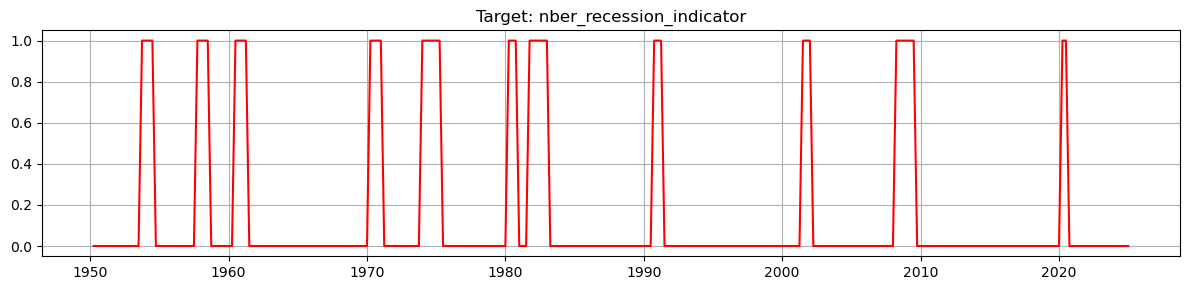

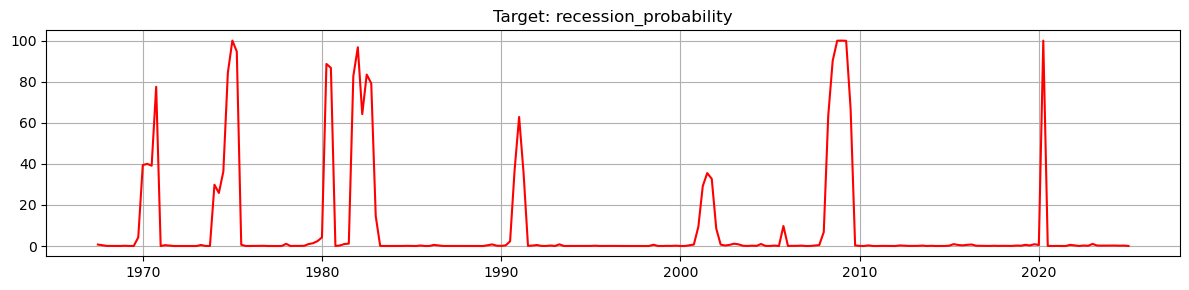

In [8]:
# 1. Plot target variables (in red)
for col in y.columns:
    plt.figure(figsize=(12, 3))
    plt.plot(y.index, y[col], color='red')
    plt.title(f"Target: {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

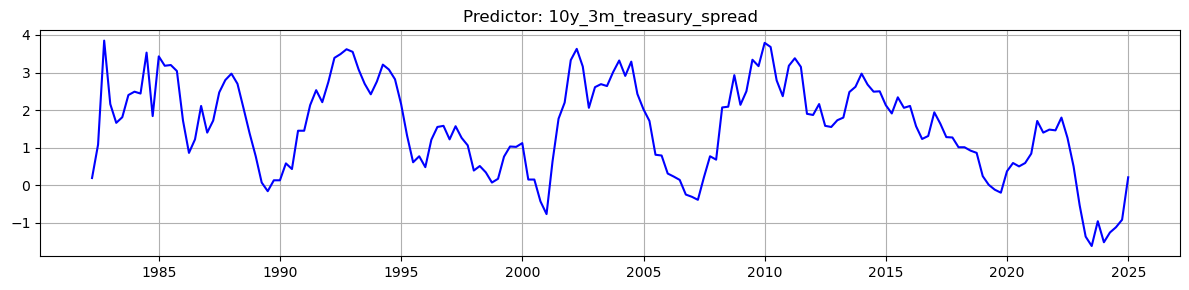

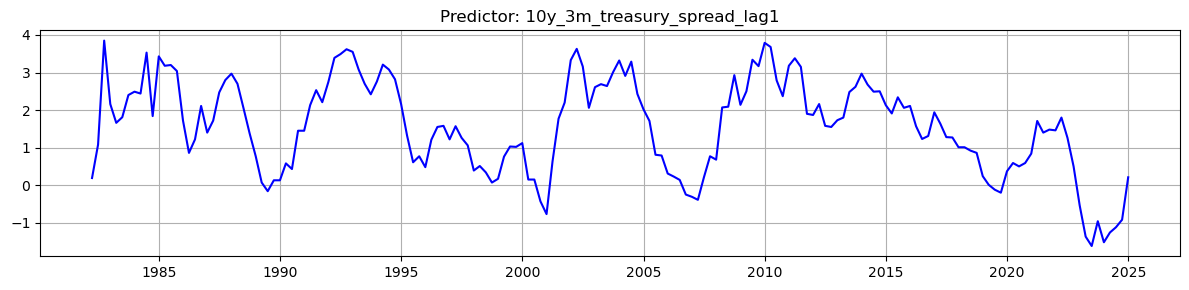

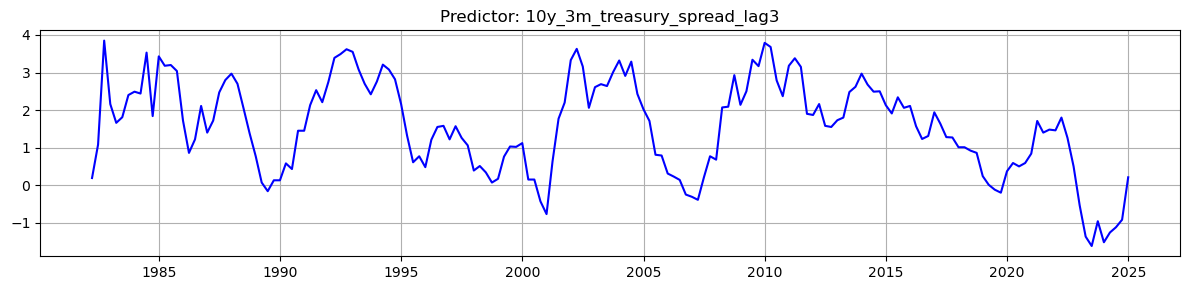

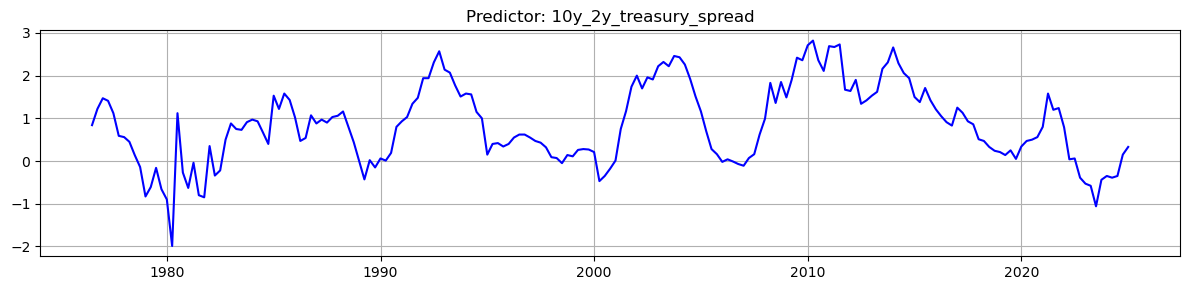

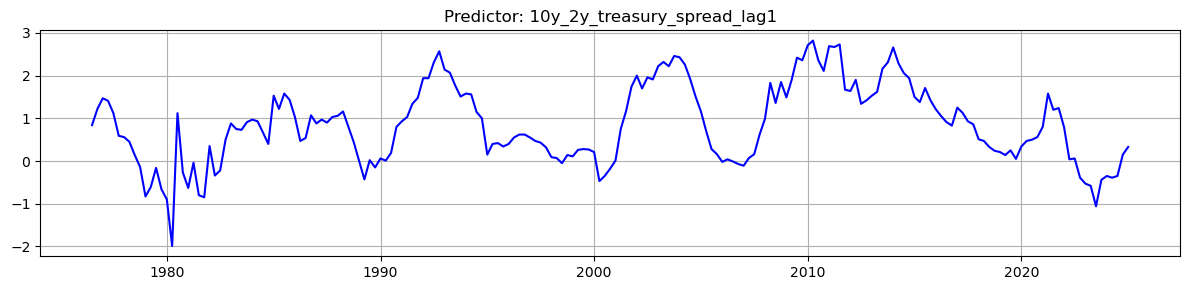

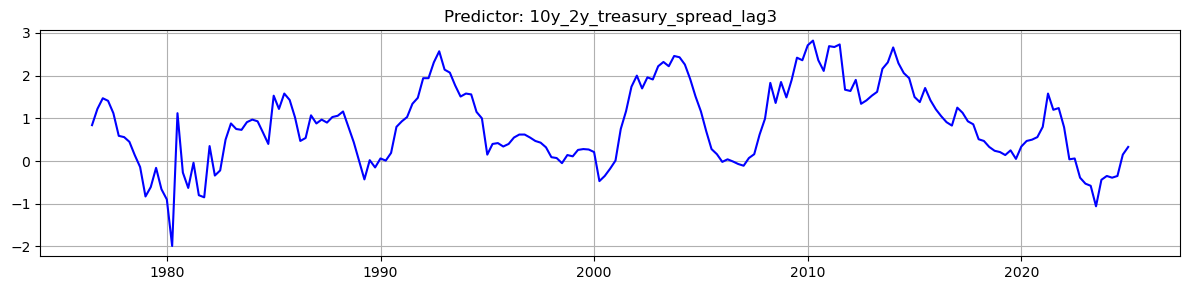

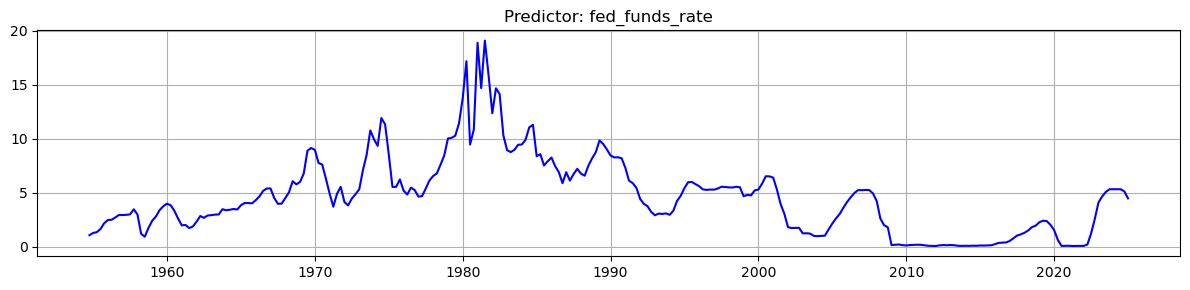

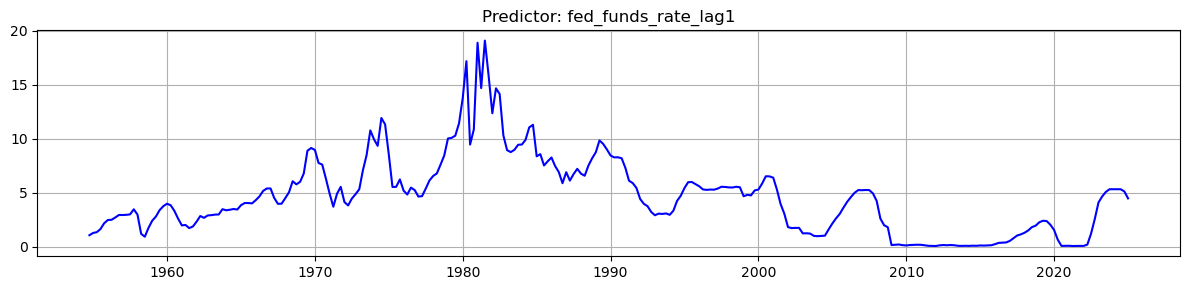

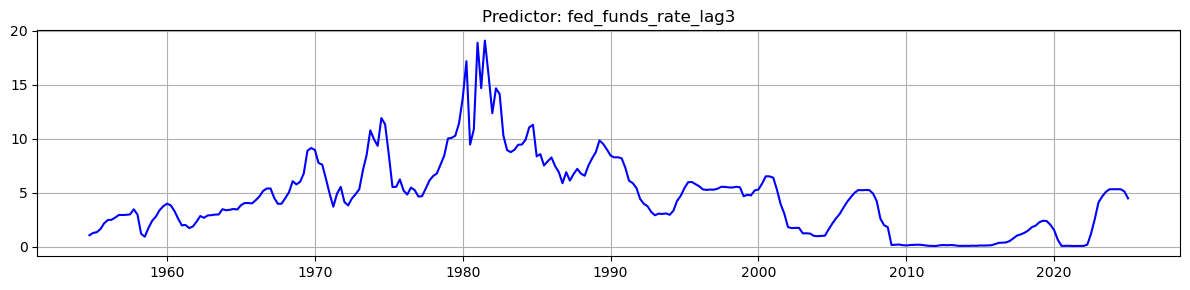

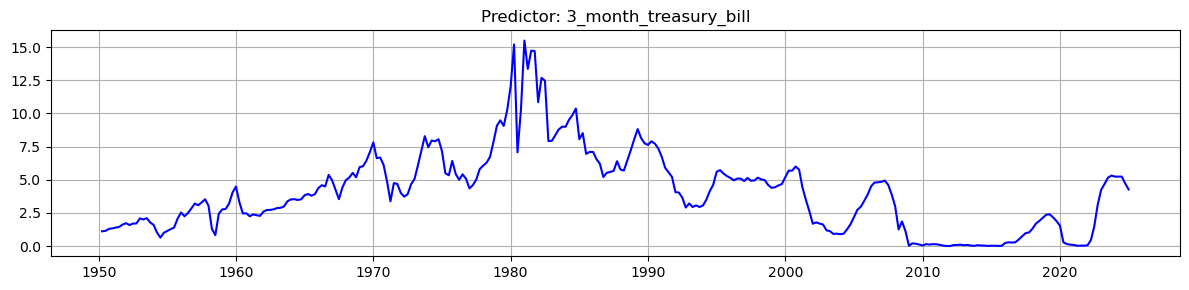

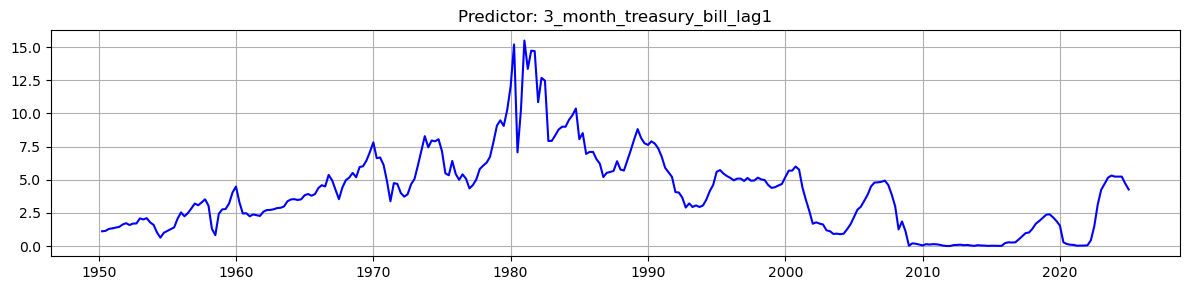

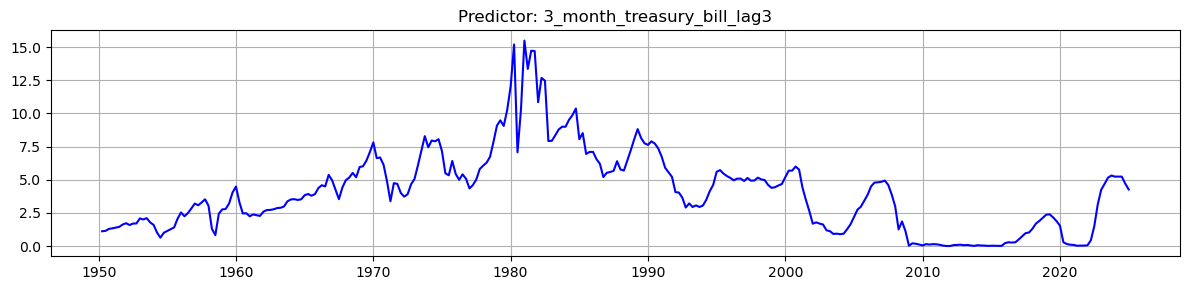

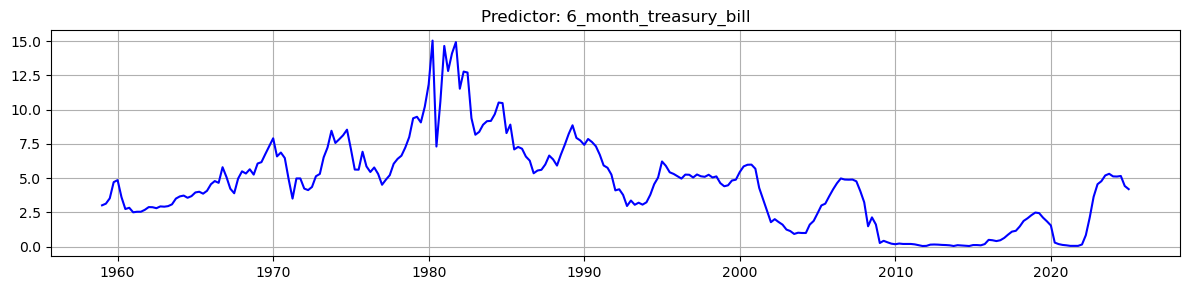

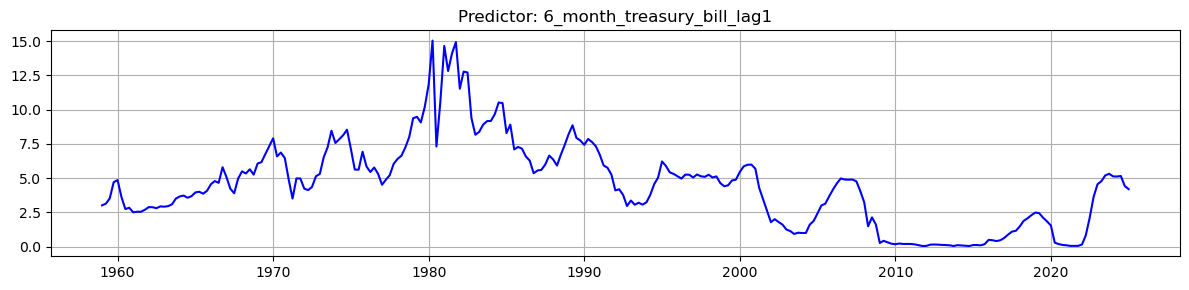

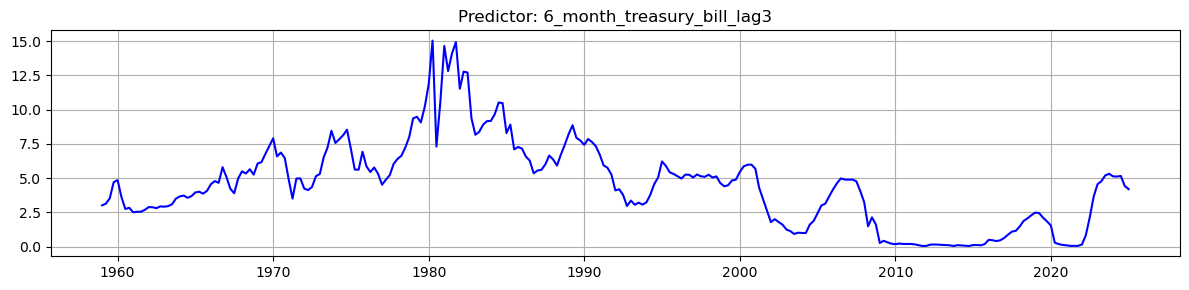

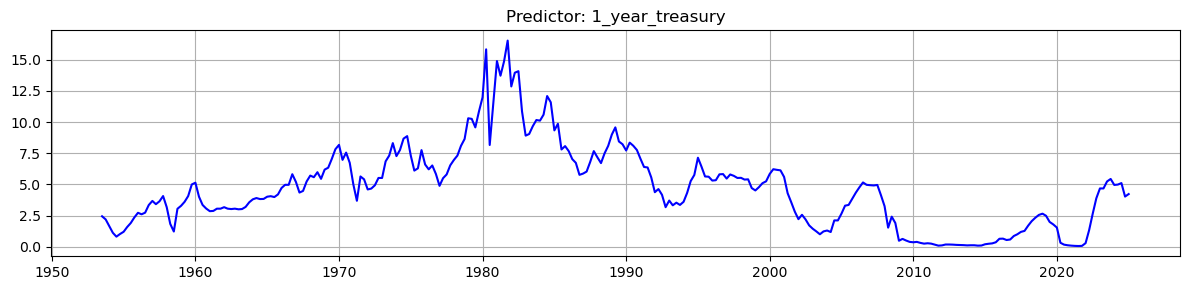

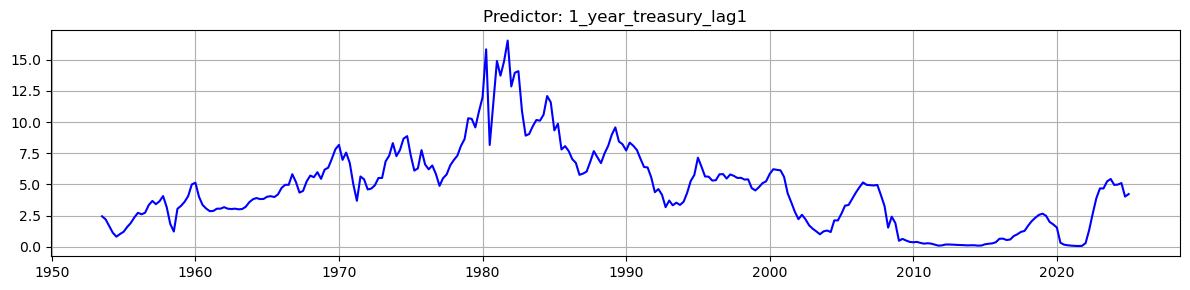

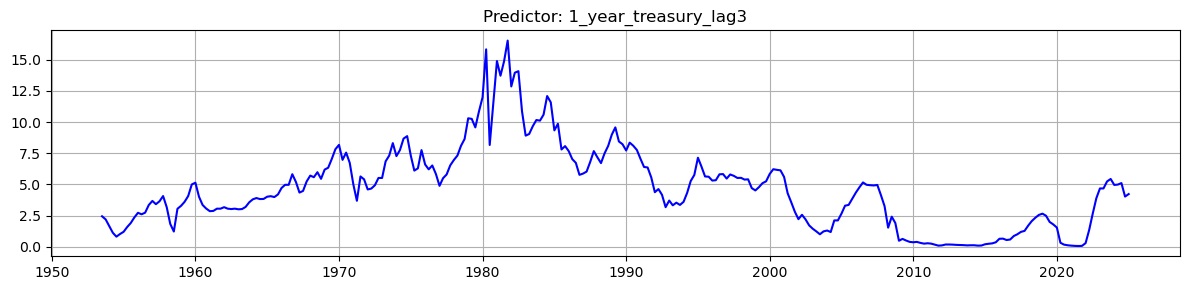

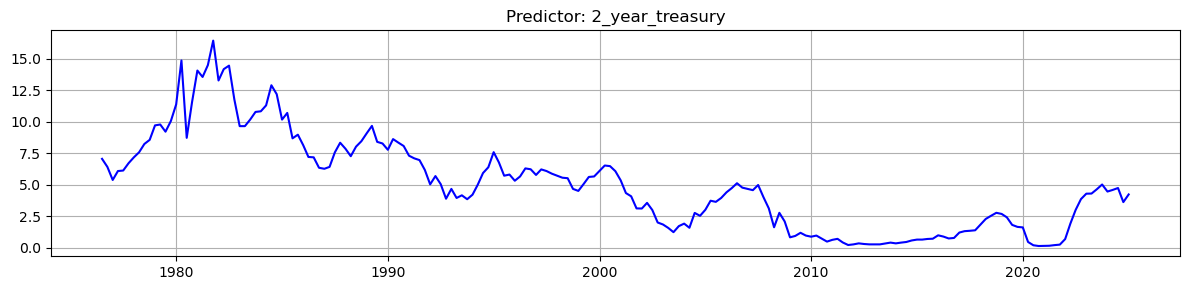

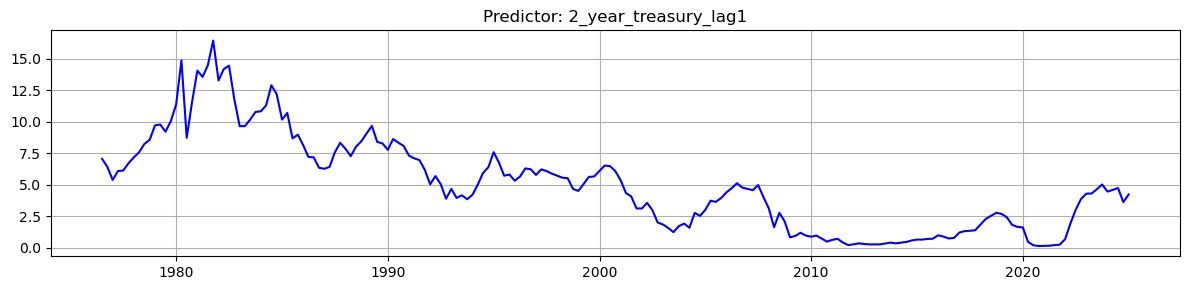

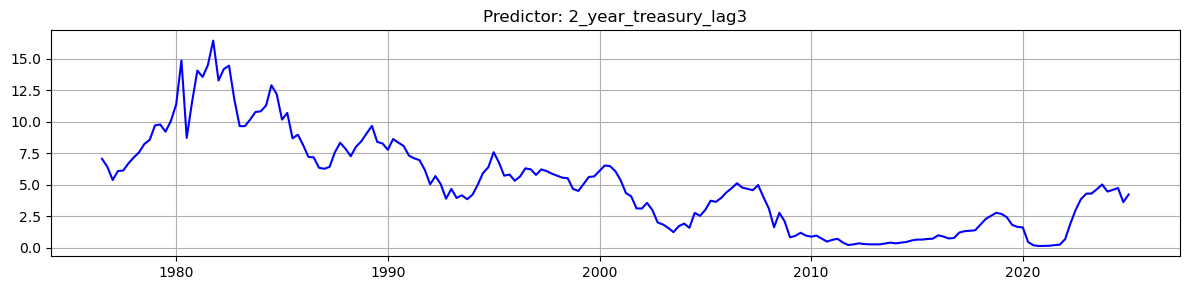

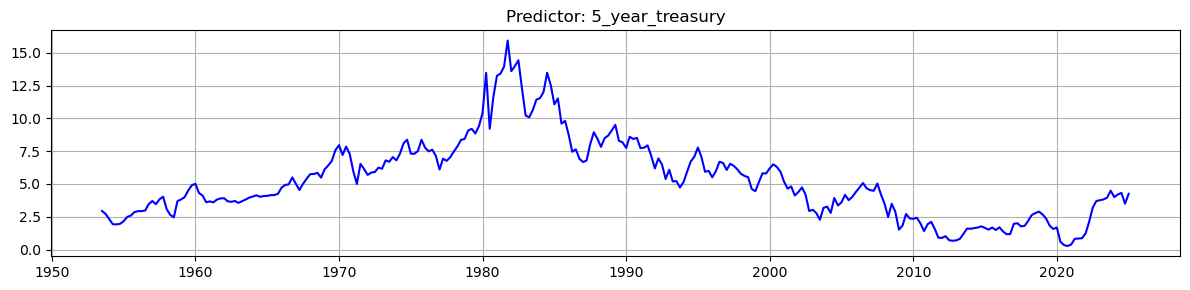

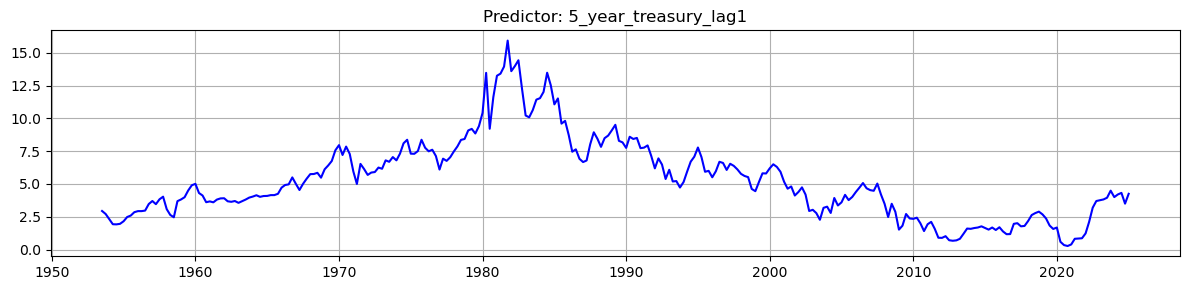

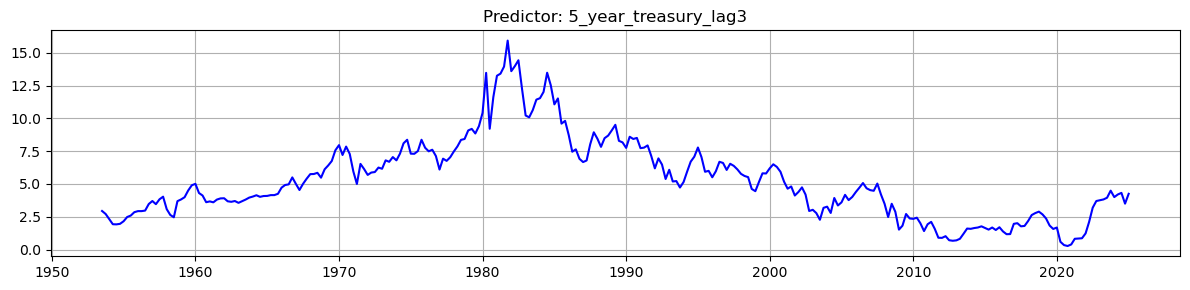

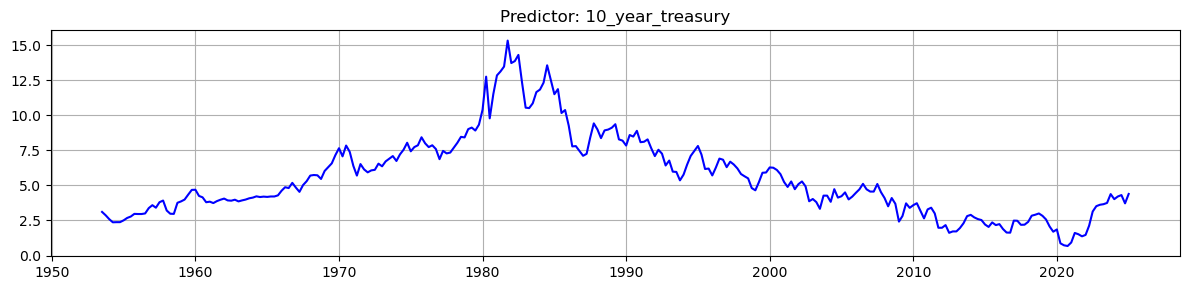

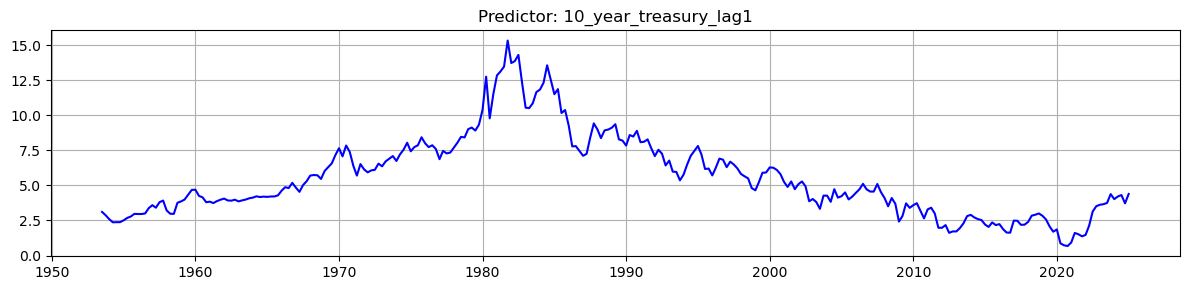

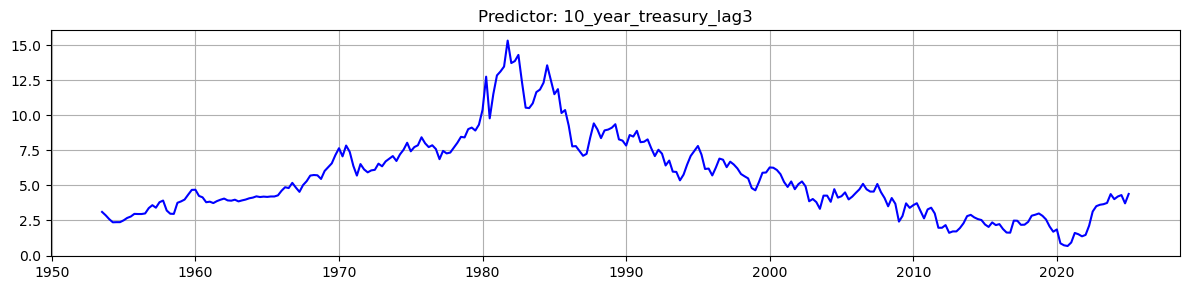

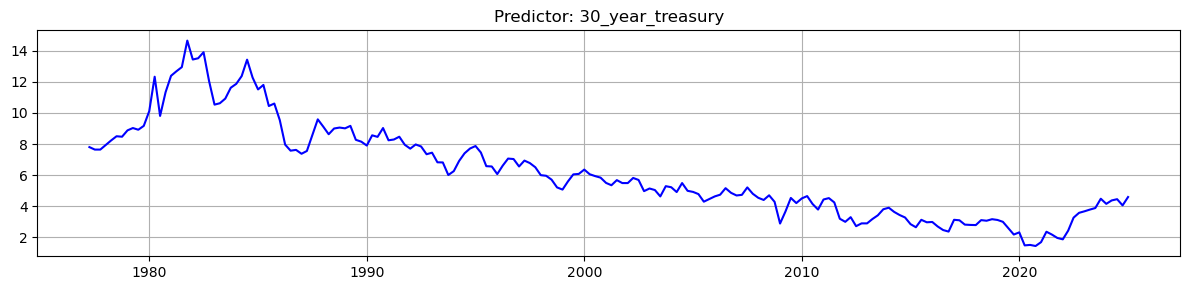

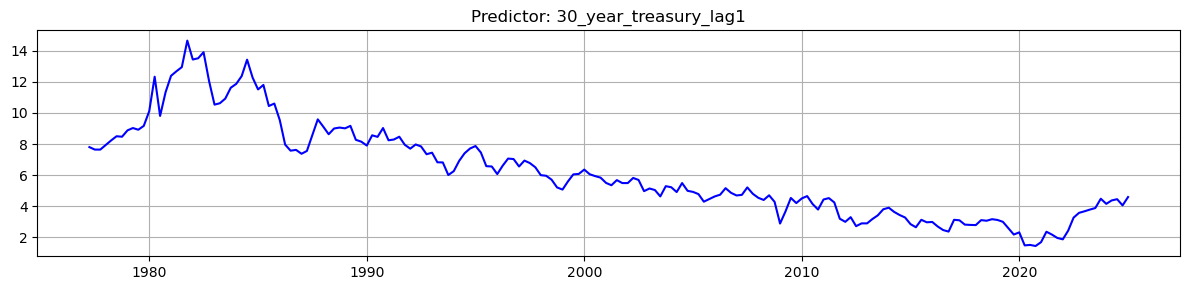

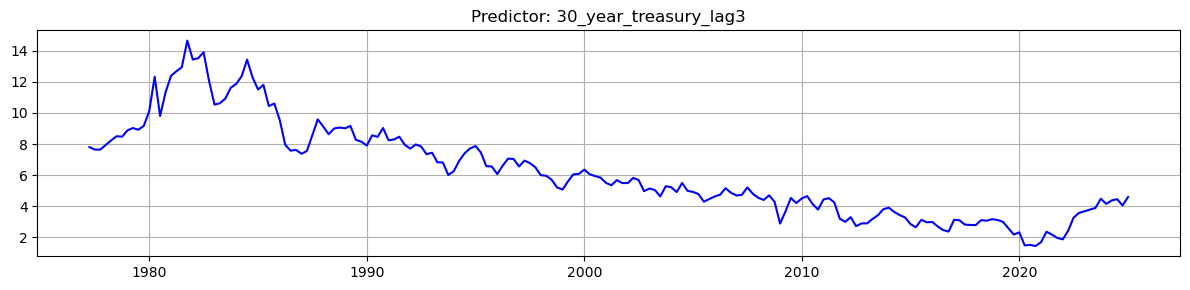

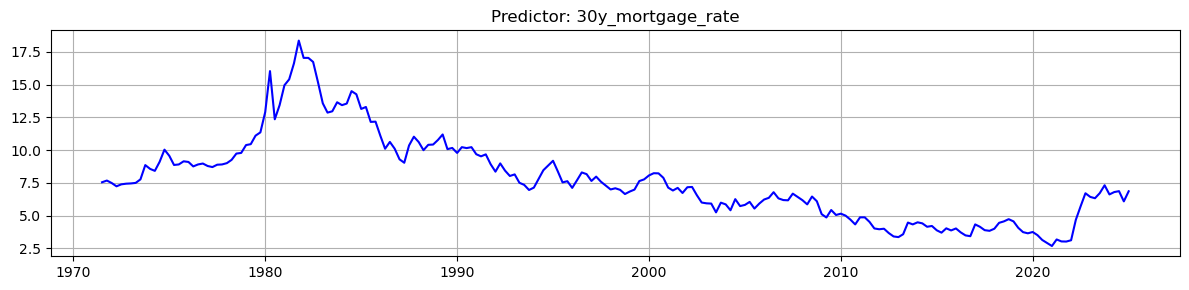

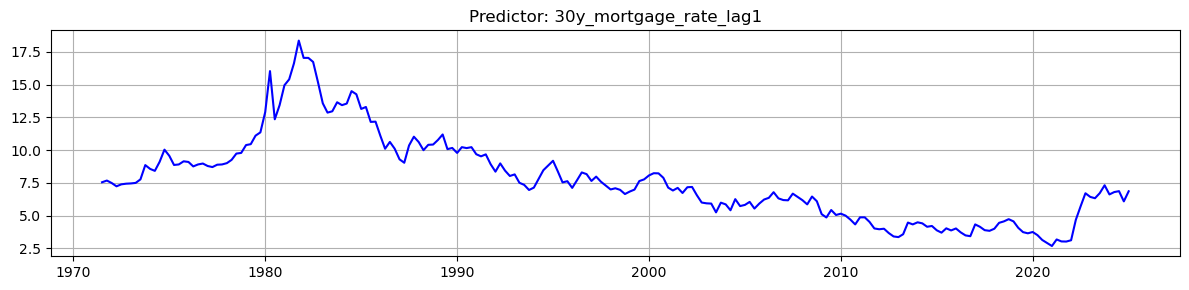

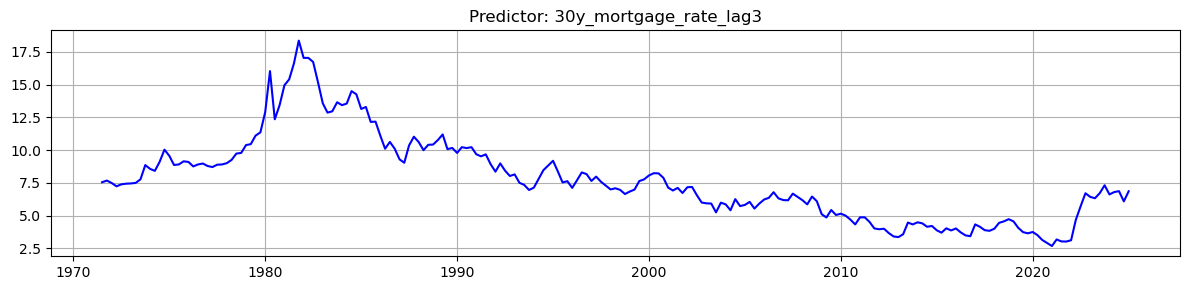

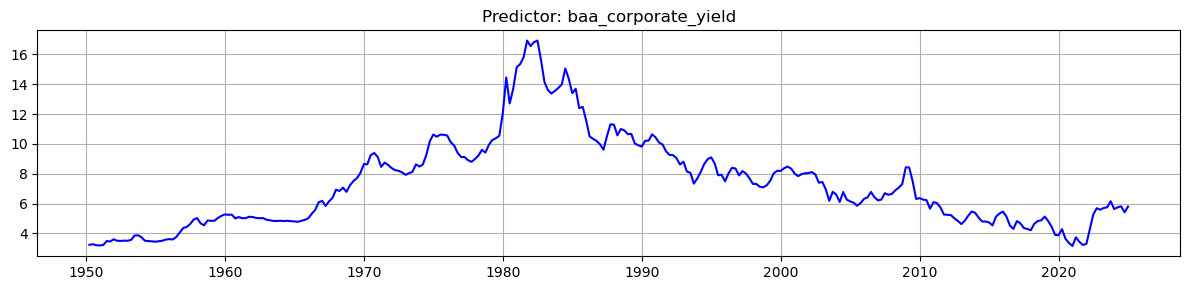

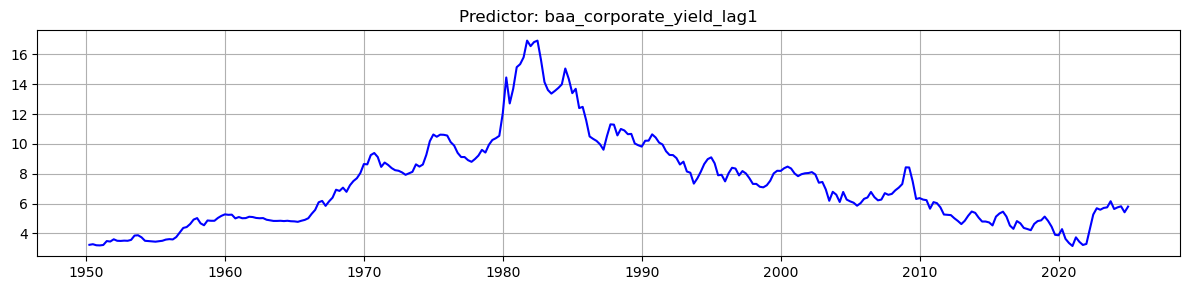

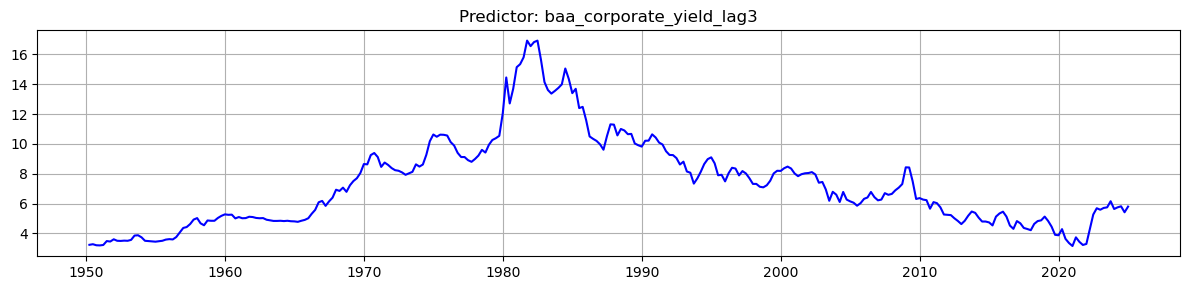

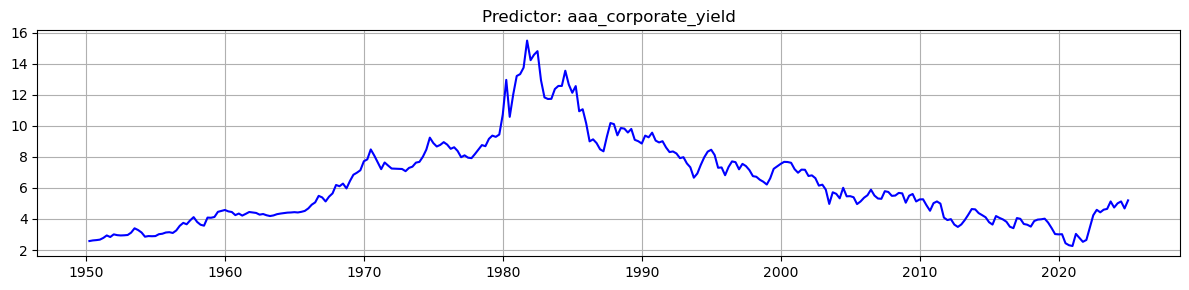

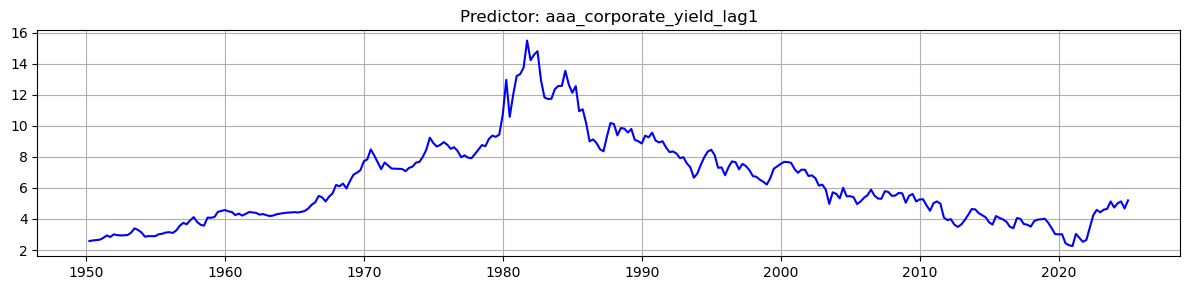

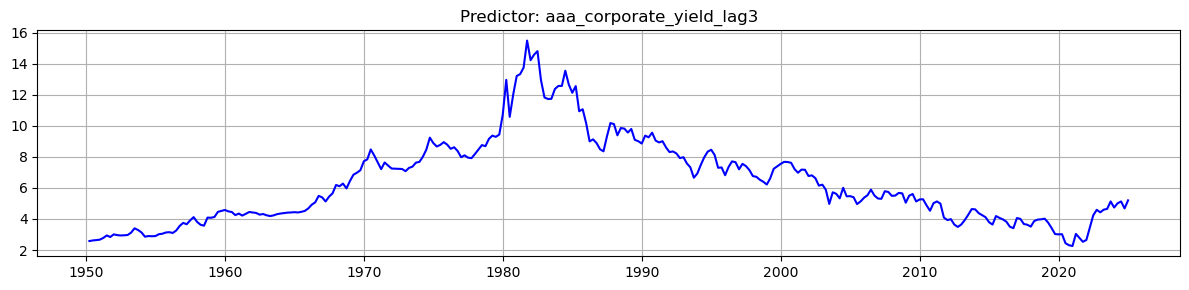

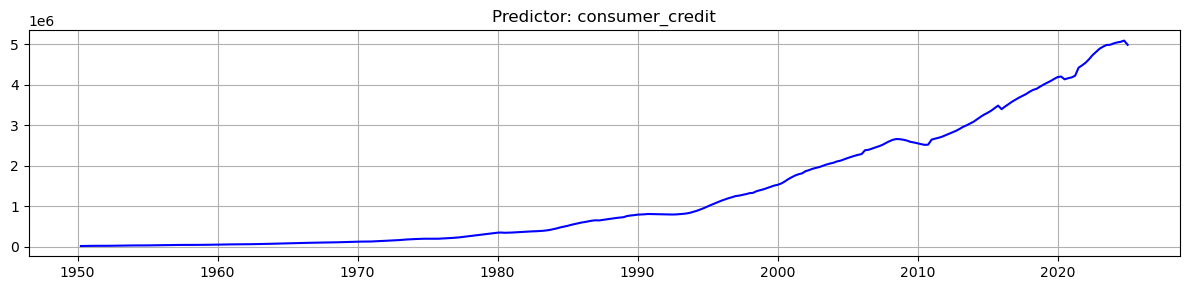

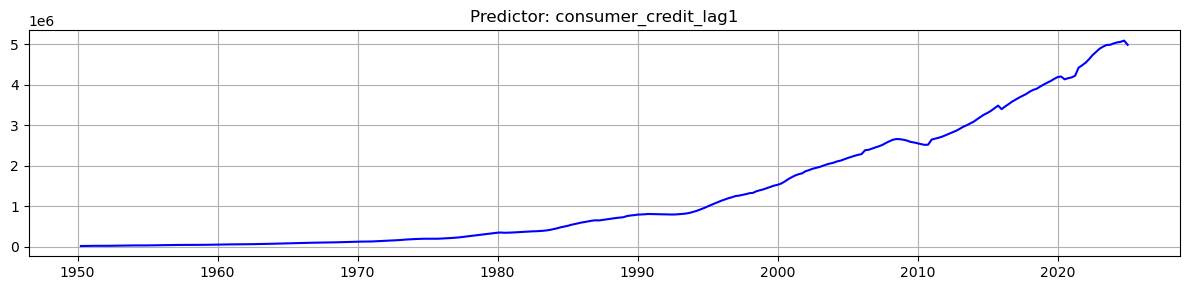

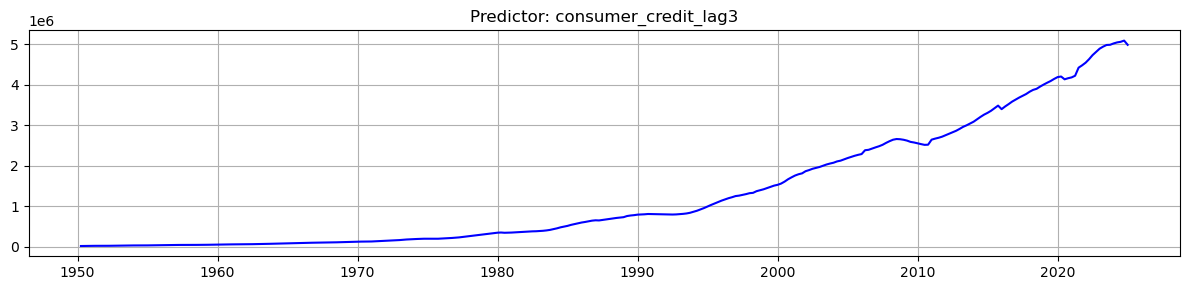

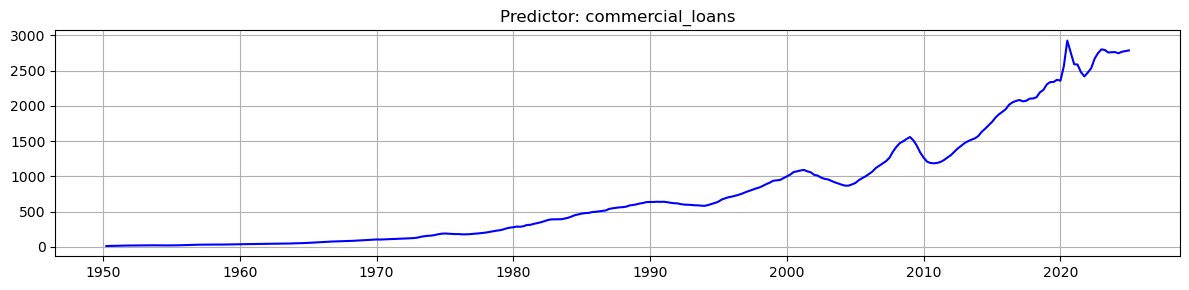

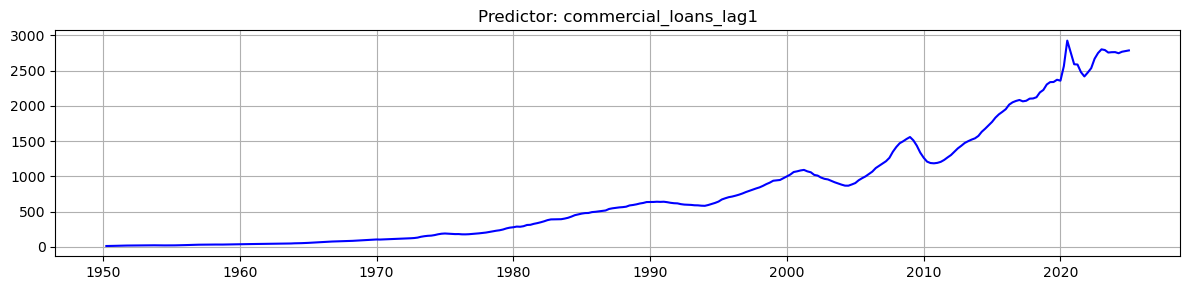

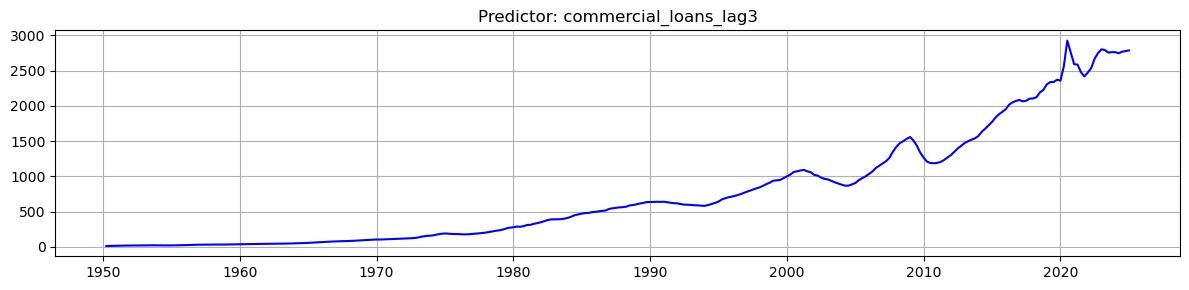

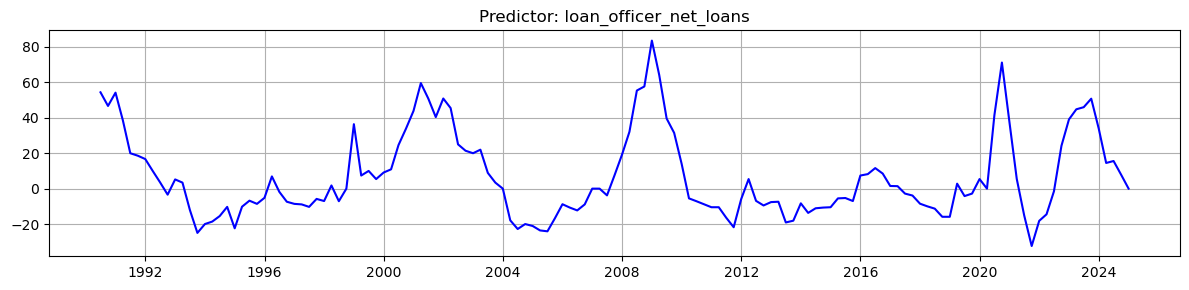

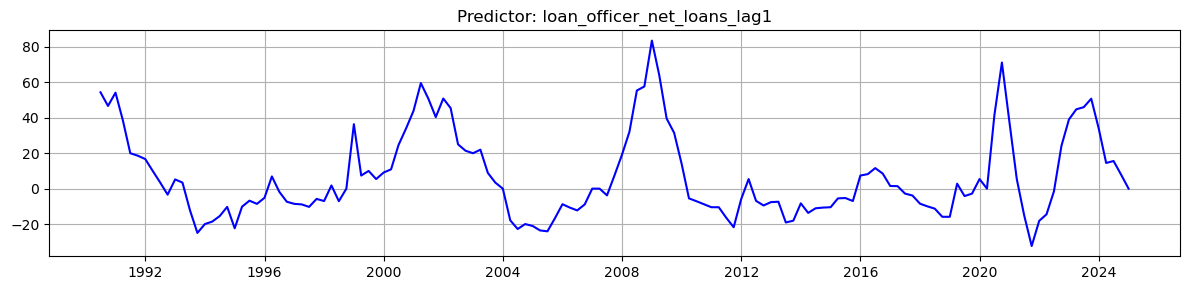

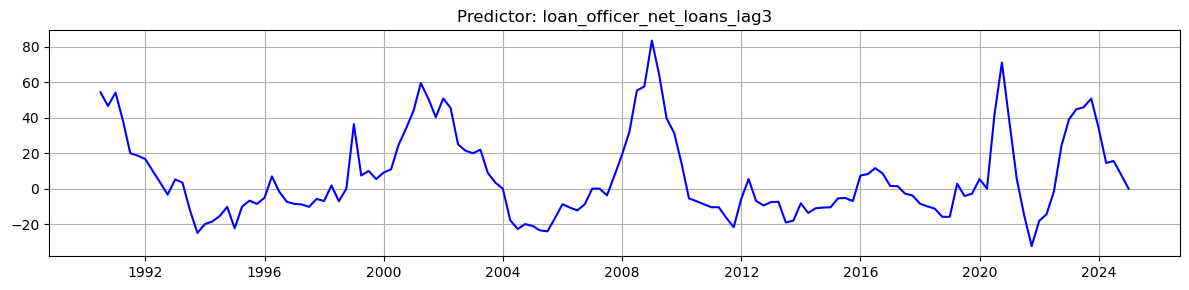

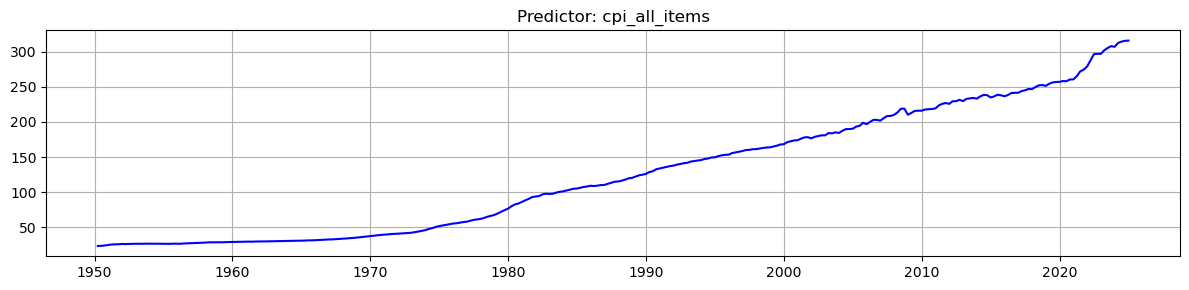

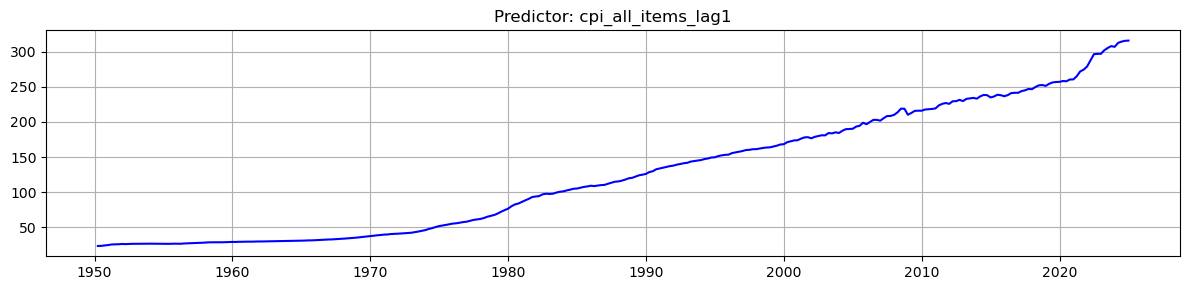

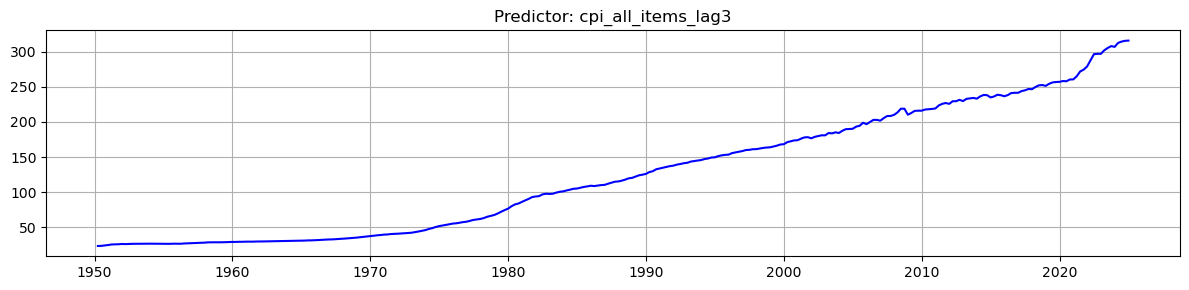

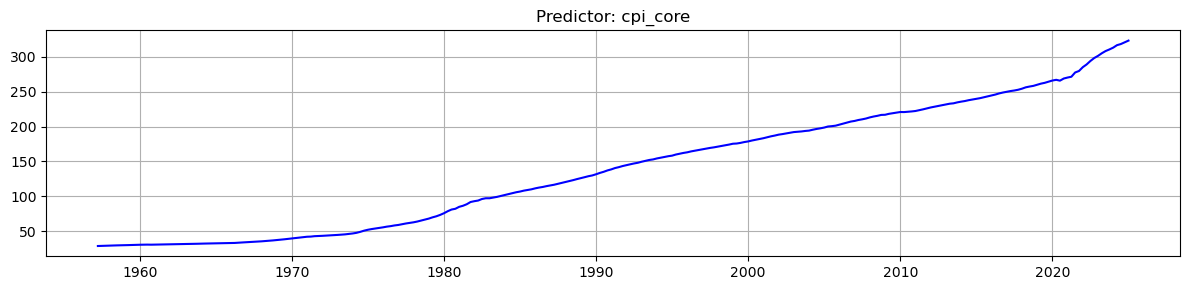

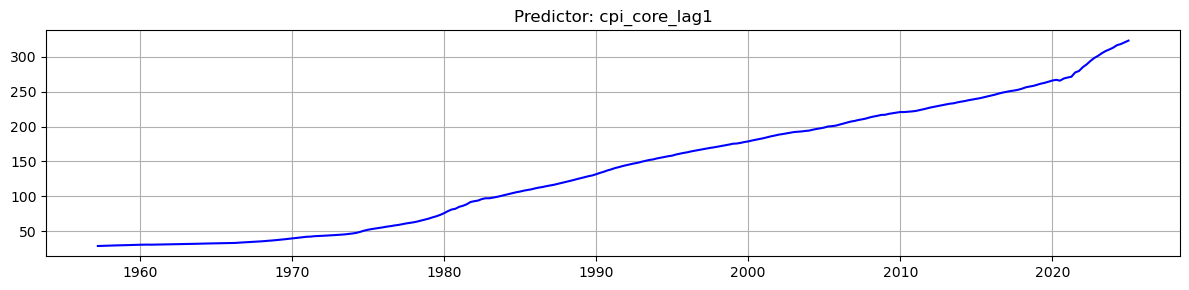

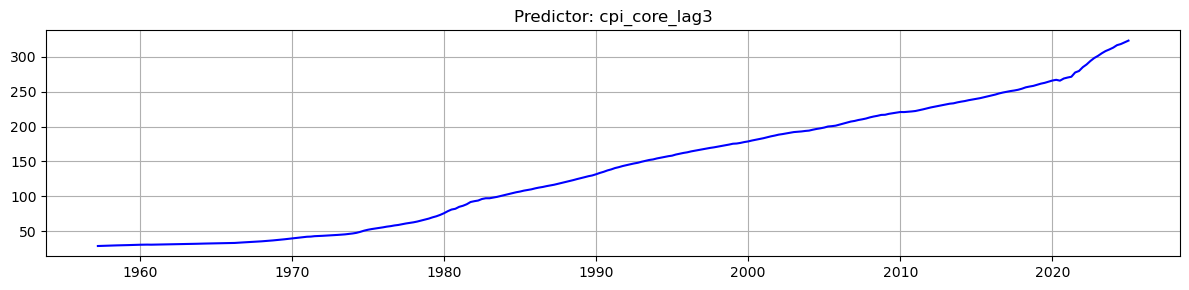

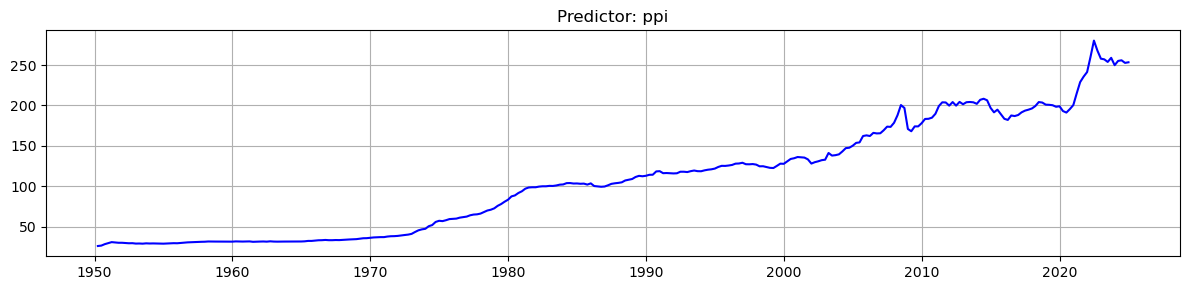

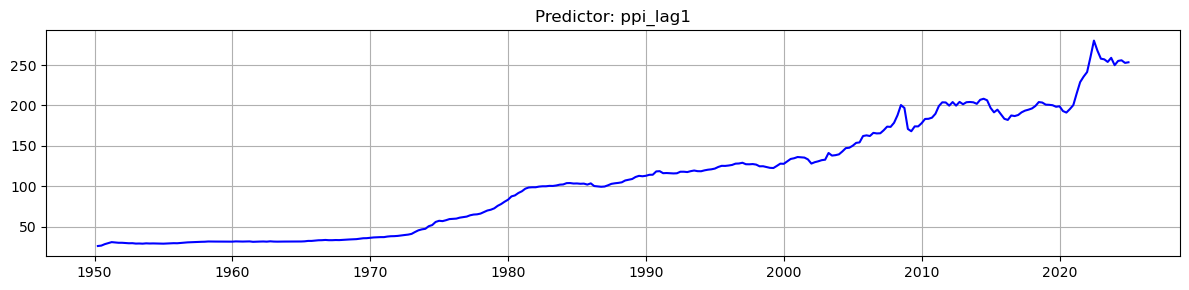

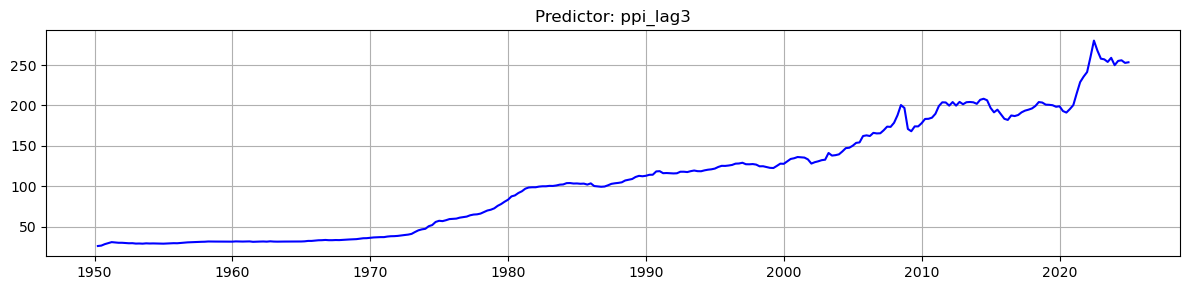

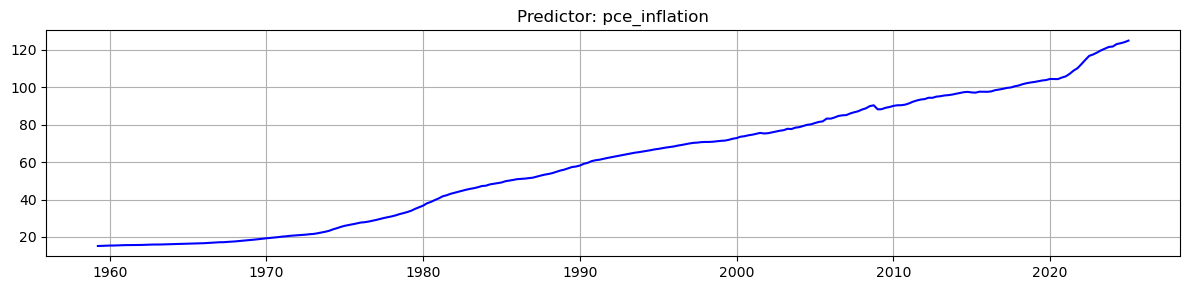

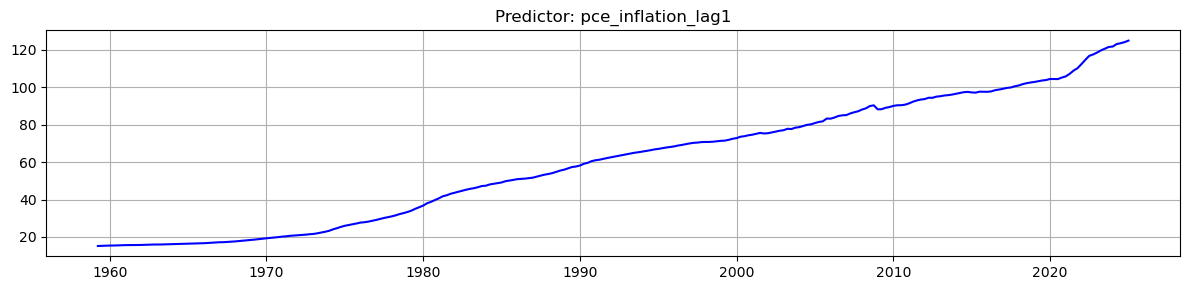

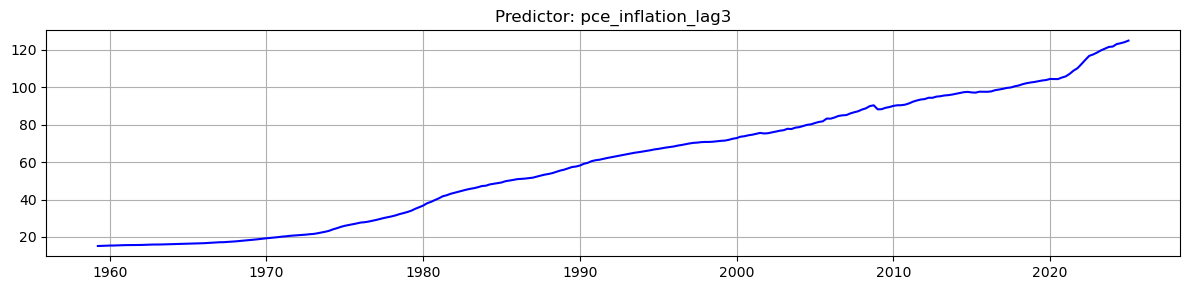

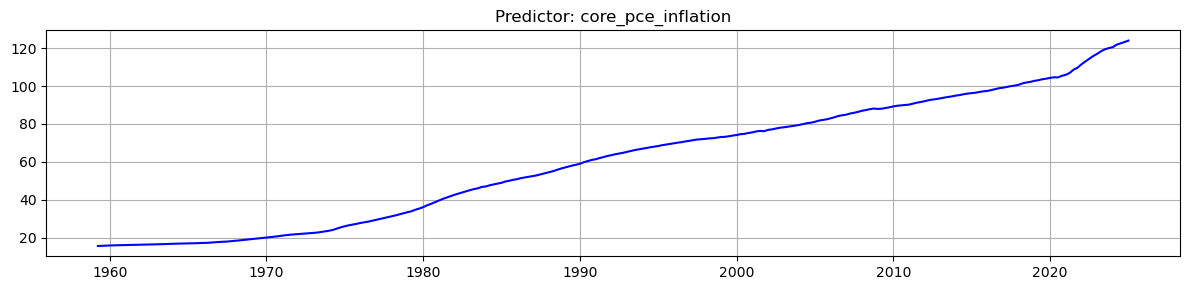

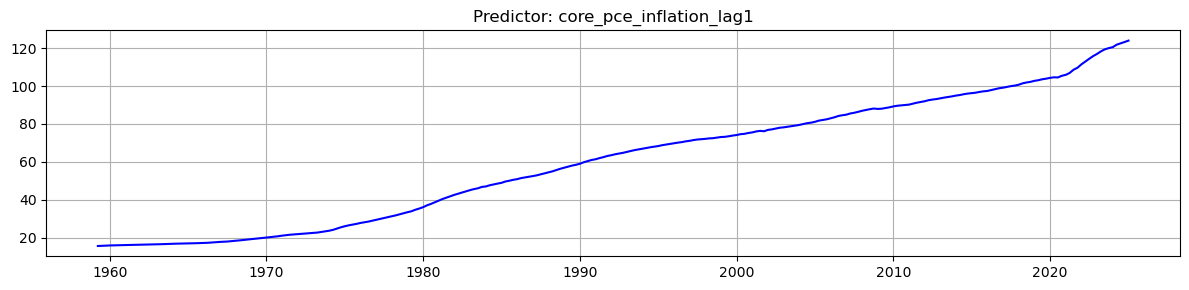

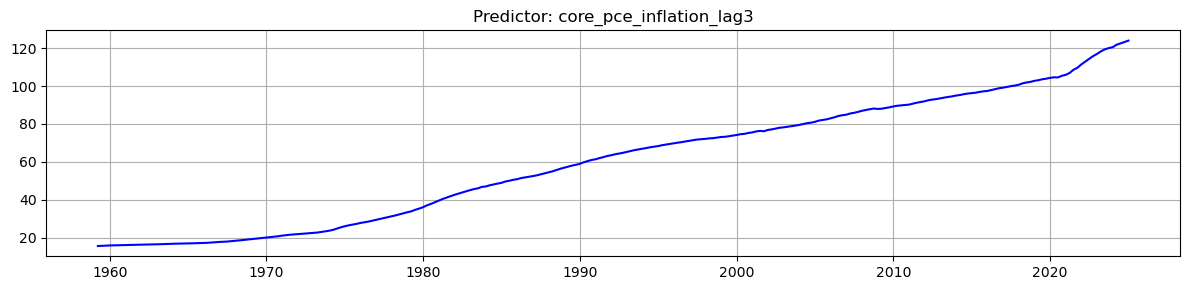

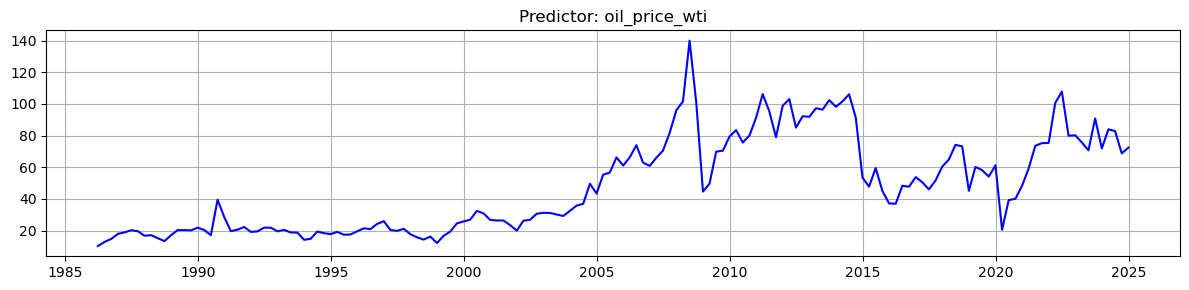

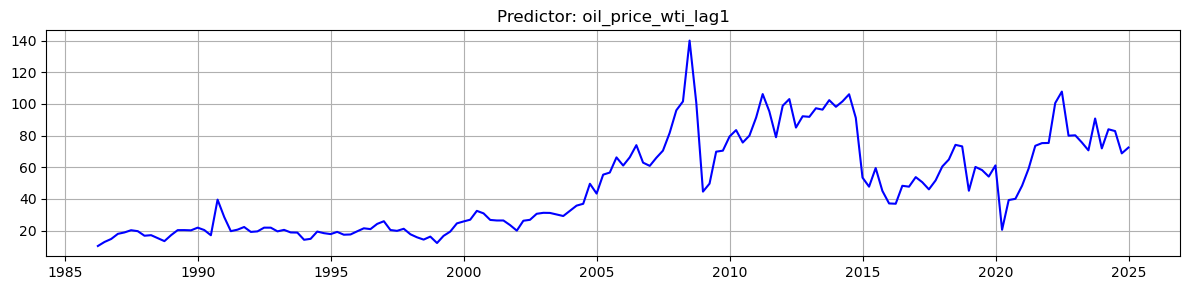

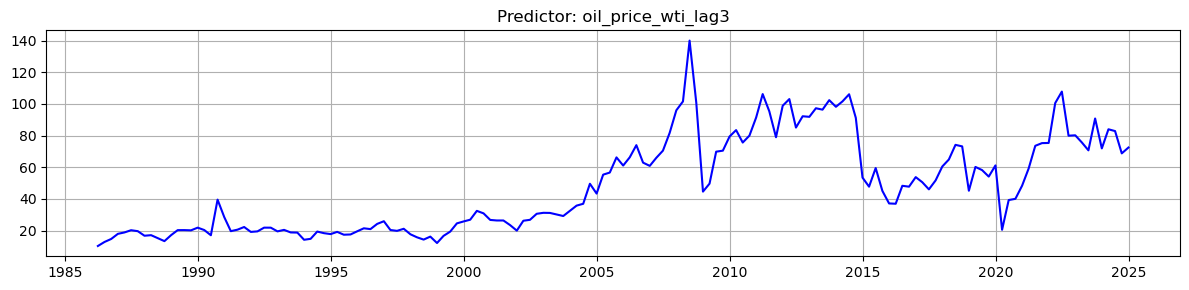

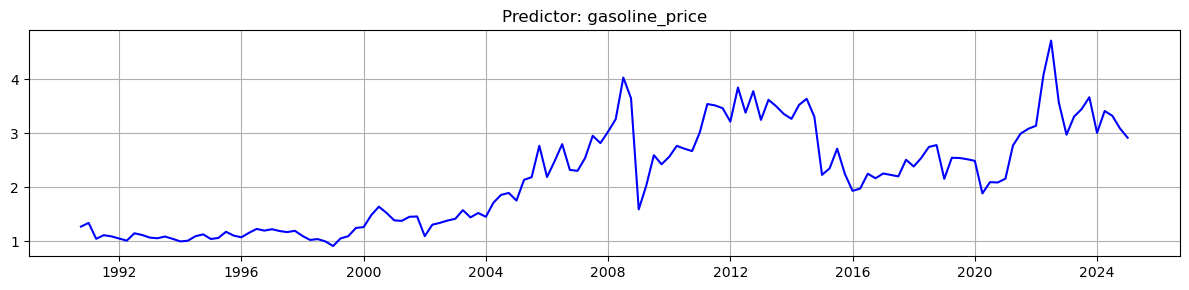

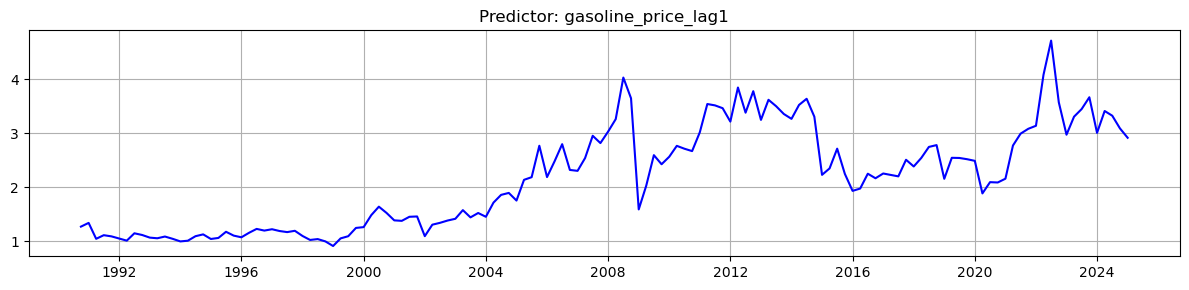

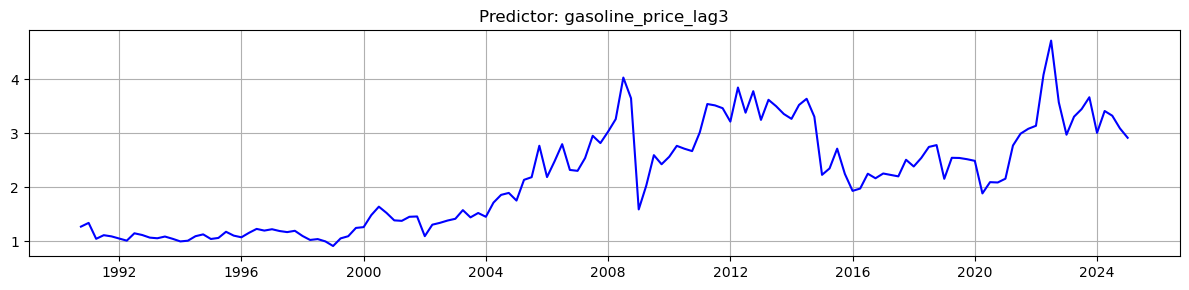

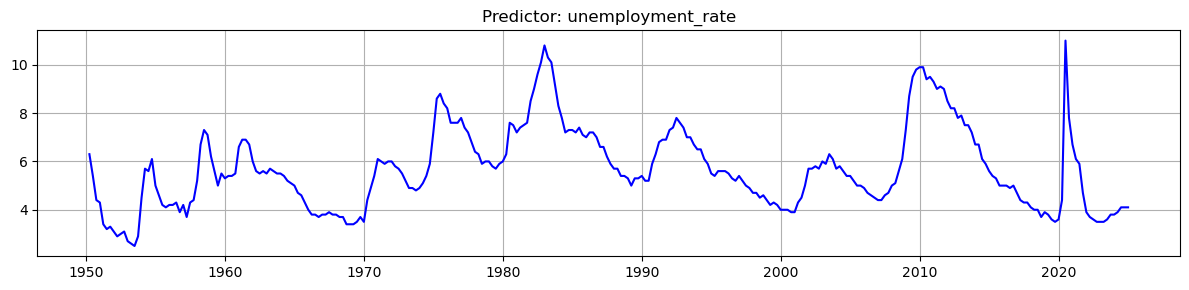

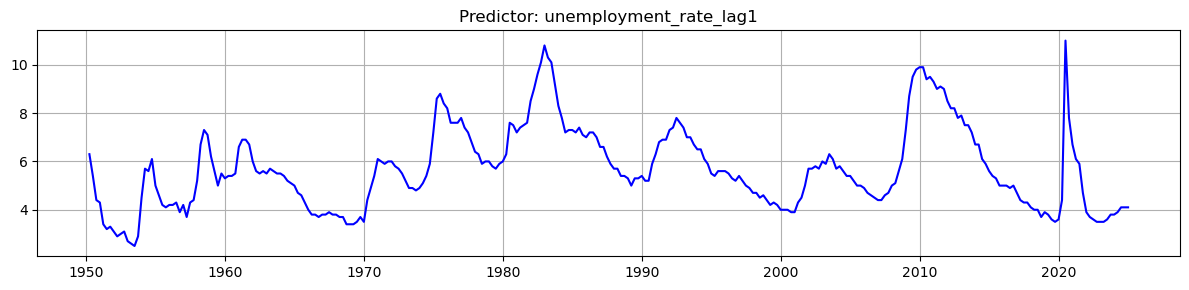

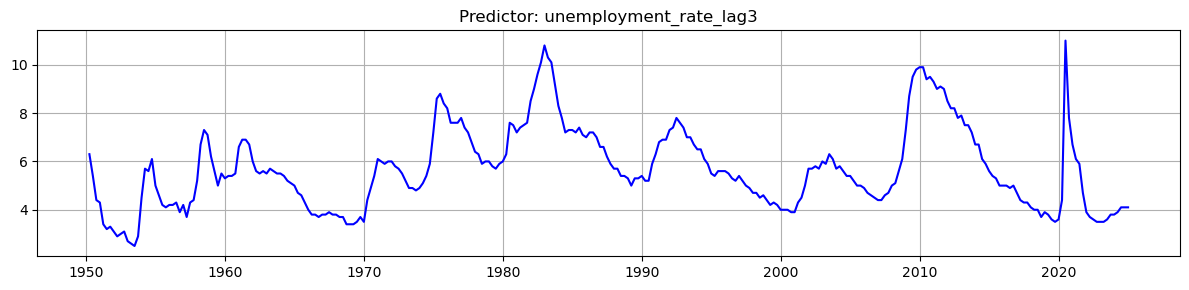

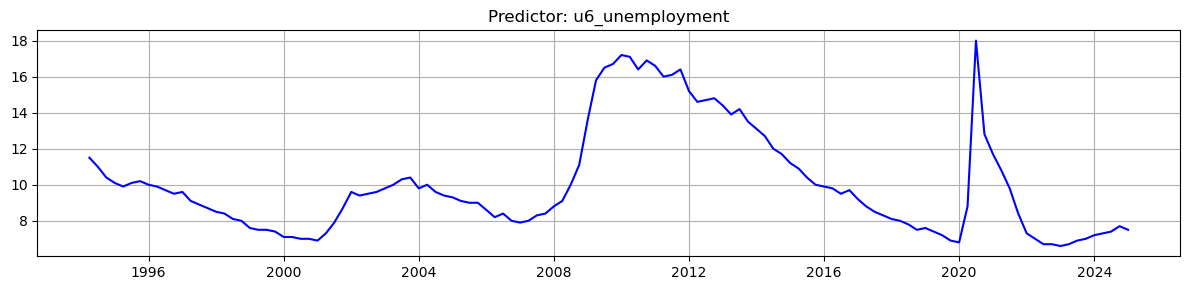

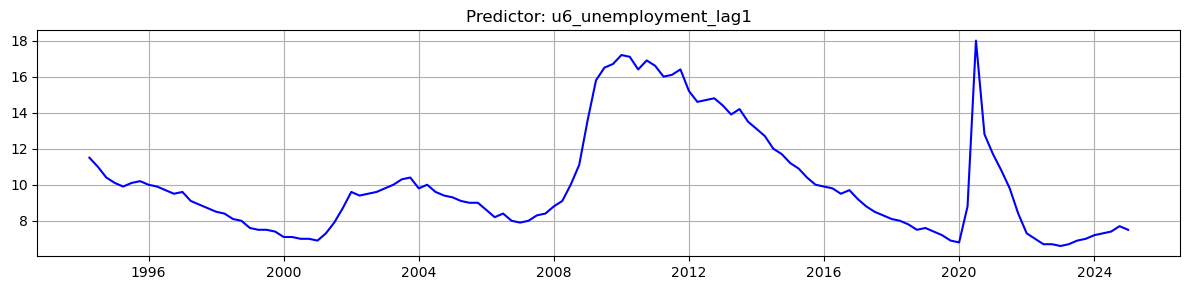

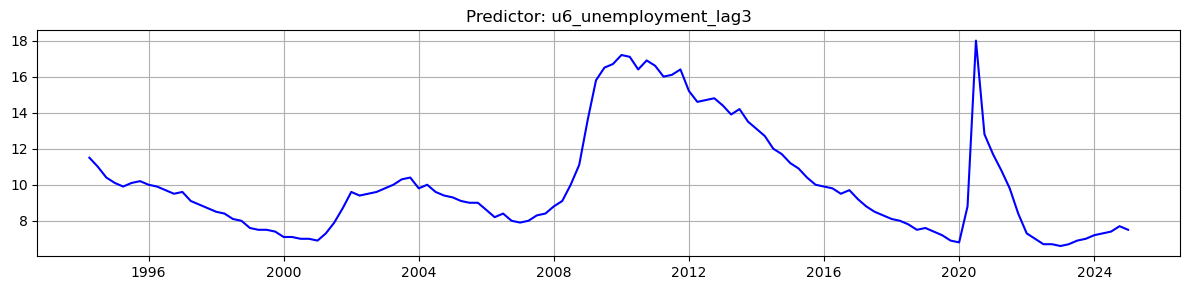

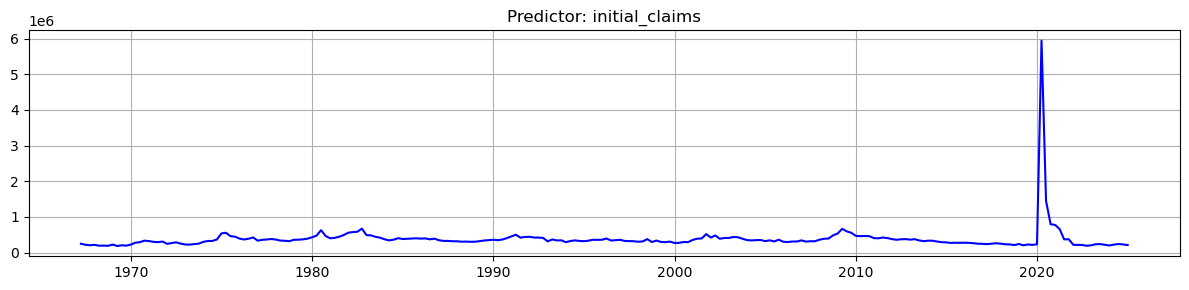

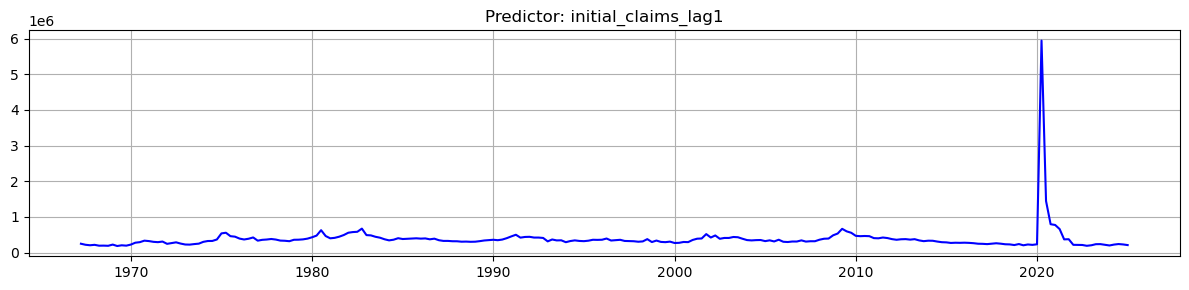

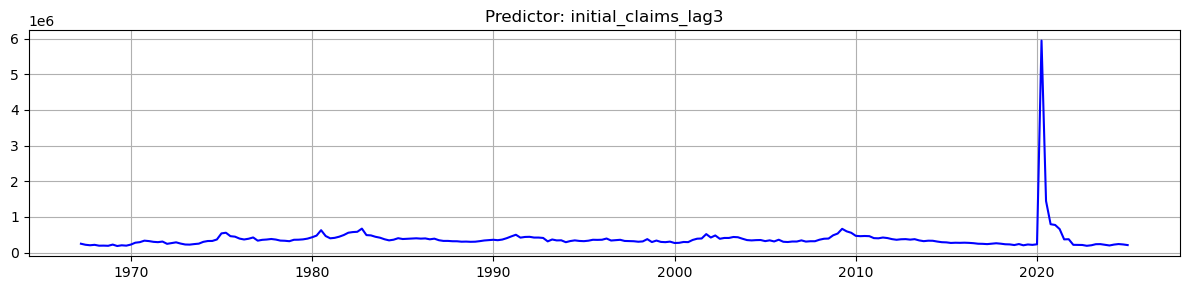

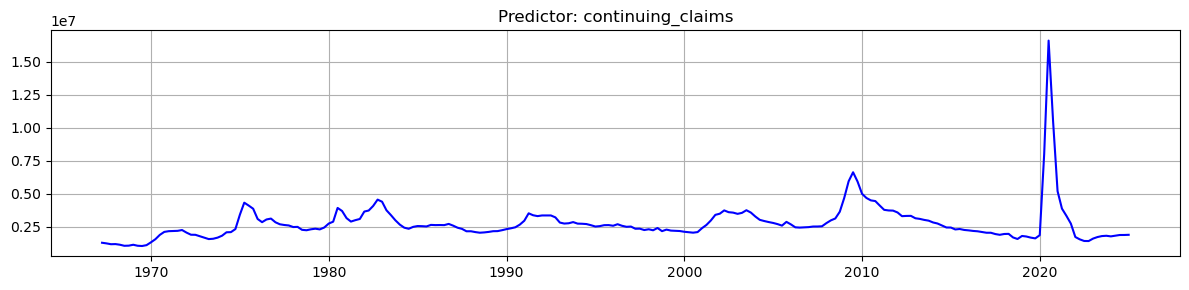

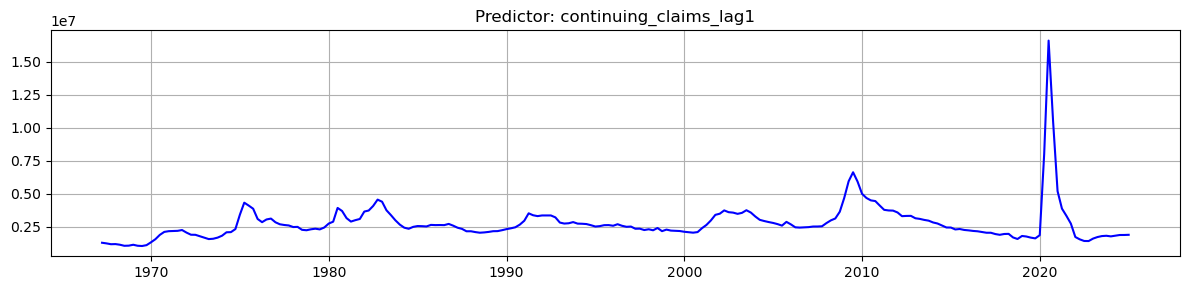

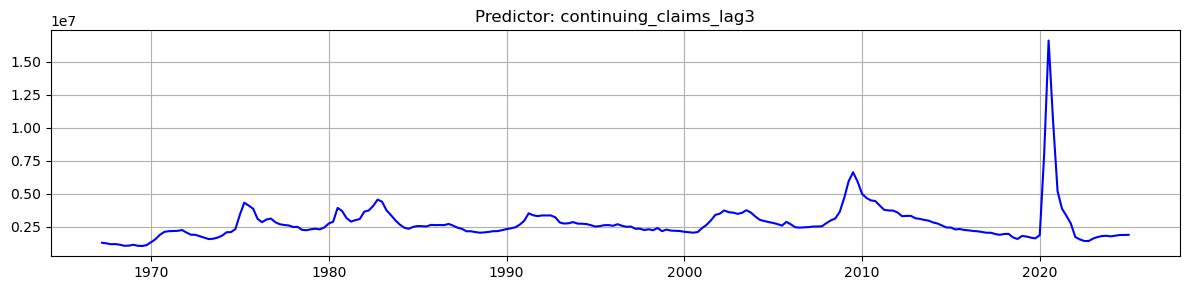

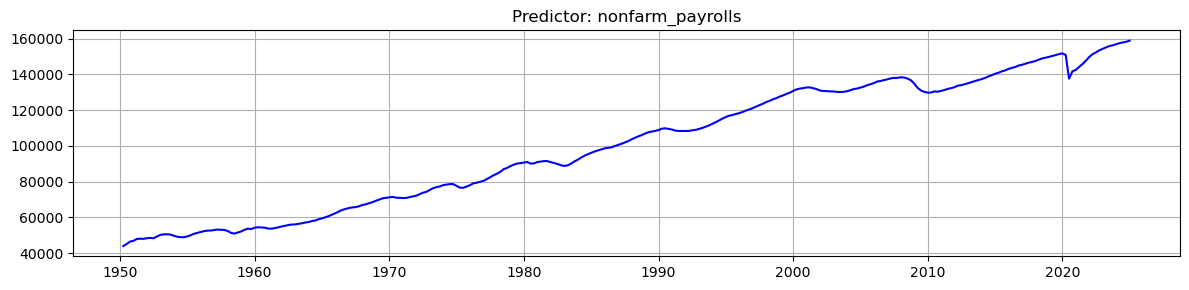

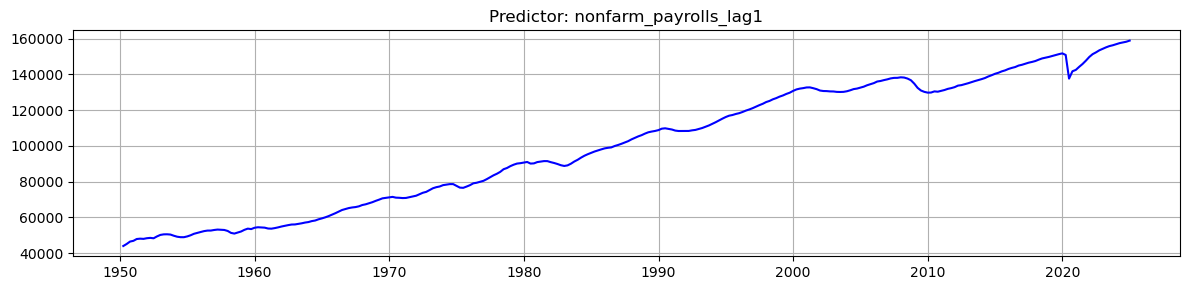

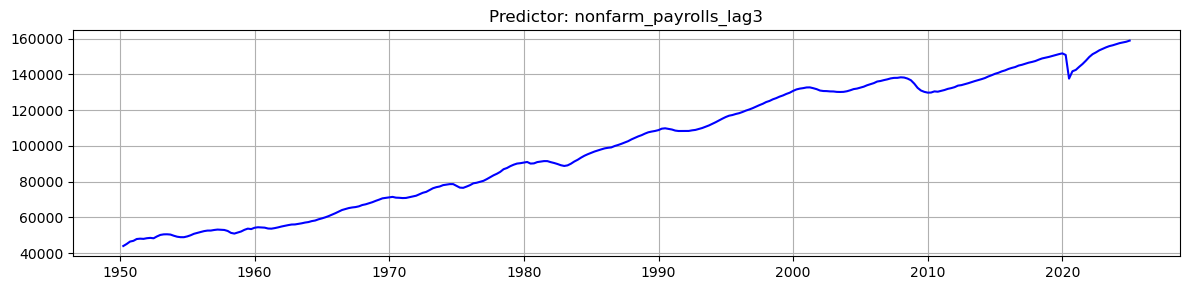

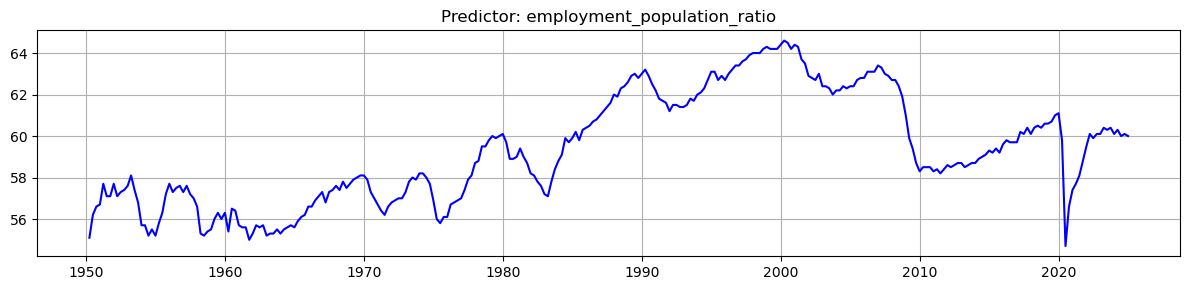

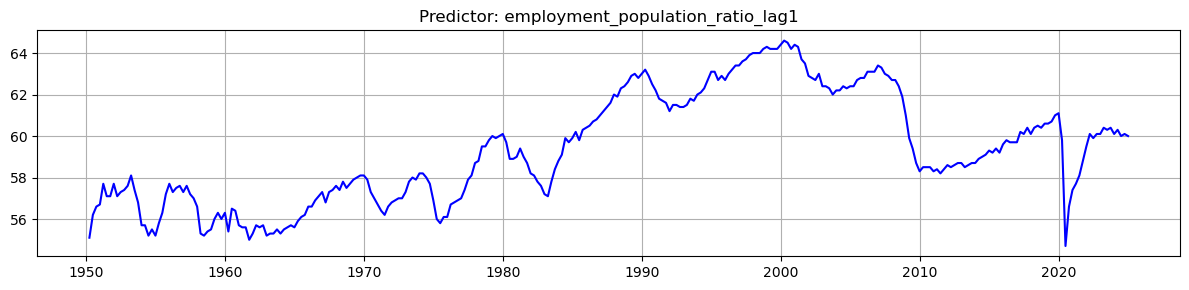

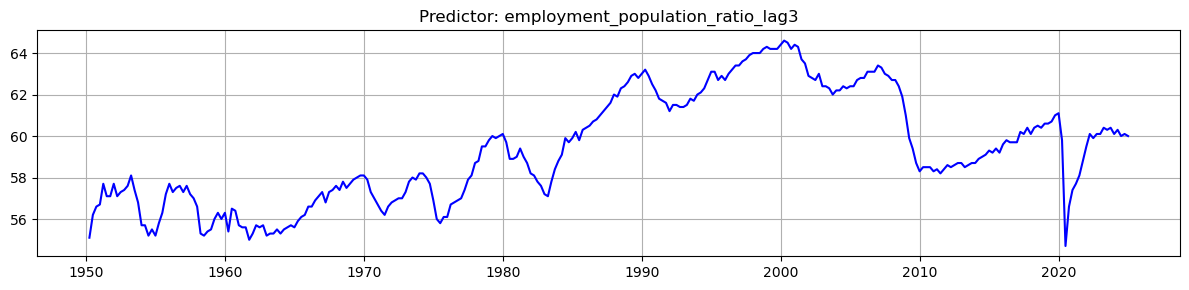

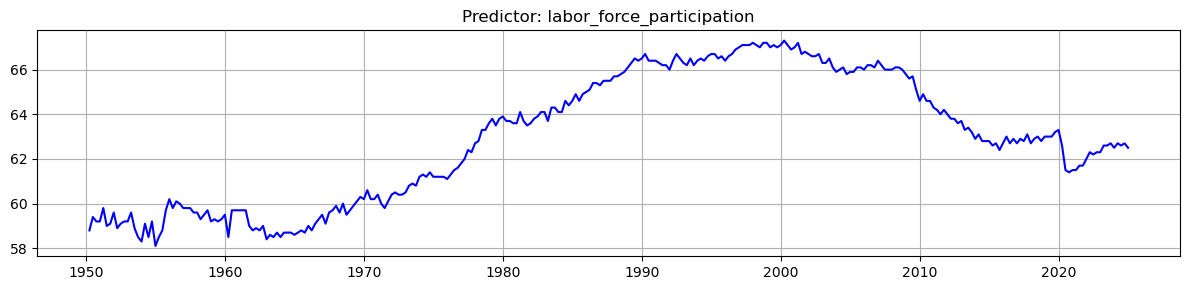

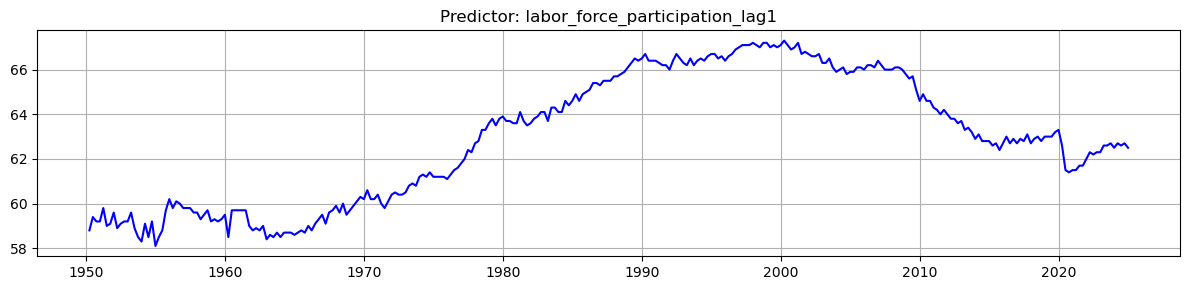

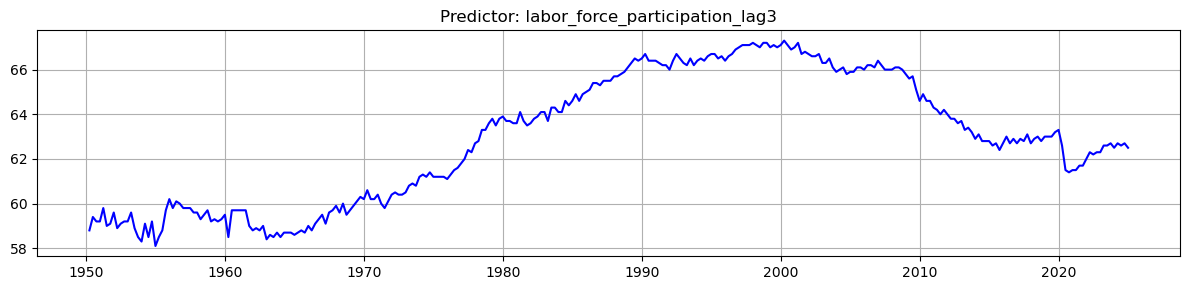

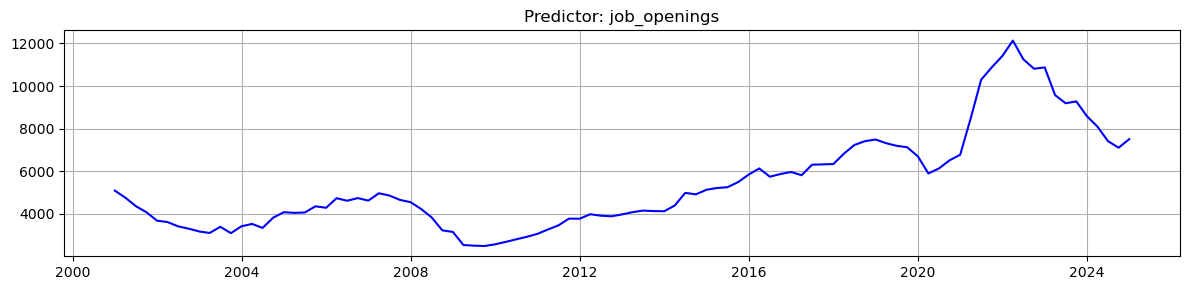

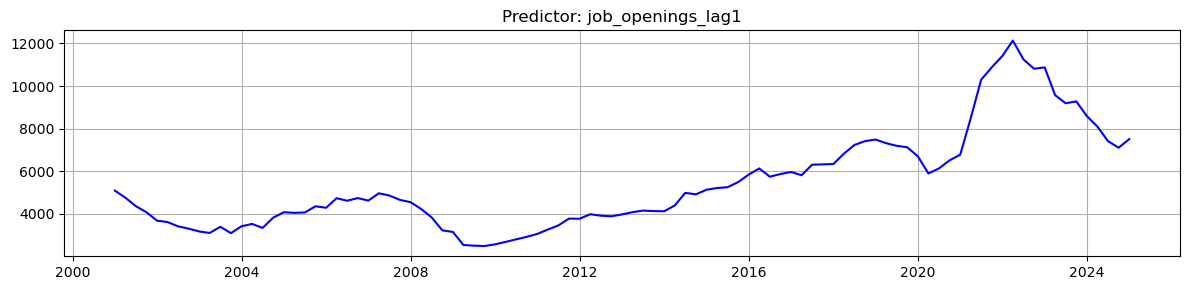

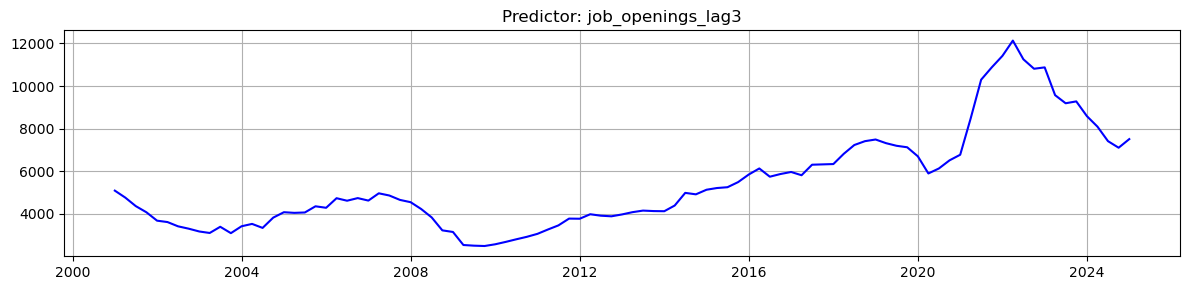

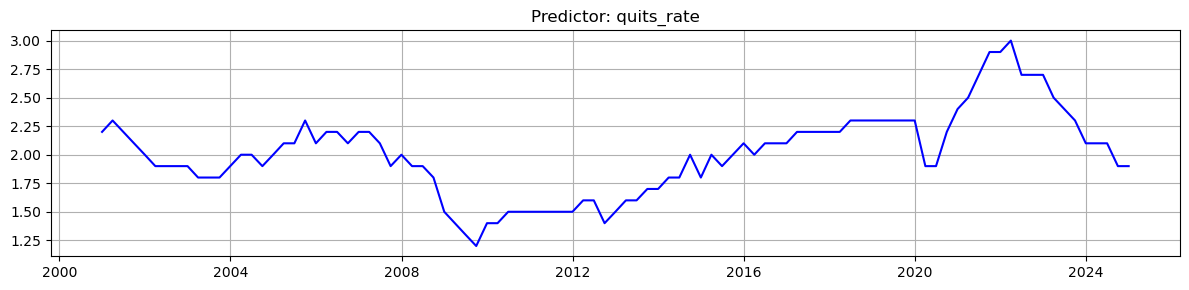

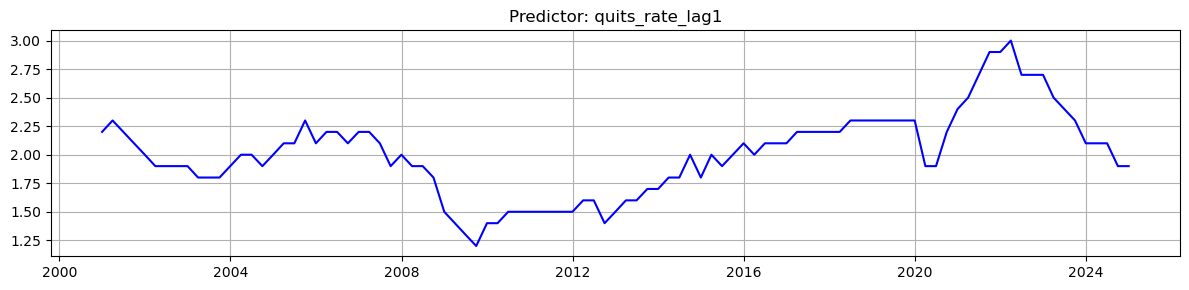

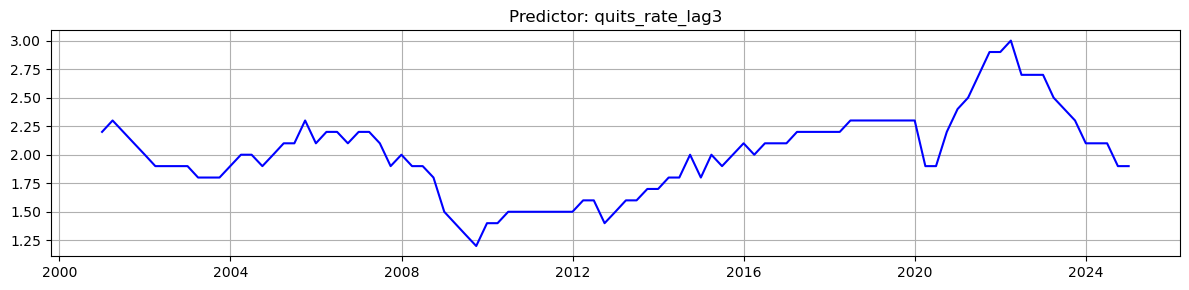

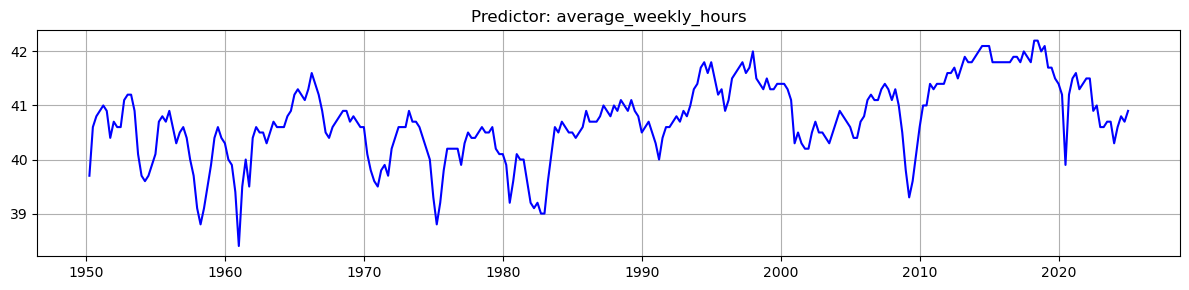

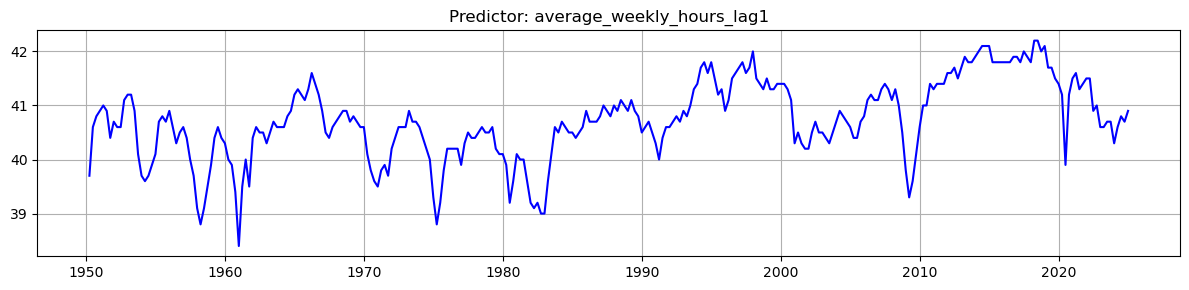

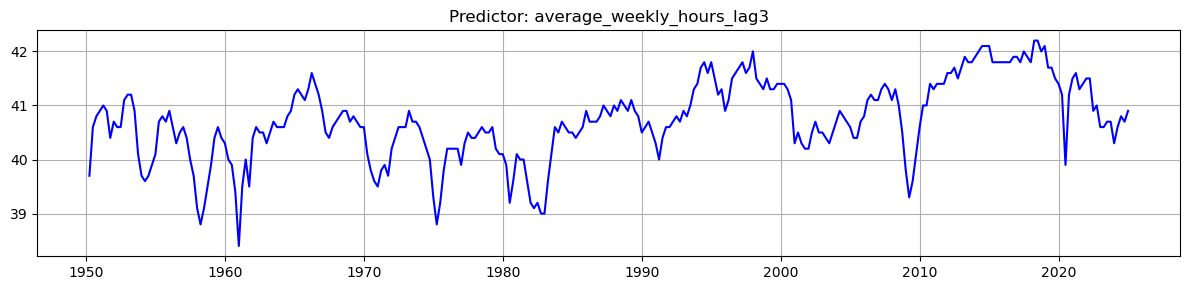

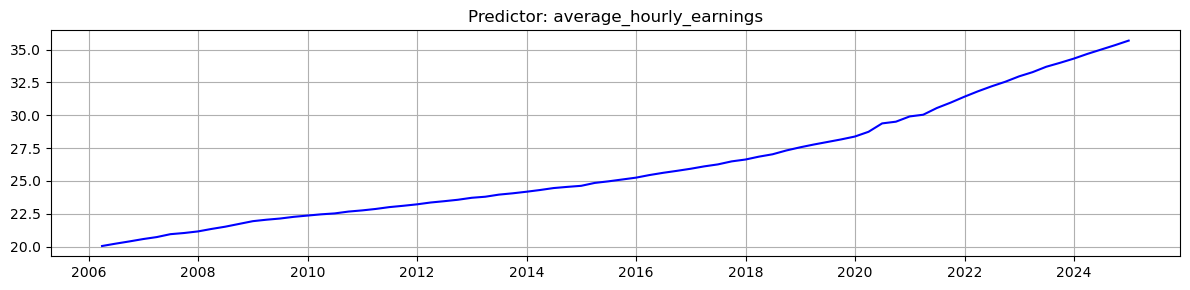

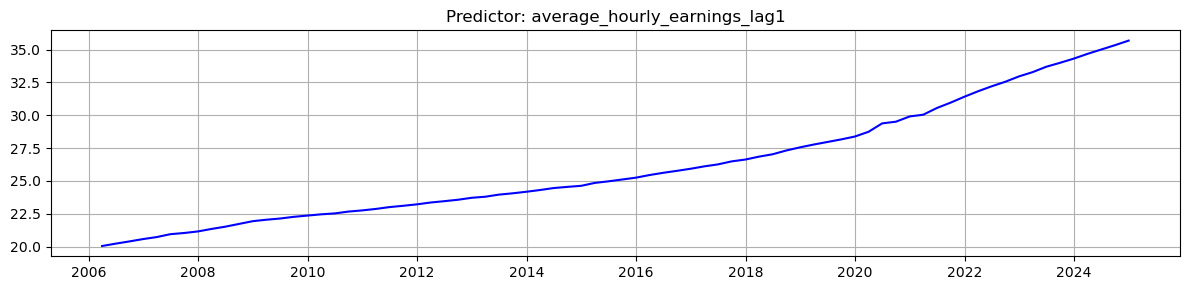

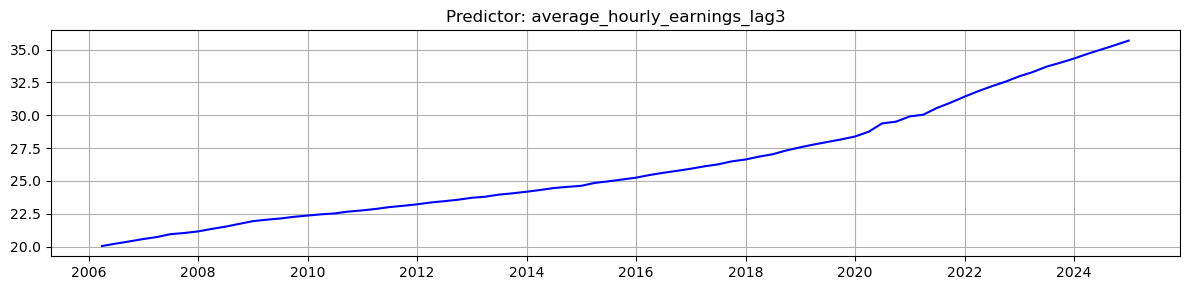

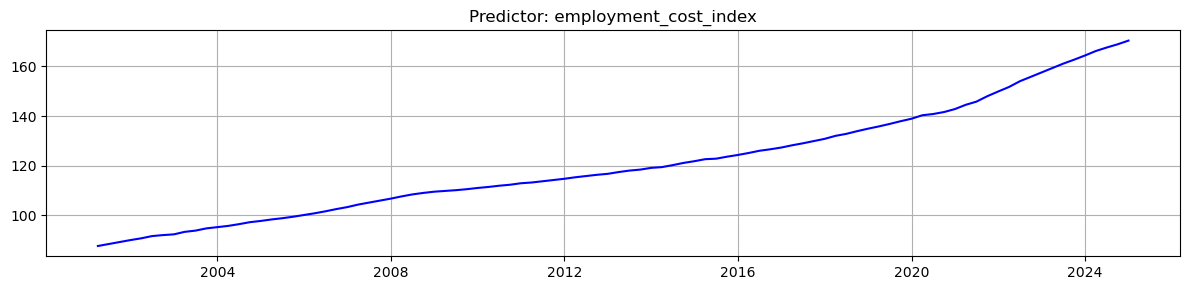

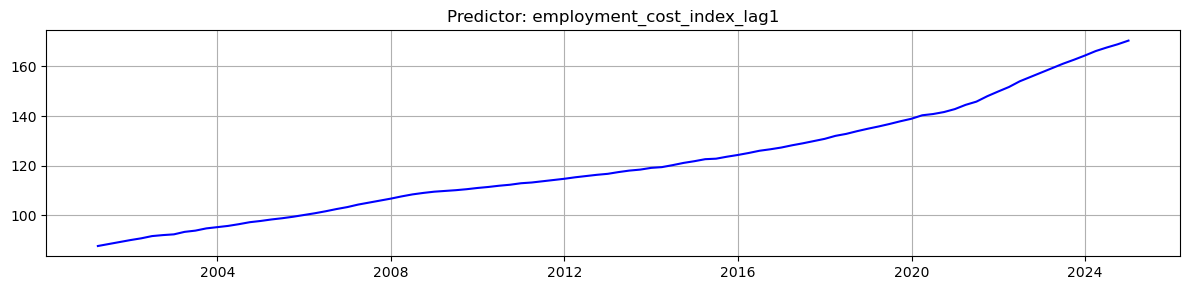

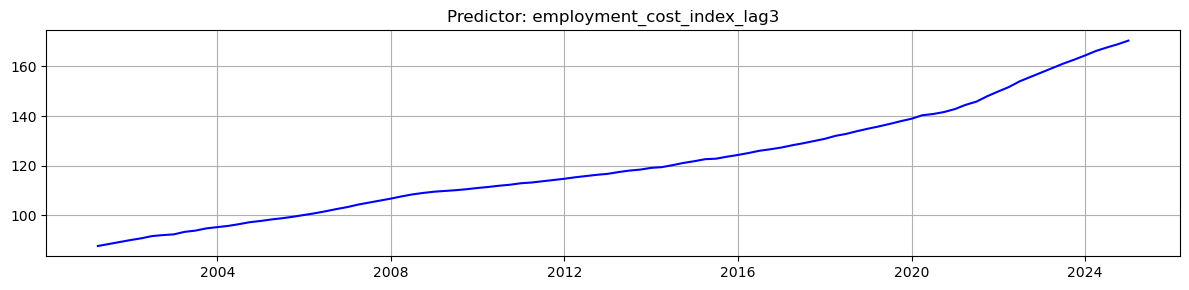

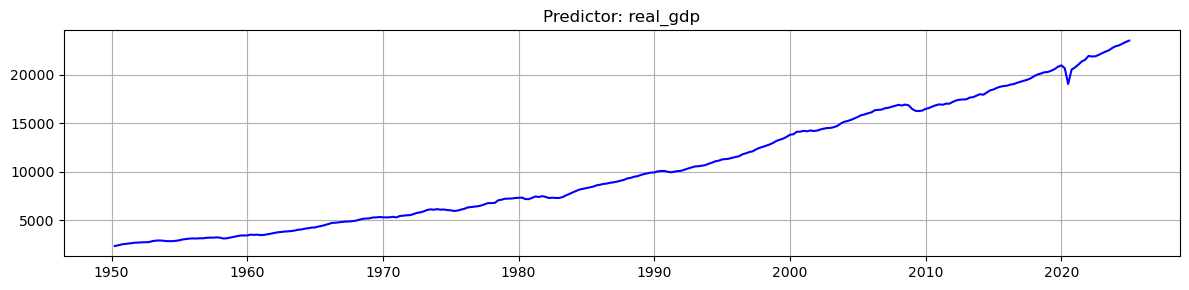

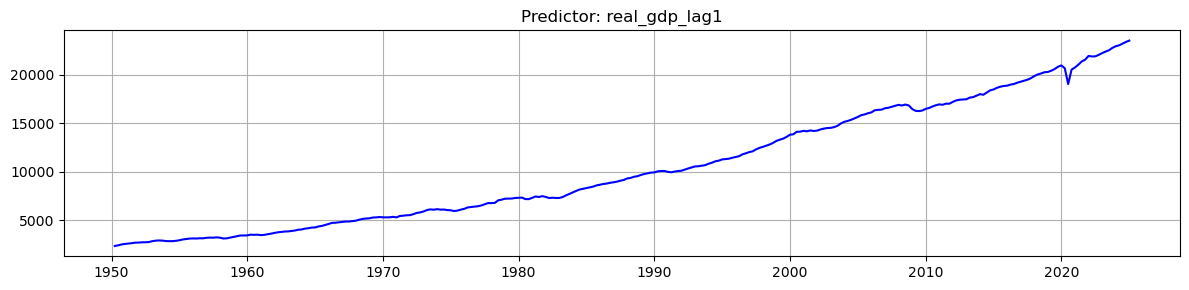

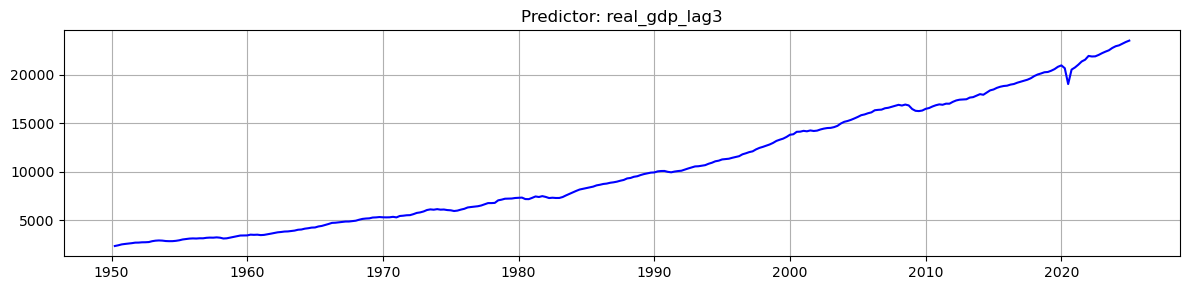

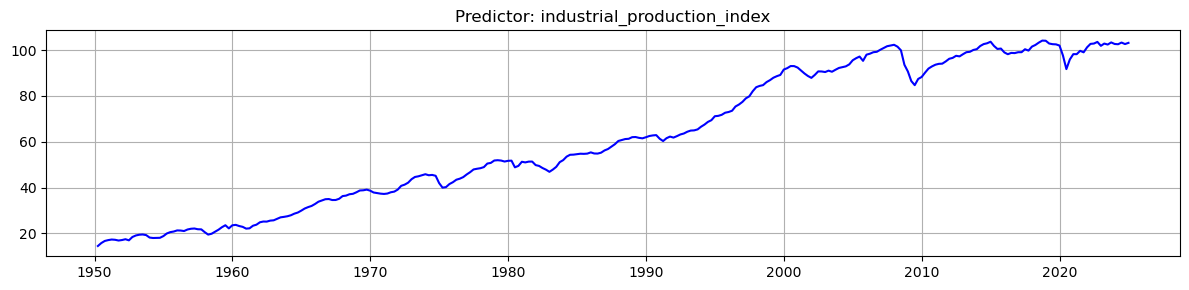

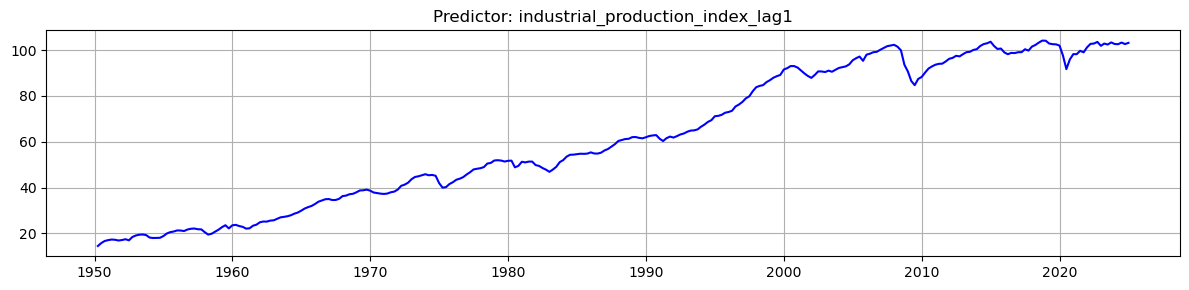

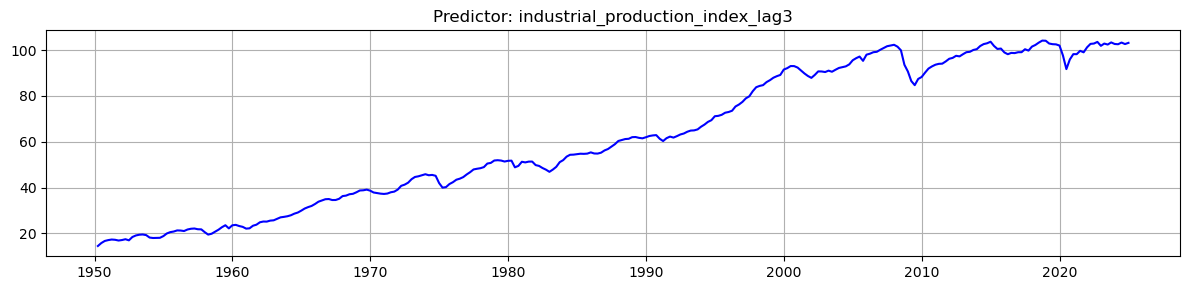

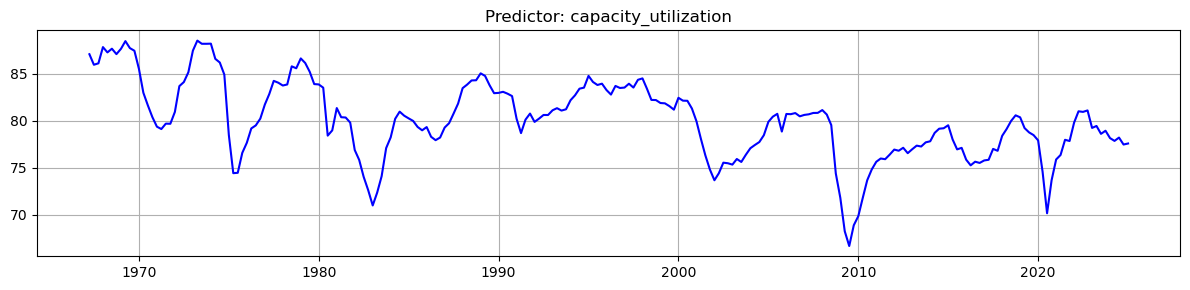

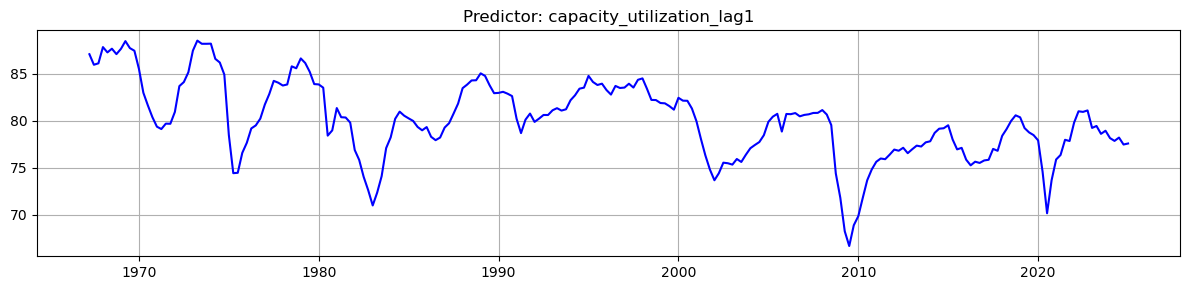

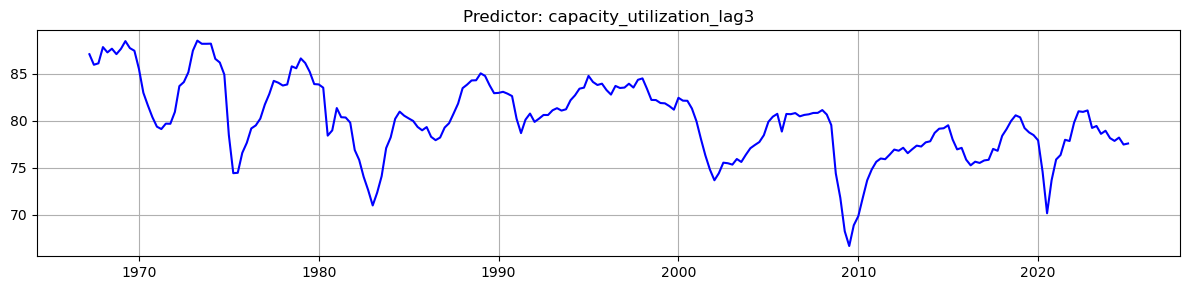

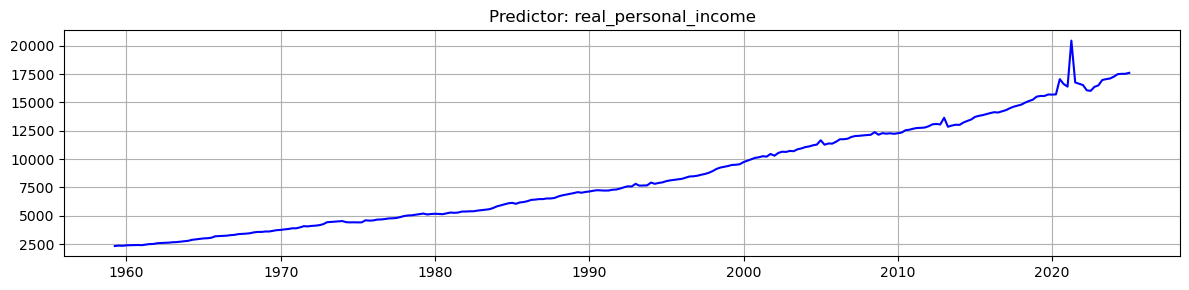

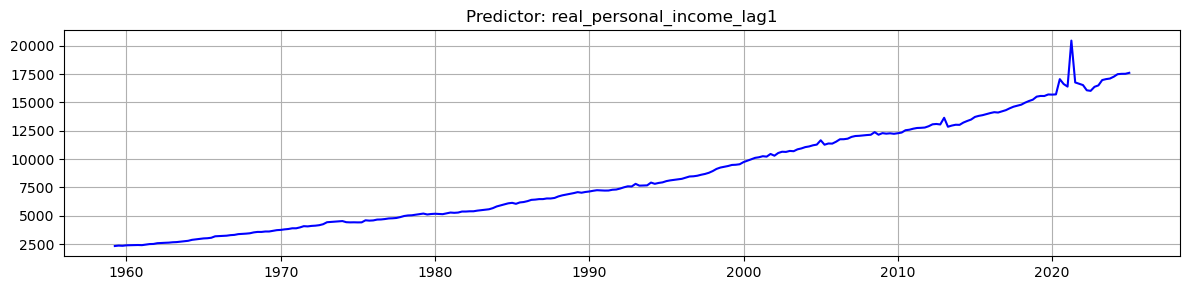

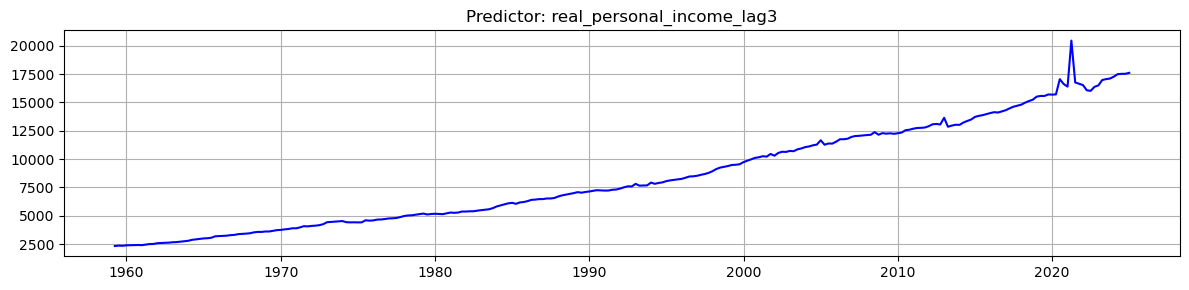

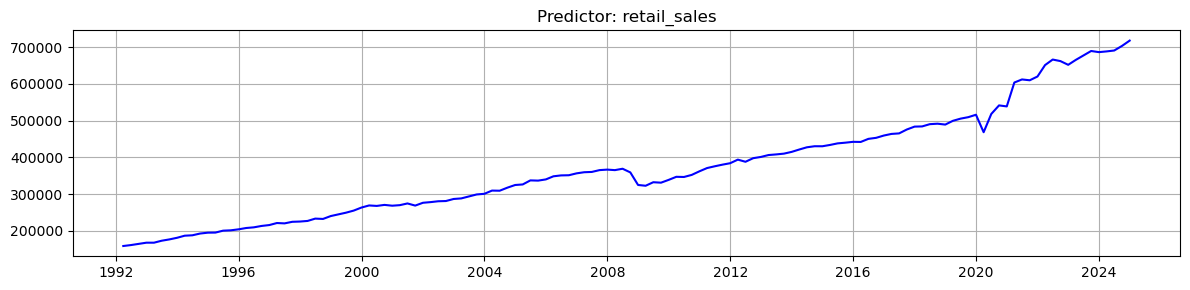

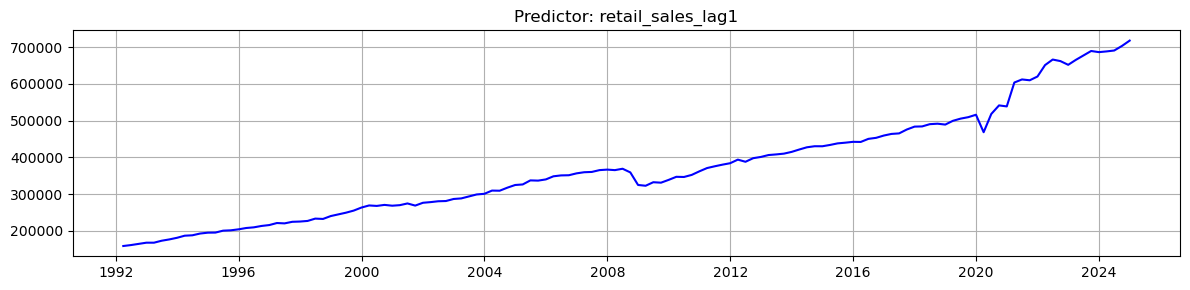

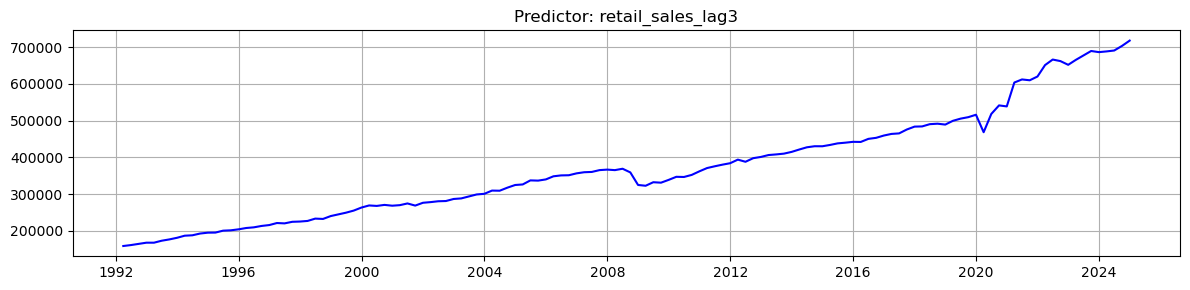

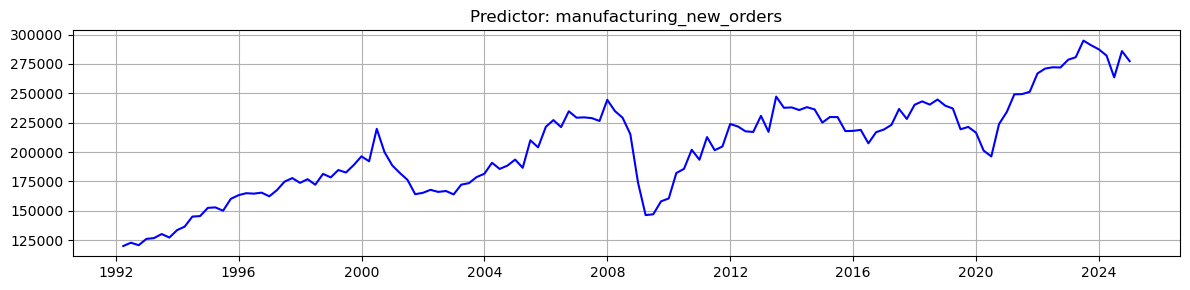

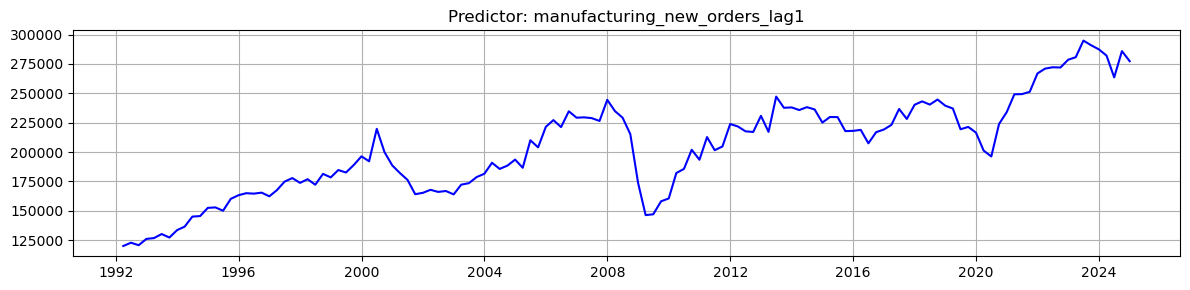

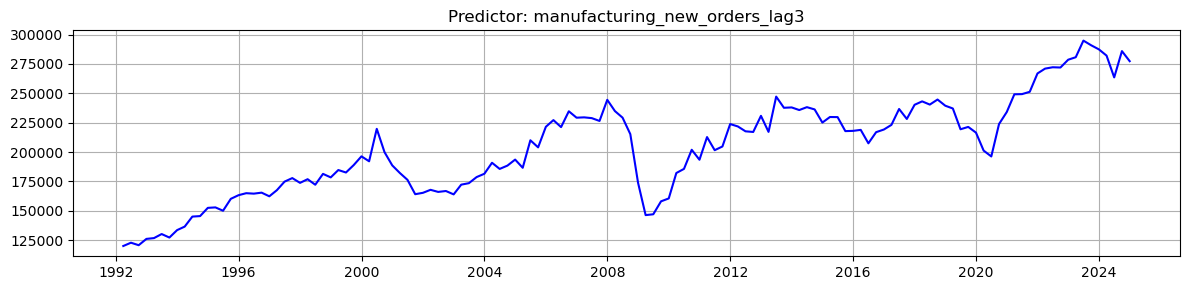

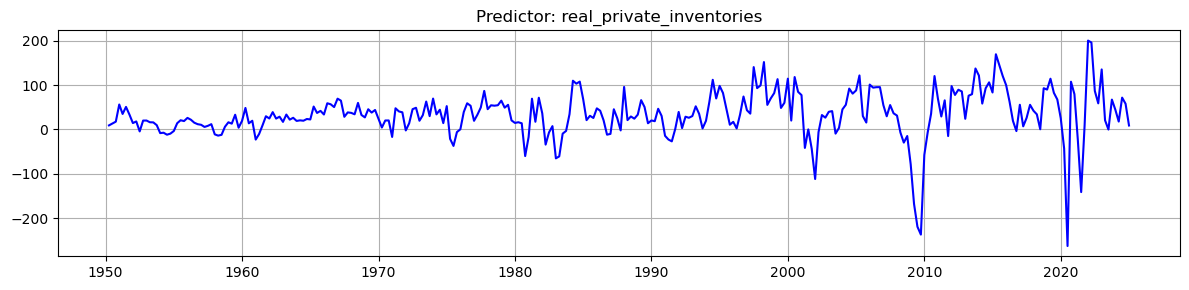

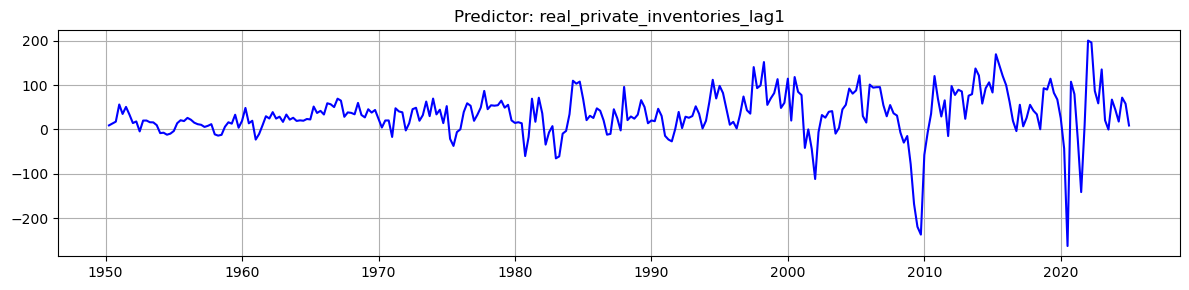

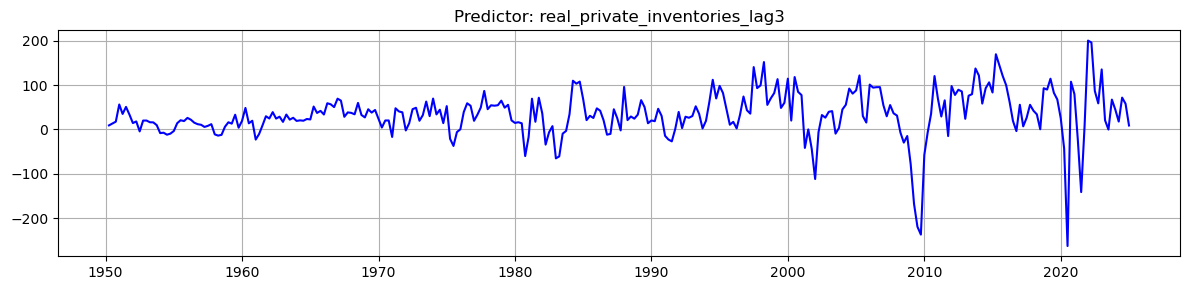

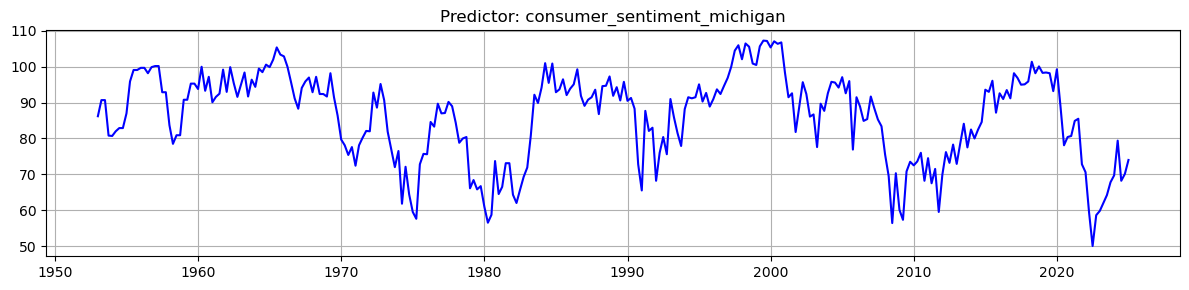

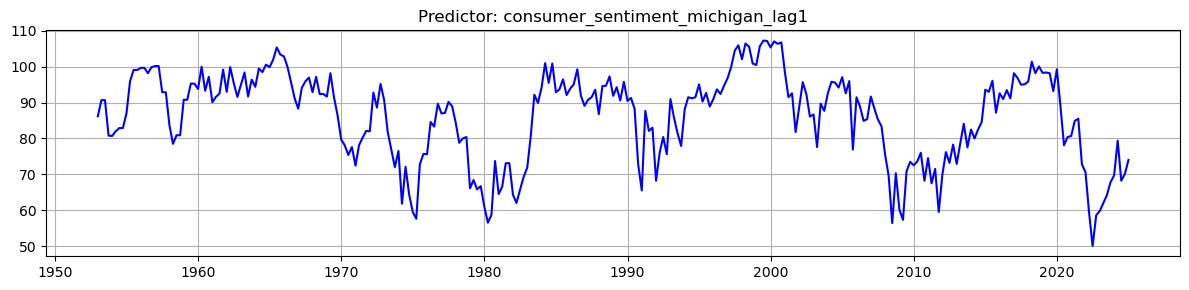

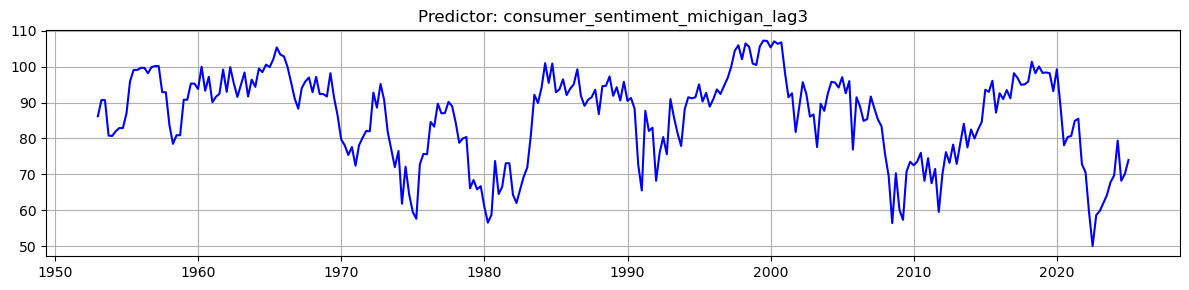

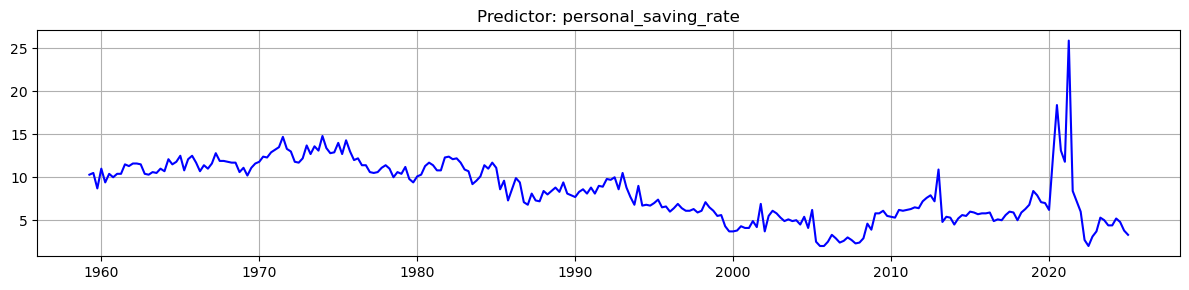

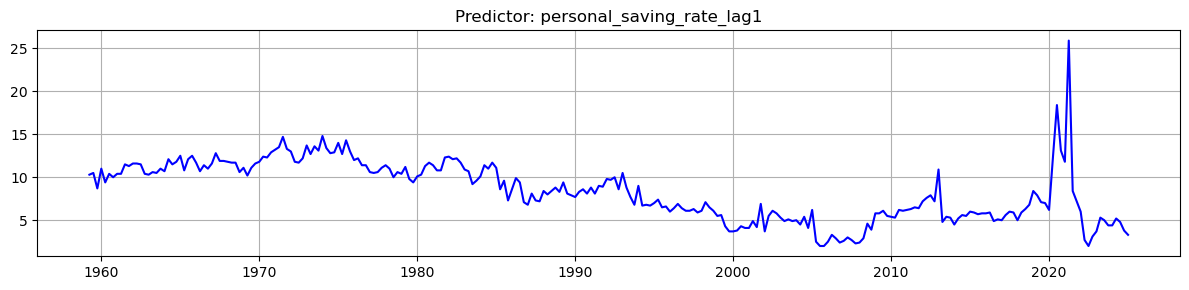

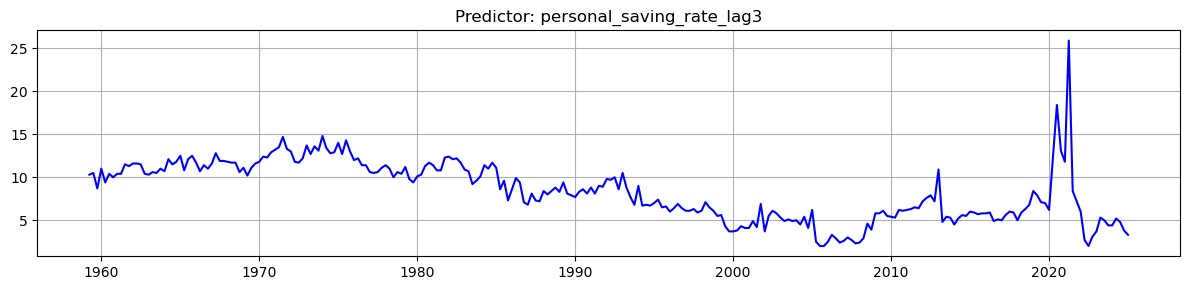

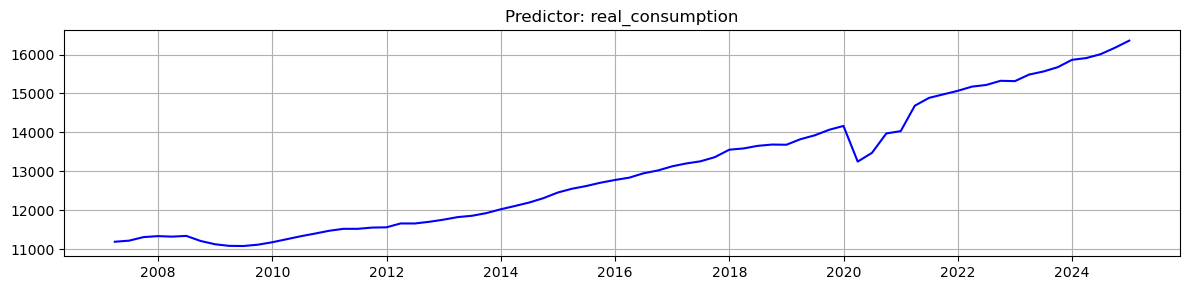

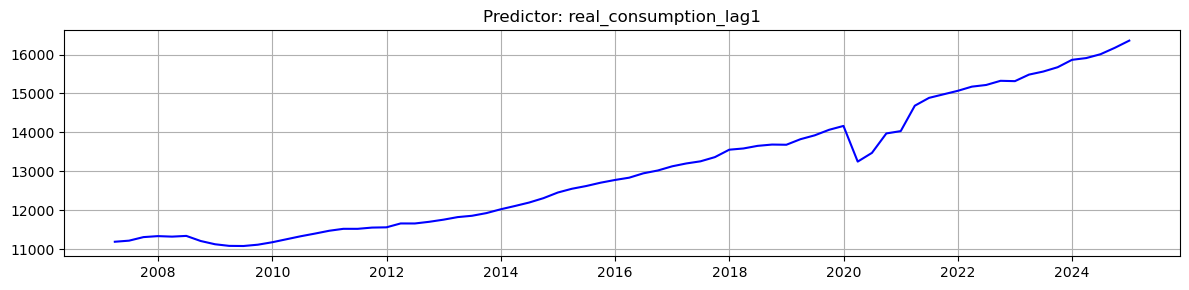

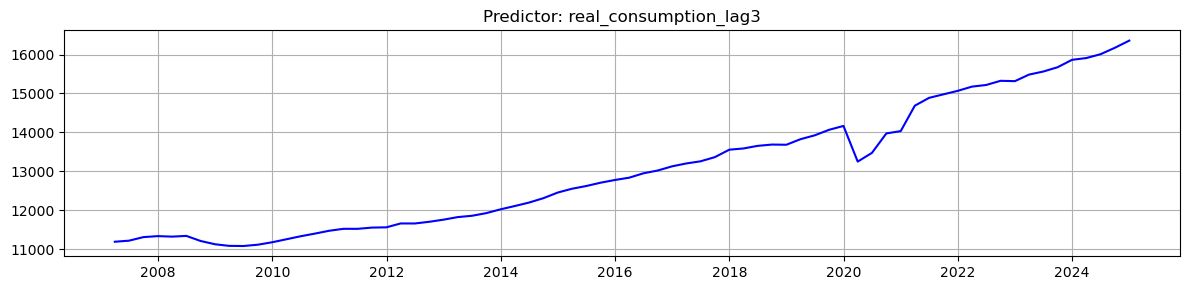

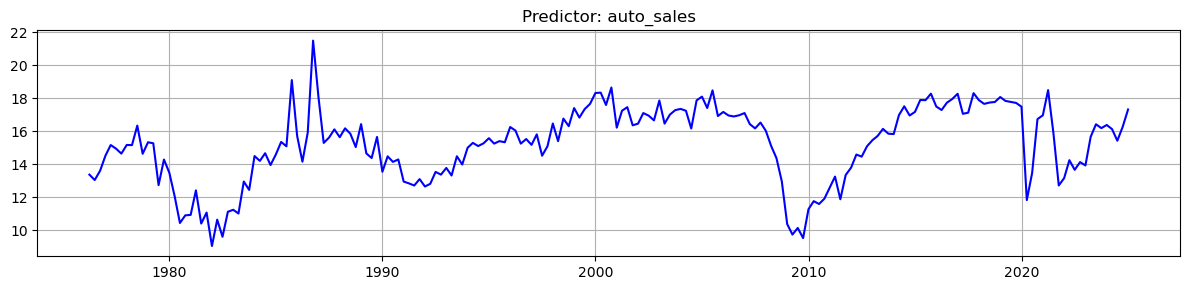

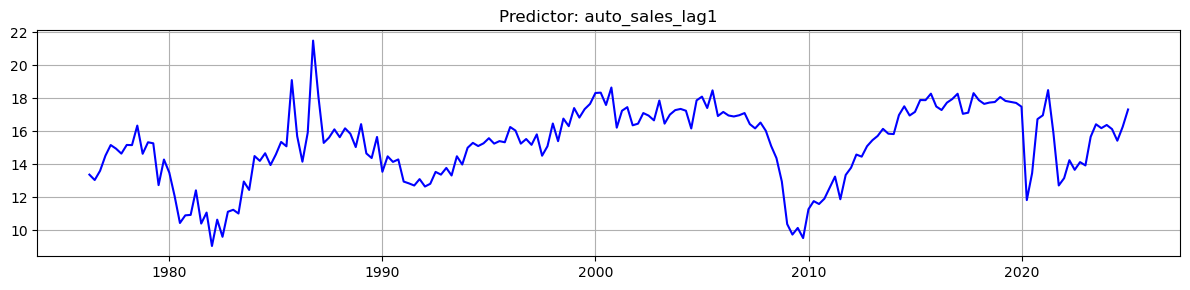

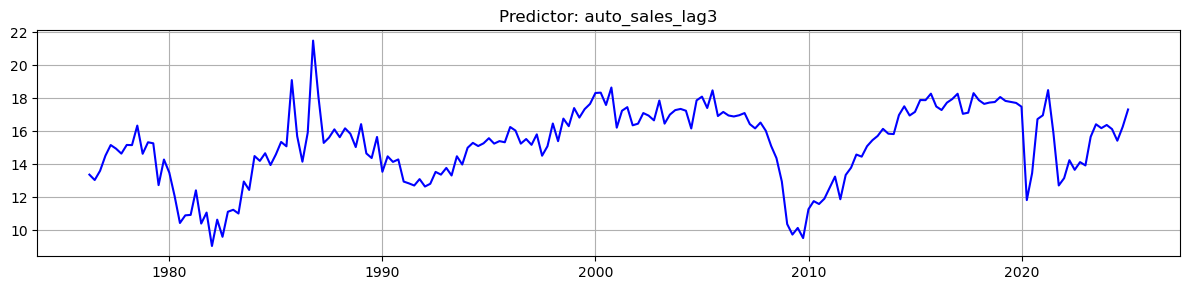

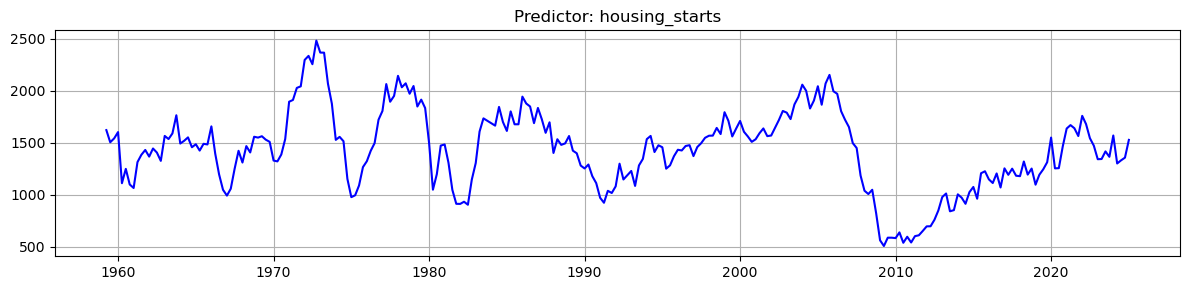

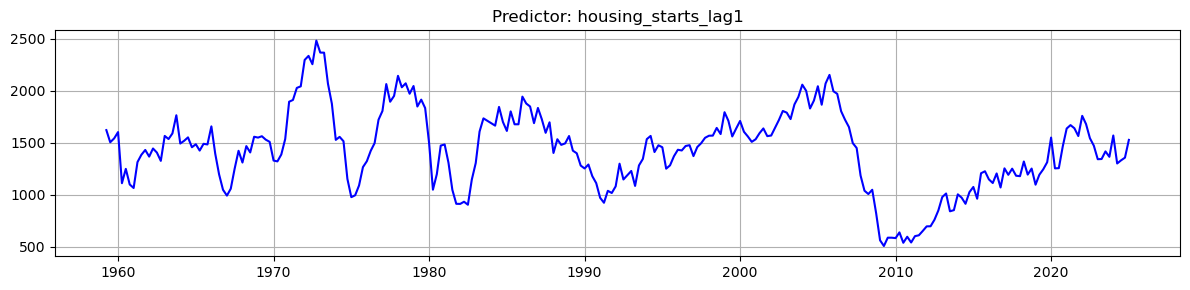

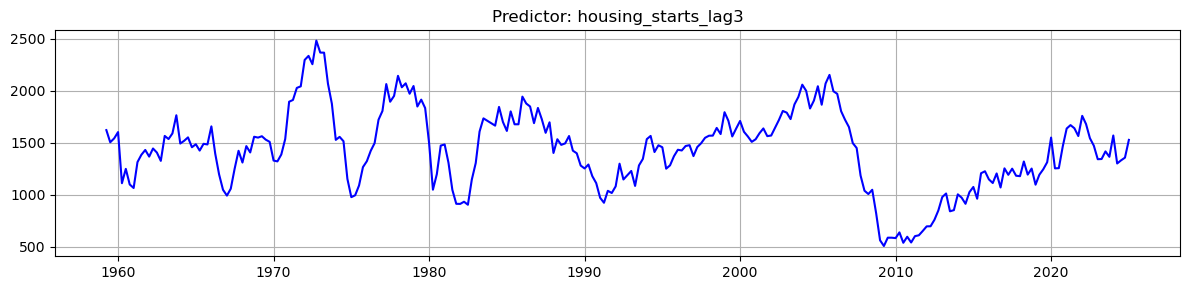

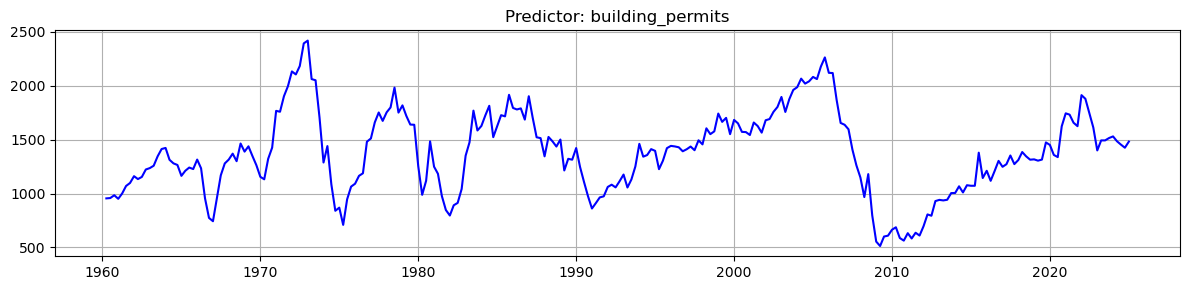

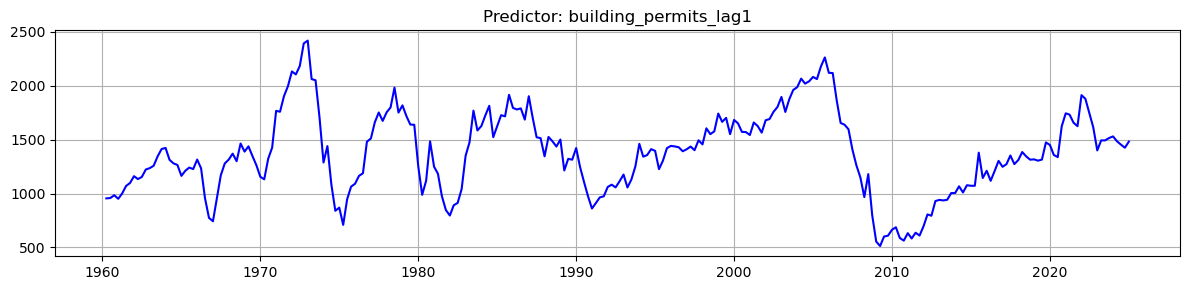

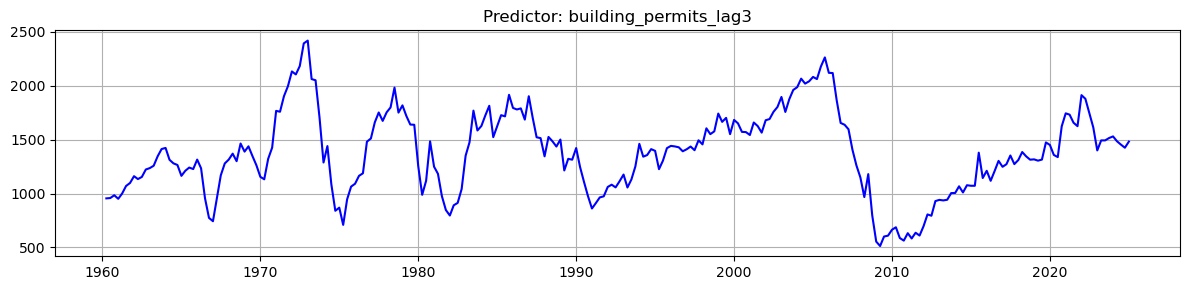

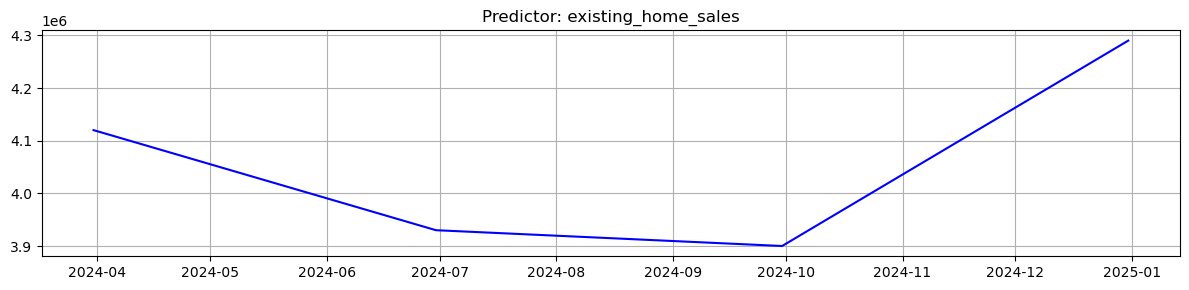

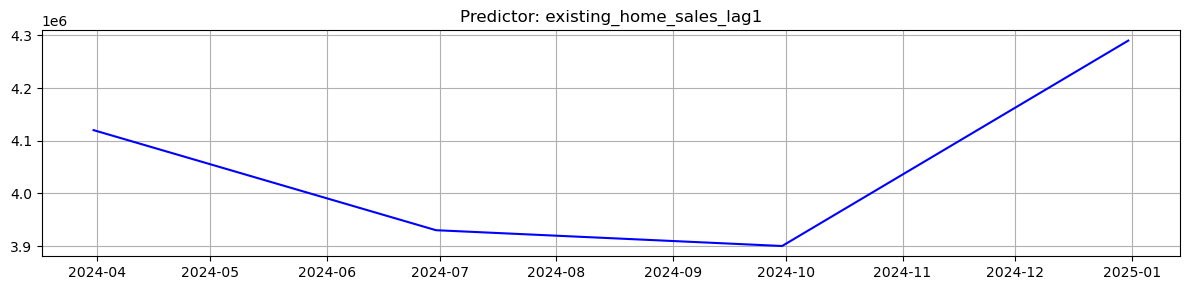

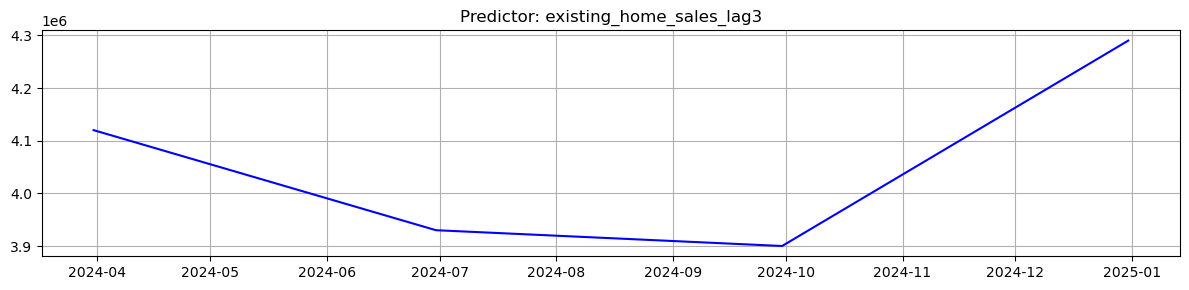

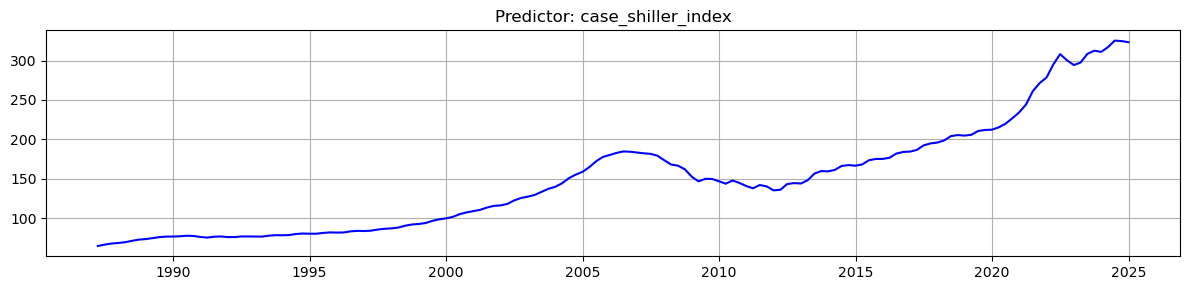

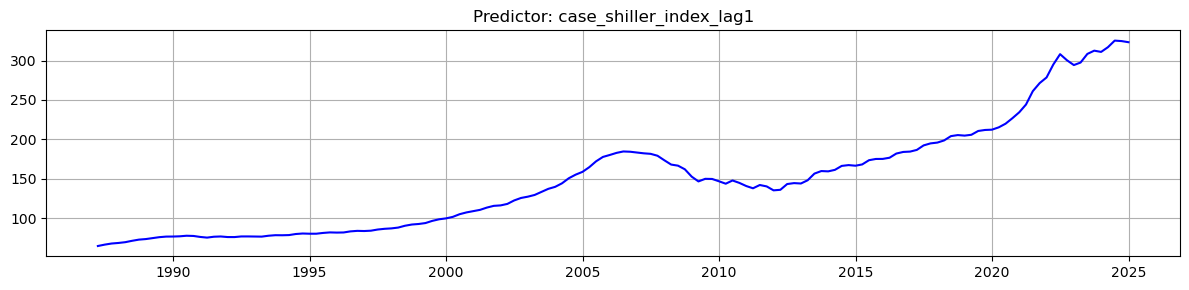

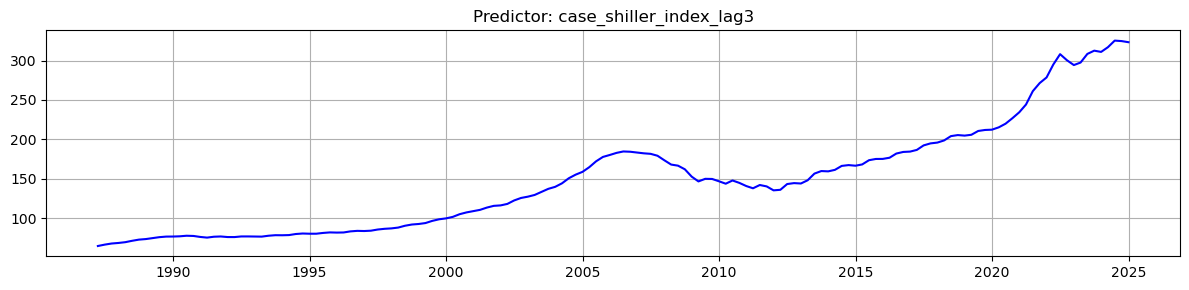

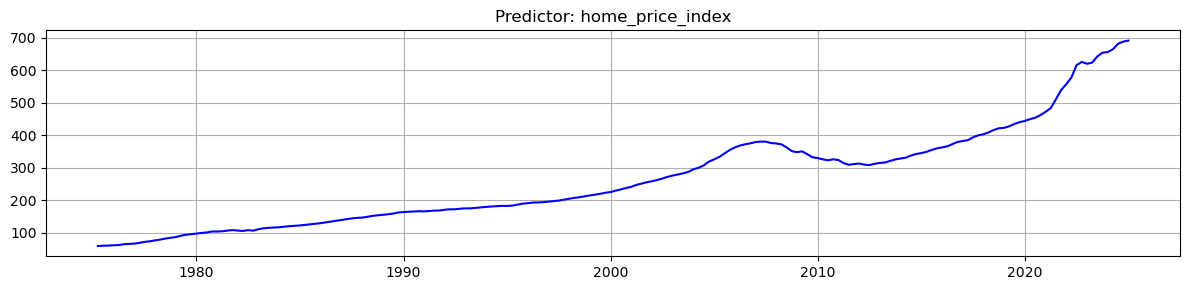

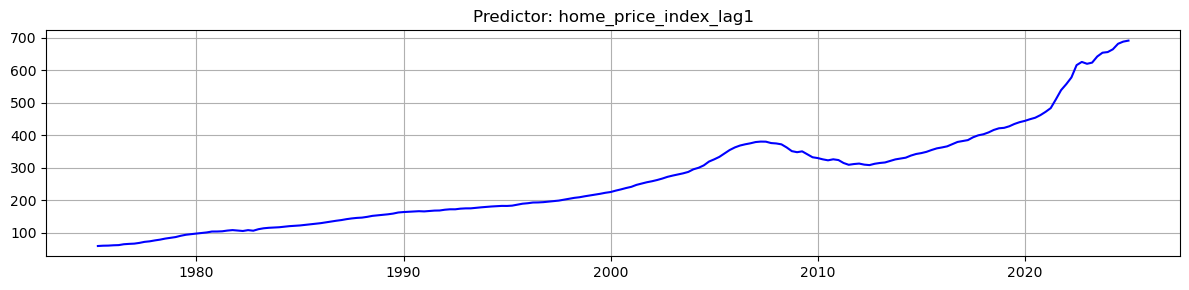

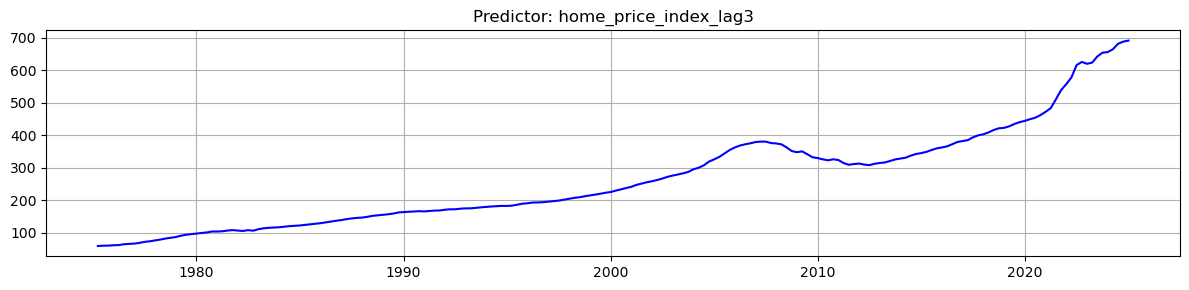

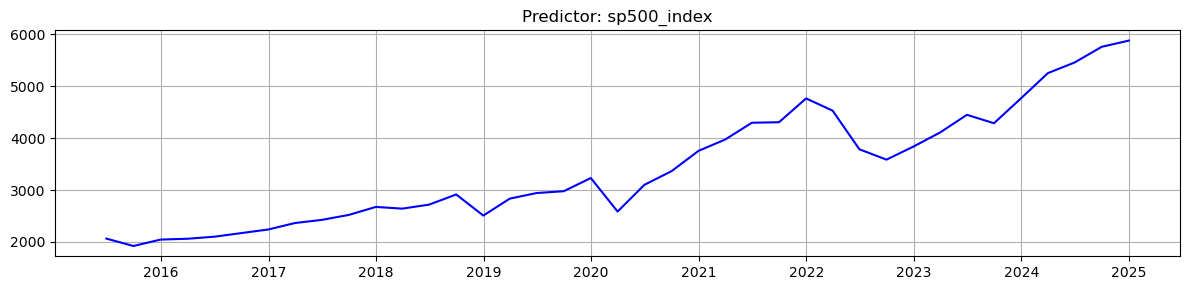

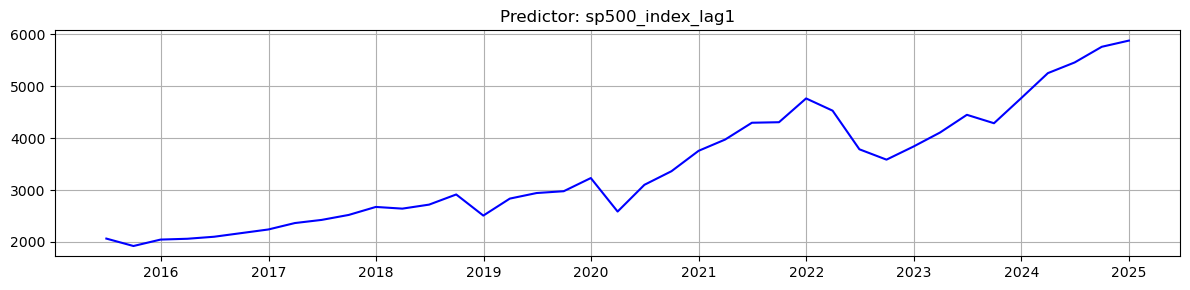

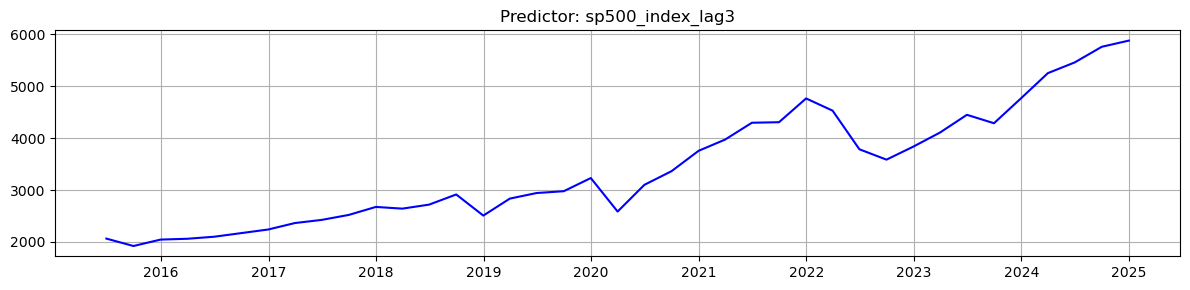

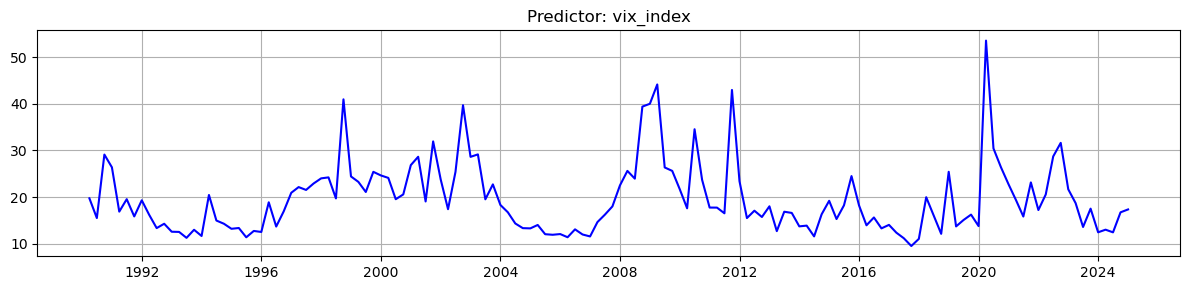

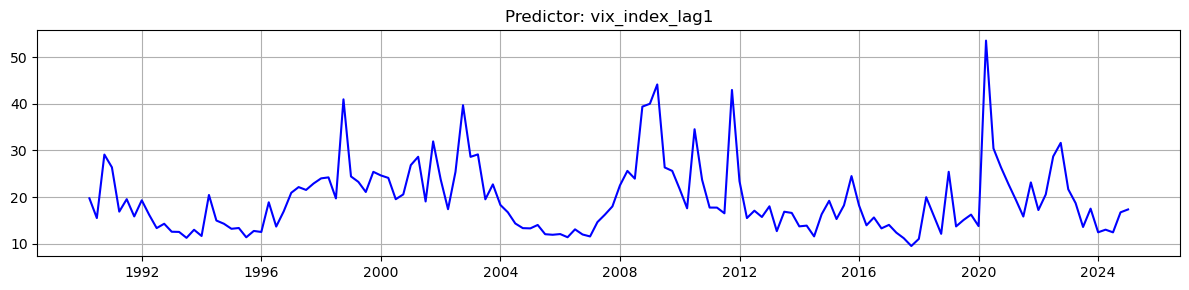

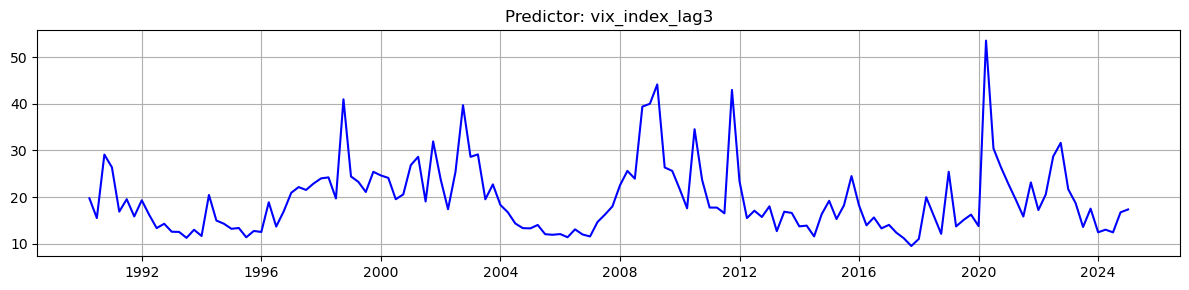

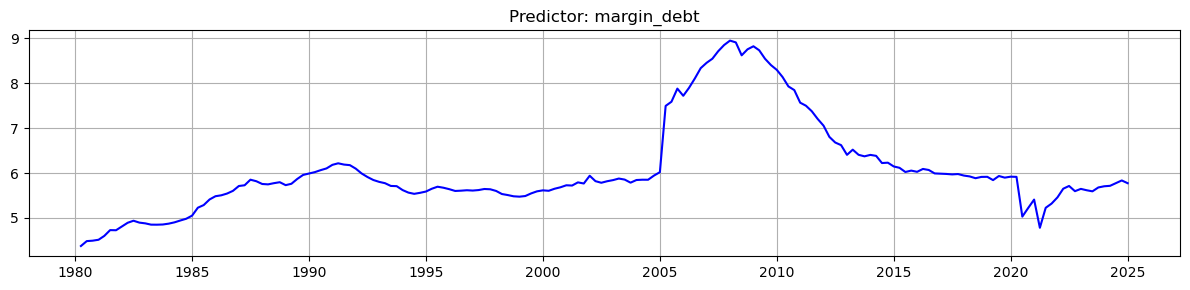

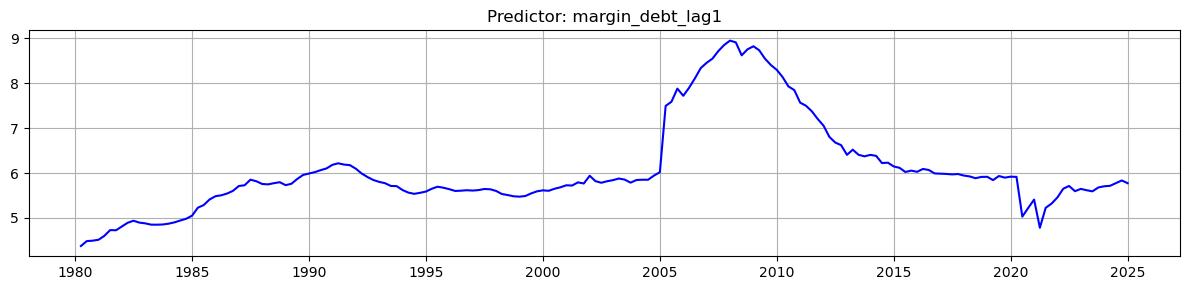

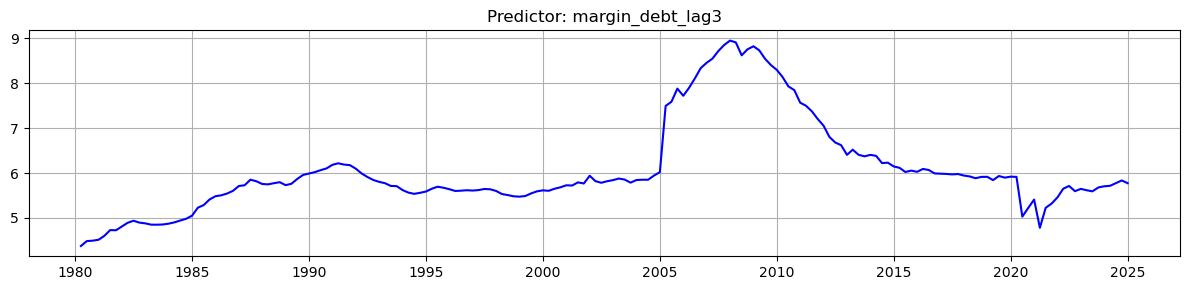

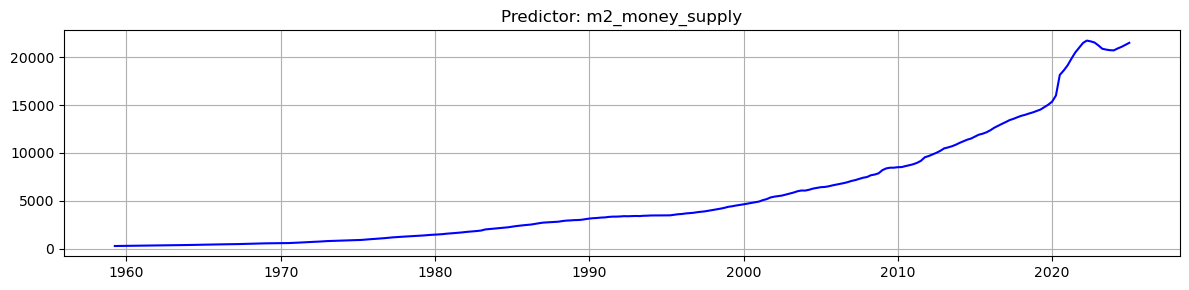

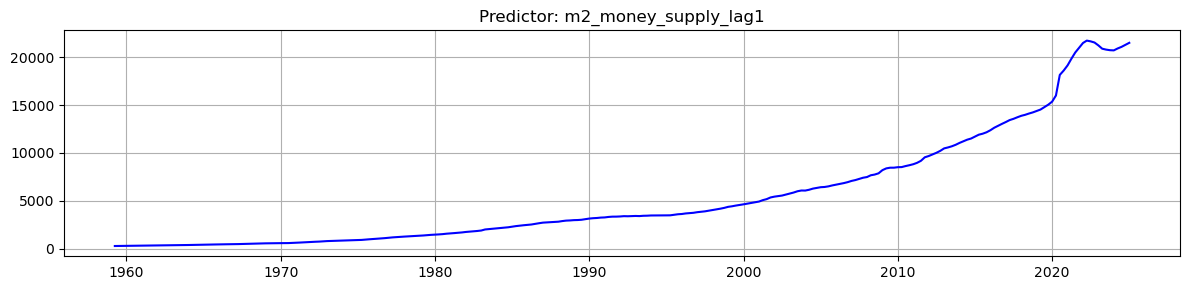

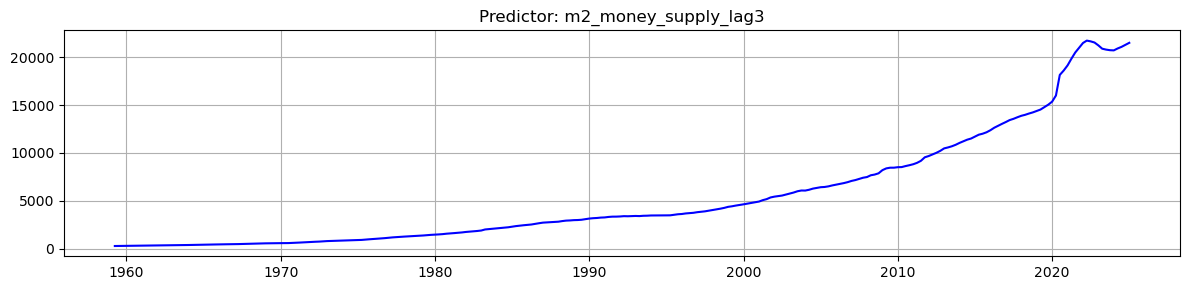

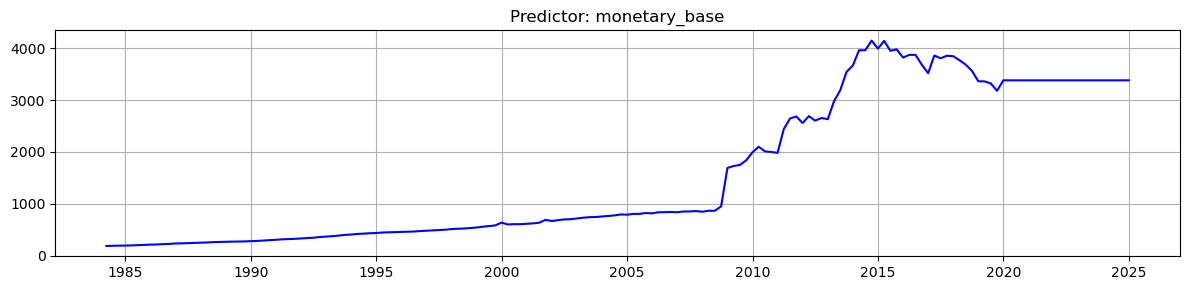

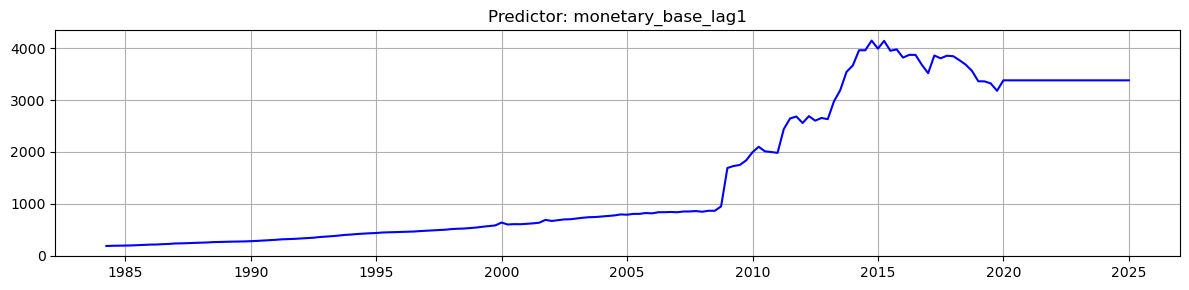

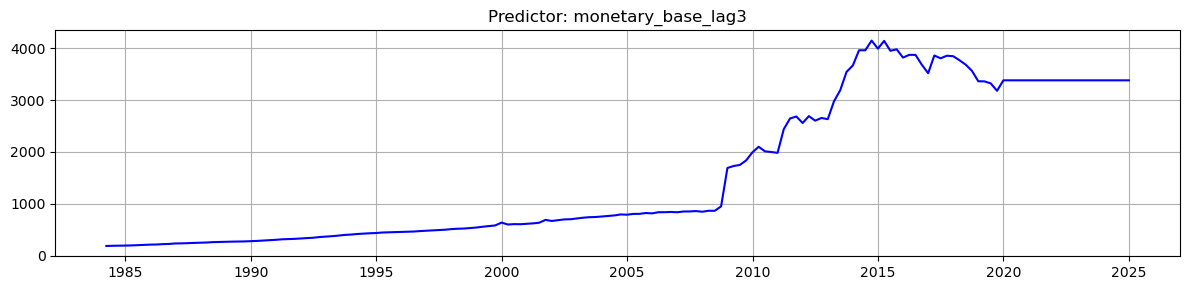

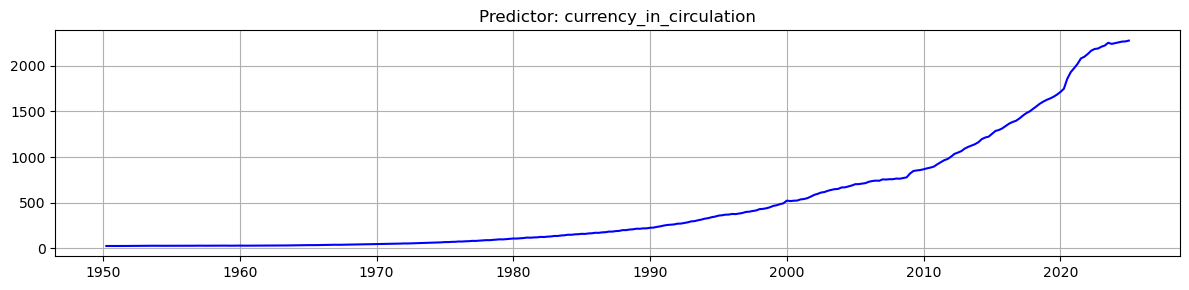

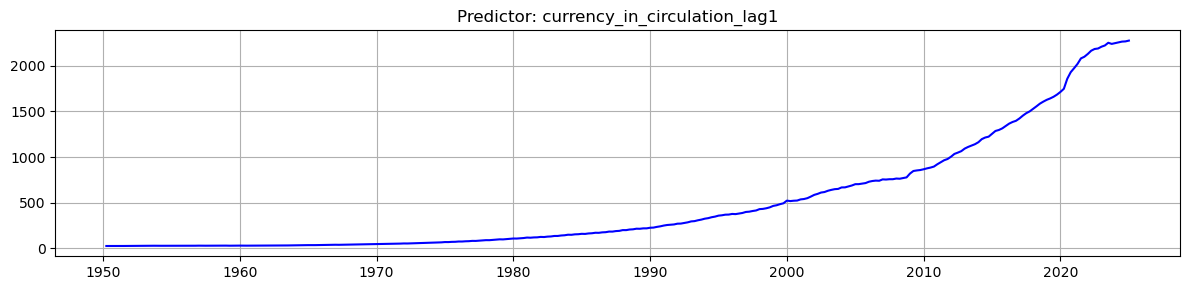

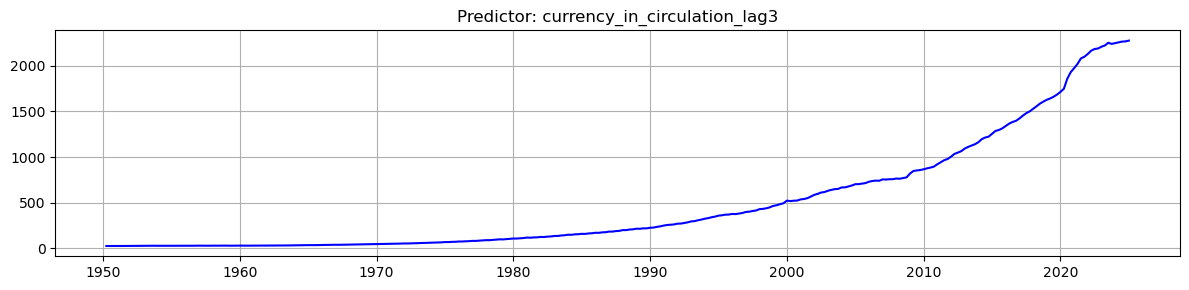

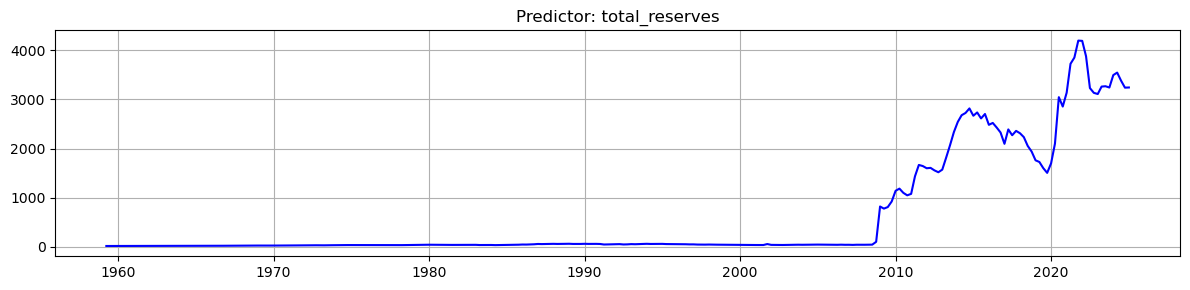

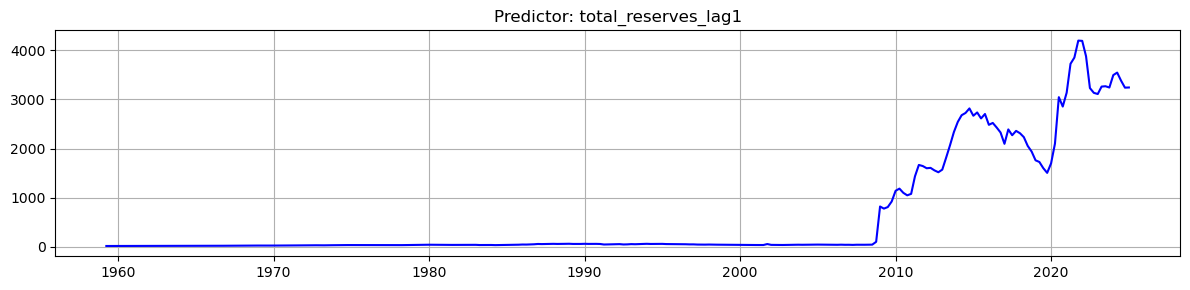

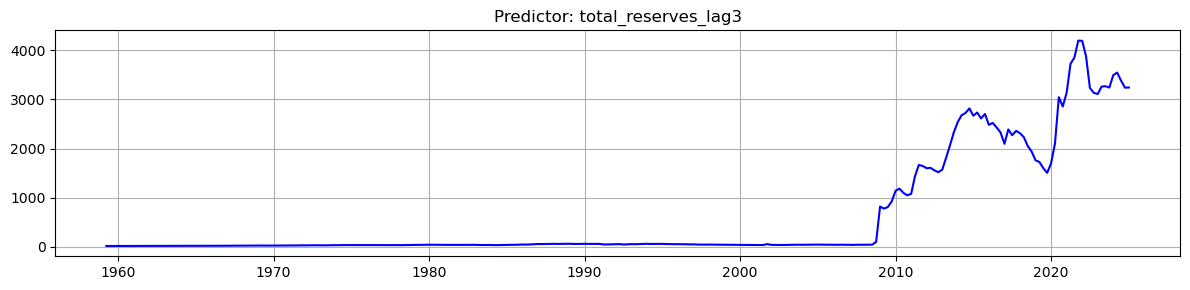

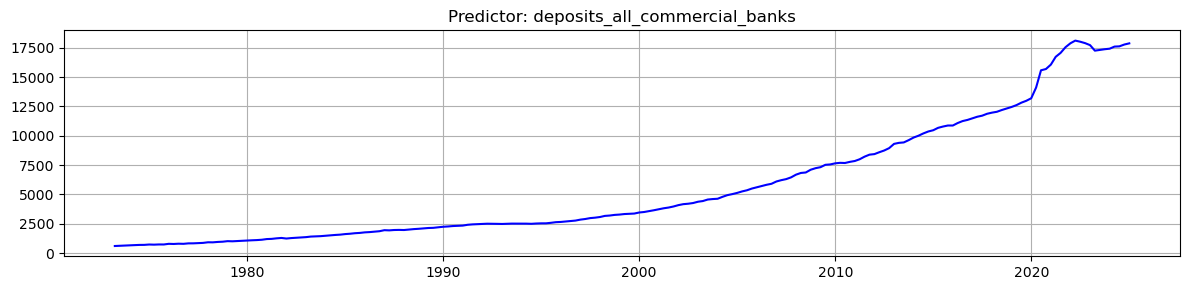

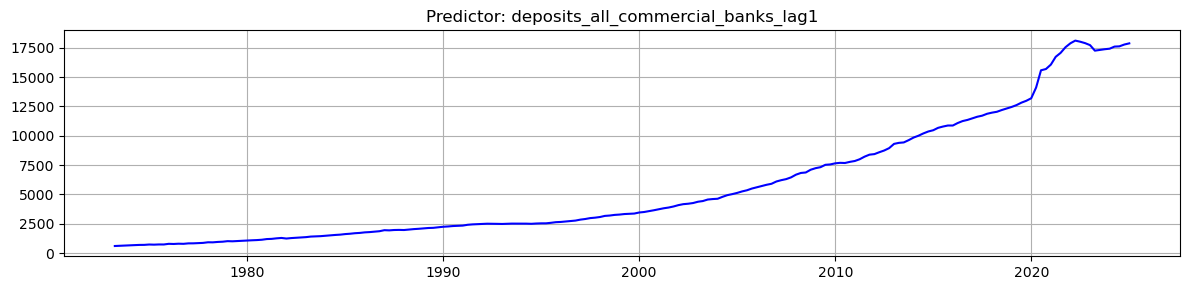

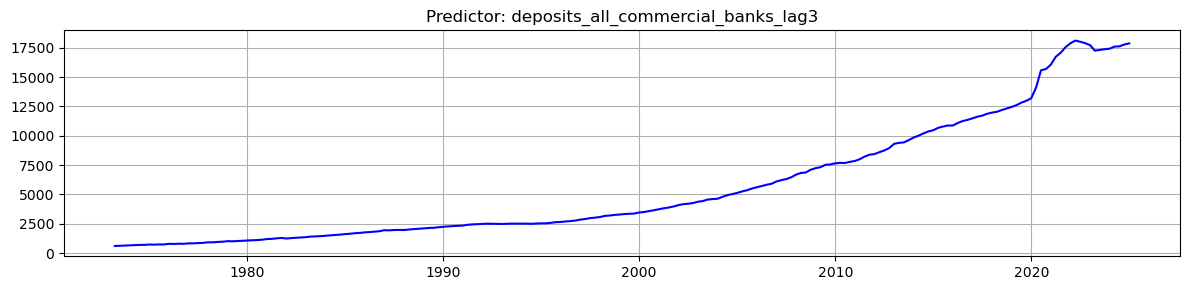

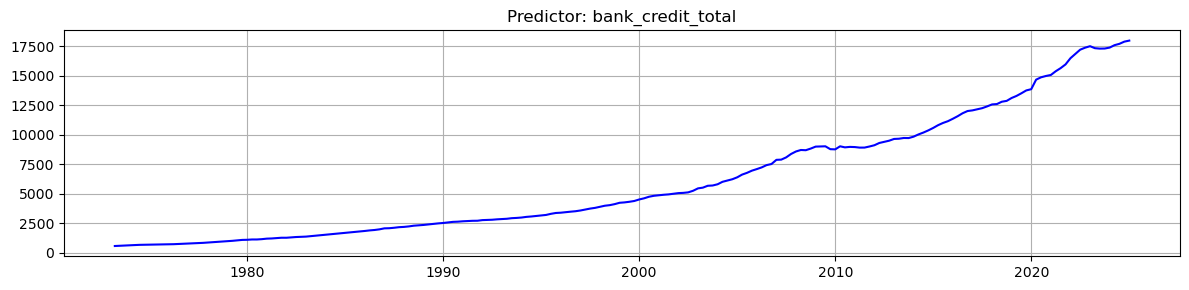

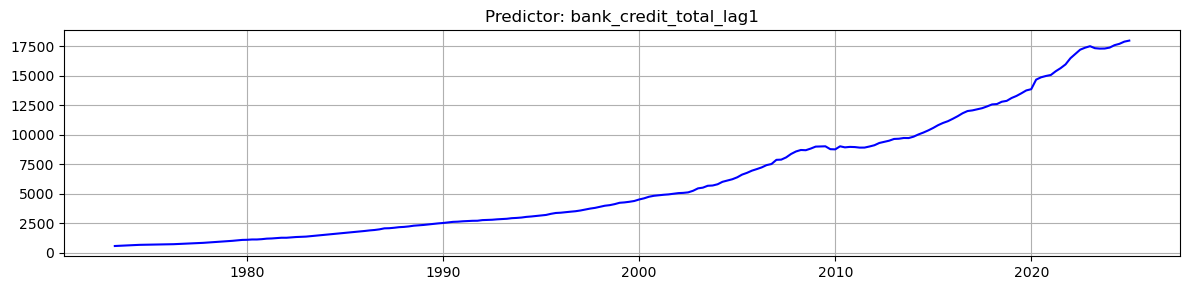

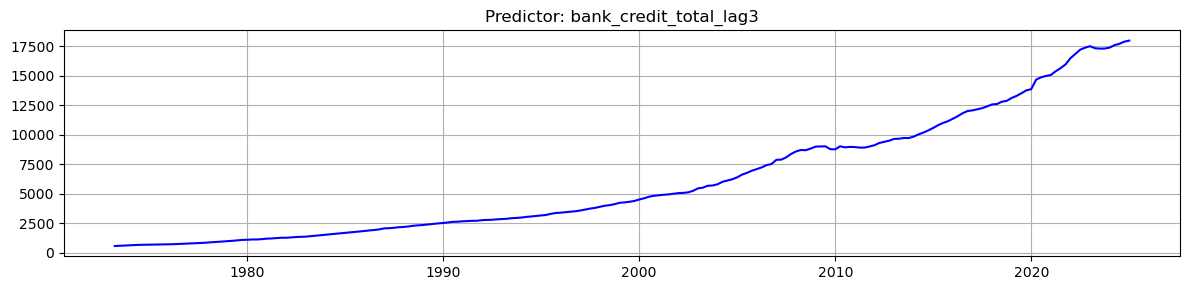

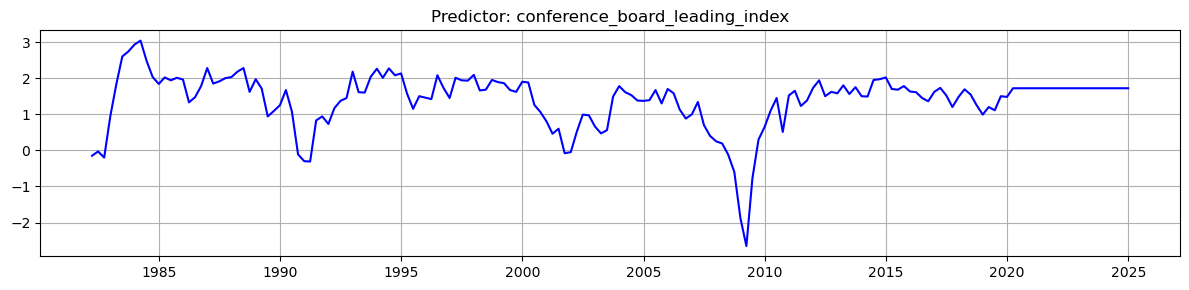

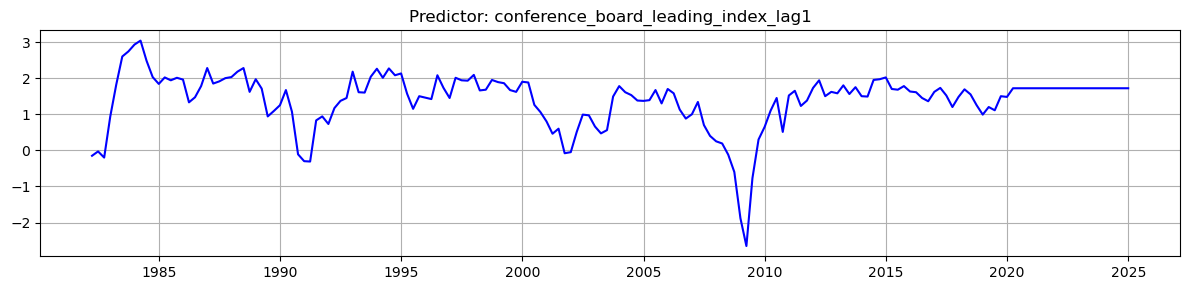

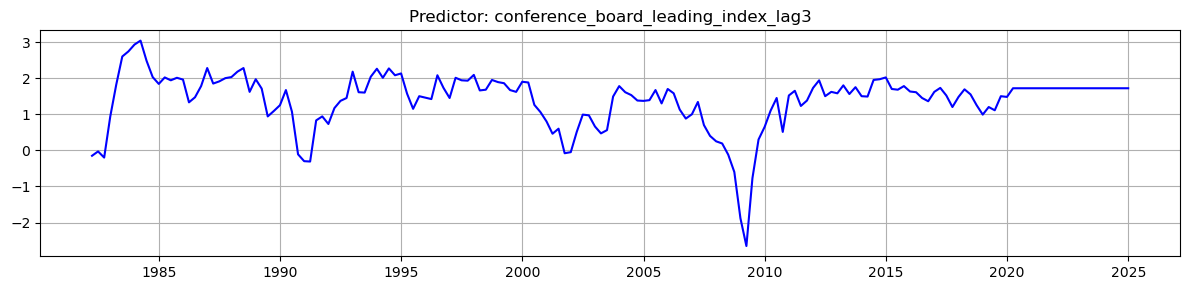

In [9]:
# 2. Plot predictor variables (in blue)
for col in X.columns:
    plt.figure(figsize=(12, 3))
    plt.plot(X.index, X[col], color='blue')
    plt.title(f"Predictor: {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

         Eigenvalue  Explained Variance Ratio
PC1    9.107920e+01              4.977001e-01
PC2    2.587109e+01              1.413719e-01
PC3    1.918835e+01              1.048543e-01
PC4    1.374174e+01              7.509140e-02
PC5    5.793009e+00              3.165576e-02
...             ...                       ...
PC179  1.000000e-06              5.464475e-09
PC180  1.000000e-06              5.464475e-09
PC181  1.000000e-06              5.464475e-09
PC182  1.000000e-06              5.464475e-09
PC183  1.000000e-06              5.464475e-09

[183 rows x 2 columns]


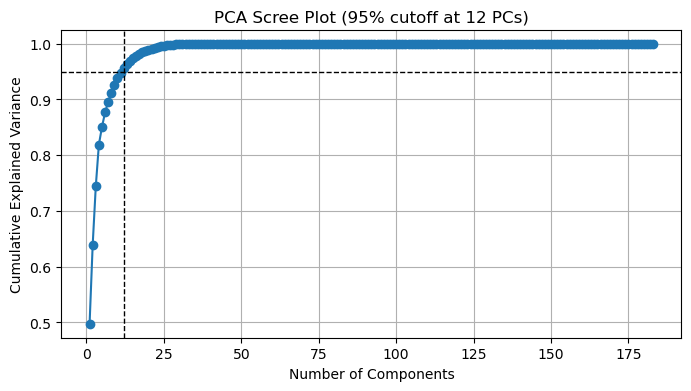

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# X of shape (T × N)

X_filled = X.copy().ffill().bfill()

# Mean-center
X_centered = X_filled - X_filled.mean()

# Correlation matrix (with tiny jitter on diagonal for PDness)
corr = X_centered.corr().values
corr += np.eye(corr.shape[0]) * 1e-6

#  Eigen-decomposition of the correlation matrix
eigvals, eigvecs = np.linalg.eigh(corr)

# Sort eigenvalues/vectors in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Principal component scores
pc_scores = pd.DataFrame(
    X_centered.values.dot(eigvecs),
    index=X_centered.index,
    columns=[f"PC{i+1}" for i in range(eigvecs.shape[1])]
)

# Variance decomposition
explained_variance       = eigvals
explained_variance_ratio = eigvals / eigvals.sum()
variance_df = pd.DataFrame({
    "Eigenvalue":               explained_variance,
    "Explained Variance Ratio": explained_variance_ratio
}, index=[f"PC{i+1}" for i in range(len(eigvals))])
print(variance_df)

# Scree plot + cumulative variance + 95% cutoff
threshold = 0.95
cumvar    = explained_variance_ratio.cumsum()
n_keep    = np.searchsorted(cumvar, threshold) + 1

plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(eigvals)+1), cumvar, marker='o')
plt.axhline(threshold, color='k', linestyle='--', lw=1)
plt.axvline(n_keep,    color='k', linestyle='--', lw=1)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title(f"PCA Scree Plot (95% cutoff at {n_keep} PCs)")
plt.grid(True)
plt.savefig(f"PCA Scree Plot (95% cutoff at {n_keep} PCs).png", dpi=600, bbox_inches='tight')
plt.show()

# Project down to the first n_keep PCs
proj_matrix = eigvecs[:, :n_keep]
X_pca = pd.DataFrame(
    X_centered.values.dot(proj_matrix),
    index=X_centered.index,
    columns=[f"PC{i+1}" for i in range(n_keep)]
)

In [11]:
X_pca.head()

PC1            PC2            PC3            PC4  \
1950-03-31 -577397.326868 -259066.113497  370720.373249 -457245.012118   
1950-06-30 -576631.770950 -258713.940289  370656.448946 -457294.236771   
1950-09-30 -575588.859611 -258270.227221  370596.965666 -457328.585045   
1950-12-31 -575435.735789 -258156.594953  370558.960519 -457388.631589   
1951-03-31 -574818.173345 -257856.407549  370489.865242 -457433.101789   

                      PC5            PC6            PC7            PC8  \
1950-03-31 -713287.993282 -124383.463201 -196413.542471  154806.308386   
1950-06-30 -713183.256870 -124490.257605 -196386.256886  154808.192758   
1950-09-30 -713046.599731 -124630.832193 -196354.283687  154811.549533   
1950-12-31 -713037.126990 -124648.630222 -196332.036849  154804.767753   
1951-03-31 -712936.516964 -124743.136449 -196316.070670  154810.612975   

                      PC9           PC10           PC11           PC12  
1950-03-31 -276866.450852  500663.036483 -333257.364820  268363.616282  
1950-06-30 -276798.473932  500539.451669 -333390.938920  268131.509005  
1950-09-30 -276705.670213  500366.321200 -333581.850600  267856.223833  
1950-12-31 -276666.687561  500373.493179 -333595.923112  267752.639396  
1951-03-31 -276630.562033  500257.225564 -333700.918352  267553.366823

In [12]:
X_pca.tail()

PC1            PC2            PC3           PC4  \
2023-12-31  1.295282e+06  111514.935816  505877.112566  34073.304794   
2024-03-31  1.308645e+06  122090.076216  483477.021083  57872.541778   
2024-06-30  1.319906e+06  135427.149324  476332.906652  92832.624960   
2024-09-30  1.340821e+06  138112.278611  484643.999742  95547.890489   
2024-12-31  1.299234e+06  124631.084989  448068.980432  63578.475051   

                      PC5            PC6            PC7            PC8  \
2023-12-31 -367275.089896 -239489.703772 -224083.437768  140849.327920   
2024-03-31 -320512.019323 -232971.814209 -198946.467164  127448.988560   
2024-06-30 -300606.205039 -246886.246424 -249469.201236 -189105.150310   
2024-09-30 -311944.075817 -254180.125445 -270744.909988 -233465.276954   
2024-12-31 -277381.048158 -198765.634641 -143222.738512  397405.744966   

                     PC9          PC10           PC11           PC12  
2023-12-31   7741.288509 -15382.597945 -631668.012838  162082.128332  
2024-03-31  23204.823782 -32917.840636 -600990.201097  162329.227139  
2024-06-30 -16914.523181 -13210.875136 -573253.725033  128516.880147  
2024-09-30 -21475.370026 -12425.984352 -581982.714795  119420.304530  
2024-12-31  75721.383807 -91584.795388 -588058.834305  159315.998323

Best C: 10 → CV AUC: 0.7435584415584415
Best threshold = 0.43 (F1 = 0.750)
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       109
         1.0       0.69      0.82      0.75        11

    accuracy                           0.95       120
   macro avg       0.84      0.89      0.86       120
weighted avg       0.95      0.95      0.95       120



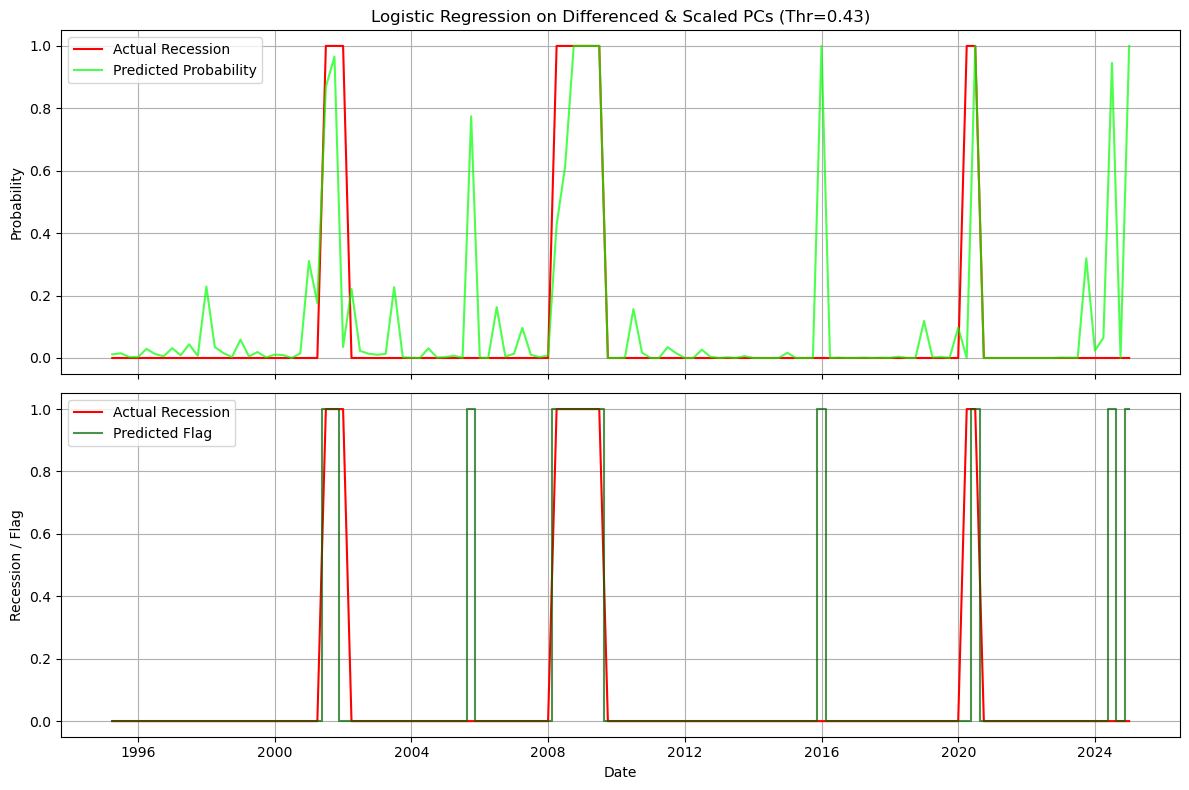

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt

#  PREPROCESS: fill, difference, align
X = X_pca.ffill().bfill().diff().dropna()
y_bin = y['nber_recession_indicator'].loc[X.index]

# SPLIT 60/40 chronologically
n = len(X)
split = int(0.6 * n)
X_train, X_val = X.iloc[:split], X.iloc[split:]
y_train, y_val = y_bin.iloc[:split], y_bin.iloc[split:]

# SCALE
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)

# TUNE logistic on time‐series CV
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'C': [0.01, 0.1, 1, 10]}
base_clf = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000
)
grid = GridSearchCV(base_clf, param_grid, cv=tscv, scoring='roc_auc')
grid.fit(X_train_s, y_train)
best = grid.best_estimator_
print("Best C:", grid.best_params_['C'], "→ CV AUC:", grid.best_score_)

# PREDICT probabilities & optimize threshold
y_val_prob = best.predict_proba(X_val_s)[:, 1]
prec, rec, thresh = precision_recall_curve(y_val, y_val_prob)
f1 = 2 * prec * rec / (prec + rec + 1e-9)
idx = np.nanargmax(f1)
best_thresh = thresh[idx]
print(f"Best threshold = {best_thresh:.2f} (F1 = {f1[idx]:.3f})")

y_val_flag = (y_val_prob >= best_thresh).astype(int)
print(classification_report(y_val, y_val_flag))

# TWO-PANEL PLOT like your LightGBM example
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top: actual vs. predicted probability
ax1.plot(y_val.index, y_val,        color='red',   label='Actual Recession')
ax1.plot(y_val.index, y_val_prob,   color='lime', label='Predicted Probability',alpha = 0.7)
ax1.set_ylabel('Probability')
ax1.set_title(f'Logistic Regression on Differenced & Scaled PCs (Thr={best_thresh:.2f})')
ax1.legend(loc='upper left')
ax1.grid(True)
plt.savefig("Logistic Regression on Differenced & Scaled PCs.png", dpi=600, bbox_inches='tight')

# Bottom: actual vs. predicted flag
ax2.plot(y_val.index, y_val,        color='red',  label='Actual Recession')
ax2.step(y_val.index, y_val_flag,   where='mid', color='darkgreen', label='Predicted Flag', alpha = 0.7)
ax2.set_ylabel('Recession / Flag')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')
ax2.grid(True)
plt.tight_layout()
plt.savefig(f"Logistic Regression on Differenced & Scaled PCs (Thr={best_thresh:.2f}).png", dpi=600, bbox_inches='tight')
plt.show()